<a href="https://colab.research.google.com/github/siliconemonster/AD-TrabalhoFinal/blob/main/Simula%C3%A7%C3%A3o_AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [510]:
from collections import Counter
import copy
import fractions
from fractions import Fraction
import itertools
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement
import math
from math import *
from matplotlib import pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import numpy as np
from numpy import random
from numpy.linalg import matrix_power
import pandas as pd
from pylab import rcParams
import queue 
import random
from random import sample
from random import random
import seaborn as sns
from scipy.stats import poisson
import sympy as sy
from sympy import Matrix

In [511]:
matriz = np.array([[2/3, 0, 0, 1/12, 1/6, 1/12],
                           [1/6, 1/3, 1/6, 1/6, 1/6, 0],
                           [1/6, 1/6, 1/3, 0, 1/6, 1/6],
                           [1/12, 0, 1/6, 2/3, 0, 1/12],
                           [0, 1/6, 1/6, 1/6, 1/3, 1/6],
                           [1/12, 0, 1/6, 1/12, 0, 2/3]])

v = matrix_power(matriz, 10)

# Funções Auxiliares Simulações

In [512]:
# Função para inicializar uma cache
def initializeCache(numConteudos, tamCache):
  conteudos = list(range(1, numConteudos + 1))
  cache = sample(conteudos, k = tamCache)
  
  return cache

In [513]:
# Função para verficiar se cache possui conteúdo e mudar seu estado
def cacheReceivesReq(caso, cacheEnt, conteudo, depurar = False):
  cache = cacheEnt.copy()
  RequisicaoAtendida = 0
  #print("Conteudo Requisitado: " + str(requisicao))
  #print("Cache:" + str(cache))

  if (conteudo in cache):
    if (caso == "FIFO" or caso == "Random" or caso == "Estatica"):
      cache = cache
      RequisicaoAtendida = 1    
      if (depurar): print("Cache possui requisição!")
      if (depurar): print("Cache permanece inalterada.")

    elif (caso == "LRU"):
      RequisicaoAtendida = 1    
      if (depurar): print("Cache possui requisição!")

      if (depurar): print("Conteúdo requisitado ficará na primeira posição.")
      cache.remove(conteudo)
      cache.insert(0, conteudo)
      if (depurar): print("Novo estado da cache: " + str(cache)) 
   
  else:
    if (depurar): print("Cache não possui conteúdo da requisição )=")    
    if (caso == "FIFO" or caso == "LRU"):
      if (depurar): print("Conteúdo requisitado entrará na primeira posição, e o conteúdo da última sairá.") 
      cache.insert(0, conteudo)
      del cache[-1]
      if (depurar): print("Novo estado da cache: " + str(cache)) 

    elif (caso == "Random"):
      if (depurar): print("Conteúdo requisitado entrará numa posição aleatória.")
      pos = np.random.randint(0,2)
      cache[pos] = conteudo
      if (depurar): print("Novo estado da cache: " + str(cache))

    elif (caso == "Estatica"):
      if (depurar): print("Cache permanece inalterada.")
      cache = cache

  return cache, RequisicaoAtendida

In [514]:
# Função para verificicar se a cache possui conteúdo, utilizada pelo simulador dos cenários III e IV
def cacheReceivesReq3_4(caso, cacheEnt, conteudo, depurar = False):
  cache = cacheEnt.copy()
  RequisicaoAtendida = 0
  #print("Conteudo Requisitado: " + str(requisicao))
  #print("Cache:" + str(cache))

  if (conteudo in cache):
    if (caso == "FIFO" or caso == "Random" or caso == "Estatica"):
      cache = cache
      RequisicaoAtendida = 1    
      if (depurar): print("Cache possui requisição!")
      if (depurar): print("Cache permanece inalterada.")

    elif (caso == "LRU"):
      RequisicaoAtendida = 1    
      if (depurar): print("Cache possui requisição!")

      if (depurar): print("Conteúdo requisitado ficará na primeira posição.")
      cache.remove(conteudo)
      cache.insert(0, conteudo)
      if (depurar): print("Novo estado da cache: " + str(cache)) 
   
  else:
    if (depurar): print("Cache não possui conteúdo da requisição )=")
    
  return cache, RequisicaoAtendida

In [515]:
# Função para mudar o estado da cache, utilizada pelo simulador dos cenários III e IV
def servidor_atende_cache3_4(caso, cacheEnt, conteudo, depurar = False):
  cache = cacheEnt.copy()

  if (caso == "FIFO" or caso == "LRU"):
        if (depurar): print("Conteúdo requisitado entrará na primeira posição, e o conteúdo da última sairá.") 
        cache.insert(0, conteudo)
        del cache[-1]
        if (depurar): print("Novo estado da cache: " + str(cache)) 

  elif (caso == "Random"):
    if (depurar): print("Conteúdo requisitado entrará numa posição aleatória da cache.")
    pos = np.random.randint(0,2)
    cache[pos] = conteudo
    if (depurar): print("Novo estado da cache: " + str(cache))

  elif (caso == "Estatica"):
    if (depurar): print("Cache permanece inalterada.")
    cache = cache

    return cache

In [516]:
# Função para calcular o intervalo de confiança
def intervaloDeConfianca(n, cenario, caso, numConteudos, tamCache, probabilidades, alpha = 1, teta = 1, cachesDiferentes = True, p = 0.9):
  
  experimentosMedia = []
  
  for i in range (n):  

    if (cenario == 3 or cenario == 4 or cenario == 5):
      sucessos = simulacaoCenario3_4(100000,"FIFO", 3, 2 , [1/3,1/3,1/3], alpha = alpha, teta = teta, depurar = False)
      #sucessos = simulacaoCenario3_4(100000, caso, numConteudos ,tamCache, probabilidades, teta = teta, cachesDiferentes = cachesDiferentes)

    else:

      cache1, cache2, sucessos = eval("simulacaoCenario" + str(cenario) + 
                                      "(100000, caso, numConteudos ,tamCache, probabilidades, cachesDiferentes = cachesDiferentes)")
    
    
    experimentosMedia.append(sucessos)
  
  media = np.mean(experimentosMedia)
  variancia = np.var(experimentosMedia)

  # Intervalo de Confiança para a Variância
  intervalo_de_confianca = []

  desvio = sqrt(variancia)
  intervalo_de_confianca.append(media - 1.96 * desvio/ sqrt(n))
  intervalo_de_confianca.append(media + 1.96 * desvio/ sqrt(n))

  print("Cenário: " + str(cenario))
  print("Caso: " + caso)
  print("Tamanho de cada cache: " + str(tamCache))
  print("Número de conteúdos: " + str(numConteudos))
  print("Média: " + str(media))
  print("Intervalo de Confiança: " + str(intervalo_de_confianca))
  print("-------- \n")

  return intervalo_de_confianca, experimentosMedia

# Funções Auxiliares Gráficos

In [517]:
def analiseCenario3_4(possiveisgama = [1],possiveismi = [1],possiveisp = [1], possiveisalpha = [1],possiveisteta = [1] ):

  linha = 0

  analiseCenario3_4Data = pd.DataFrame(columns=['Alpha', 'Gama', 'Mi',
                                      'Teta','p','Tempo_Médio'])

  for i in range (len(possiveisalpha)):

    alpha = possiveisalpha[i]
            
    for j in range(len(possiveisgama)):
      gama = possiveisgama[j]

      for k in range (len(possiveismi)):
        mi = possiveismi[k]
        
        for l in range(len(possiveisteta)):
          teta = possiveisteta[l]
          
          for m in range(len(possiveisp)):
            p = possiveisp[m]     

            tempomedio = 0
            tempomedio = simulacaoCenario3_4(10000,"Estatica", 3, 2 , [1/3,1/3,1/3], alpha = alpha, teta = teta,gama = gama, mi = mi, p = p, depurar =   False)
                                
            analiseCenario3_4Data.loc[linha+1] = [alpha] + [gama] + [mi] + [teta] + [p] + [tempomedio]
            linha = linha + 1

  return analiseCenario3_4Data


In [518]:
def plotAnaliseCenario3_4Separados(dataAnalise, variavel):
  fig = plt.subplots(figsize =(10, 7))

  y = list(dataAnalise[variavel])
  x = list(dataAnalise["Tempo_Médio"])

  plt.plot(x, y, color='black', linewidth=2,
            marker='h', markerfacecolor='#eb34a8', markeredgewidth=2,
            markersize=10, markevery=1)

  # naming the x axis
  plt.xlabel('Tempo Médio')
  # naming the y axis
  plt.ylabel(variavel)
  # giving a title to my graph

  # function to show the plot
  if (variavel == "p"):
    plt.ylim(min(y)-0.1,max(y)+0.1)

    
  else:
    plt.ylim(min(y)-150,max(y)+1000)

  plt.show()



In [519]:
def plotarAnaliseEstadoInicial(data, caso, numconteudos, tipo, cenario, estadosIniciais):

  # definindo nomes dos estados   
  estadosCacheS = estadosIniciais
  
  pares = []

  for i in range (len(estadosCacheS)):
    estado = [''.join(ele) for ele in estadosCacheS[i]]
    indice = estado[0] + estado[1]
    pares.append(indice)  

  data["Estado_Inicial"] = data["Estado_inicial_cache_1"] + data["Estado_inicial_cache_2"]
  data.astype({'Sucessos': 'float'}).dtypes
  dataSucessos = data["Sucessos"].to_numpy()
  dataSucessos = list(np.float_(dataSucessos))

  # Calcula Intervalo de Confiança
  media = np.mean((dataSucessos))
  variancia = np.var(dataSucessos)
  n = len(dataSucessos)

  # Intervalo de Confiança para a Variância
  intervalo_de_confianca = []

  desvio = sqrt(variancia)
  intervalo_de_confianca.append(media - 1.96 * desvio/ sqrt(n))
  intervalo_de_confianca.append(media + 1.96 * desvio/ sqrt(n))

  # Plotando Imagem 
  sucessos = dataSucessos
  str_tipo = caso
  lim_sup = intervalo_de_confianca[1]
  lim_inf = intervalo_de_confianca[0]
  num_elem = numconteudos
  nomes = pares

  plotar_intervalo_nomes_pontos(tipo, numconteudos, str_tipo, sucessos, lim_sup, lim_inf, num_elem, cenario, nomes, intervalox = False )


In [520]:
def plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario):
  barWidth = 0.25
  fig = plt.subplots(figsize =(12, 8))
  
  lim_sup = lim[0]
  lim_inf = lim[1]

  y = sucessos
  x = []
  for i in range(len(sucessos)):
    x.append(i)

  plt.plot(x, y, color='black', linewidth=5,
          marker='h', markerfacecolor='#eb34a8', markeredgewidth=2,
          markersize=12, markevery=1, label = "Amostras")

  if (cenario == 1): plt.axhline(y=tipo, color='#84dbd8', linewidth=5, linestyle='-', label="Markov")
  plt.axhline(y=lim_sup, color='#eb34a8', linewidth=5, linestyle='-', label="Limite superior")
  plt.axhline(y=lim_inf, color='#eb34a8', linewidth=5, linestyle='-', label="Limite inferior")
      
  # naming the x axis
  plt.xlabel('ª Simulação')
  # naming the y axis
  plt.ylabel('Probabilidade de Sucesso')
  # giving a title to my graph
  plt.title("Intervalo de confiança do caso " + str(str_tipo) + " com " + str(num_elem) + " conteúdos.")
    
  # show a legend on the plot
  plt.legend()

  # function to show the plot
  plt.show()
  return

In [521]:
def plotar_intervalo_nomes_pontos(tipo, numconteudos, str_tipo, sucessos, lim_sup, lim_inf, num_elem, cenario, nomes, intervalox = True):
  barWidth = 0.25
  fig = plt.subplots(figsize =(12, 8))
  
  y = sucessos
  x = []
  for i in range(len(sucessos)):
    x.append(i)

  plt.plot(x, y, color='black', linewidth=2,
          marker='h', markerfacecolor='#eb34a8', markeredgewidth=2,
          markersize=6, markevery=1, label = "Estado Inicial")

  if (cenario == 1): plt.axhline(y=tipo, color='#84dbd8', linewidth=2, linestyle='-', label="Markov")
  plt.axhline(y=lim_sup, color='#eb34a8', linewidth=2, linestyle='-', label="Limite superior")
  plt.axhline(y=lim_inf, color='#eb34a8', linewidth=2, linestyle='-', label="Limite inferior")

  i = 0

  if (numconteudos < 4):
    for x,y in zip(x,y):

      label = nomes[i]

      plt.annotate(label, # this is the text
                  (x,y), # this is the point to label
                  textcoords="offset points", # how to position the text
                  xytext=(18,-18), # distance from text to points (x,y)
                  ha='center') # horizontal alignment can be left, right or center
      i = i +1
      
  if (intervalox):
    # naming the x axis
    plt.xlabel('Quantidade de experimentos')
  else:
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
  
  # naming the y axis
  plt.ylabel('Probabilidade de Sucesso')
  # giving a title to my graph
  plt.title("Probabilidade de Sucesso para cada Estado Inicial caso " + str(str_tipo) + " com " + str(num_elem) + " conteúdos.")

  # show a legend on the plot
  plt.legend()

  # function to show the plot
  plt.ylim(min(sucessos)-0.3,max(sucessos)+0.3)
  

  plt.show()
  return

In [522]:
def plotar_barras(markov, fifo, string, cenario):
  barWidth = 0.25
  fig = plt.subplots(figsize =(12, 8))
  
  # Set position of bar on X axis
  br1 = np.arange(len(markov))
  br2 = [x + barWidth for x in br1]
  br3 = [x + barWidth for x in br2]

  plt.bar(br1, markov, color ='#eb34a8', width = barWidth, edgecolor ='black', label ='Markov')
  plt.bar(br2, simulacao, color ='black', width = barWidth, edgecolor ='black', label ='Simulação')
  
  # Adding Xticks
  plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
  plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
  if (cenario == 1): plt.xticks([r + barWidth for r in range(len(markov))],
          ['FIFO', 'LRU', 'Random', 'Estática - Iguais', 'Estática - Diferentes'])
  else: plt.xticks([r + barWidth for r in range(len(markov))],
          ['FIFO', 'LRU', 'Random', 'Estática'])
  

  plt.title('Cenário ' + str(string) +' conteúdos')
  plt.xlabel("Caches")
  plt.ylabel("Sucesso")

  plt.legend()
  plt.show()
  return

# Funções para a parte Analítica

In [523]:
# Função que gera a mtriz de transição para os casos FIFO, LRU e Estática
def GeraMatrizTransicao(conteudos, tipo, depurar = False):

  estadosCache = list(permutations(conteudos, 2))
  estadosCache
  estadosCacheS = list(combinations_with_replacement(estadosCache, 2))
  numconteudos = (len(conteudos))

  pares = []

  for i in range (len(estadosCacheS)):
    estado = [''.join(ele) for ele in estadosCacheS[i]]
    indice = estado[0] + estado[1]
    pares.append(indice)  

  matriz = {}
  numColunas = len(pares)
  linha = np.zeros((1, numColunas), dtype=int)
  linha = list(linha[0])
  matrizArray = []

  for i in range(len(pares)):

    cache1 = []
    cache2 = []

    indice = pares[i]

    cache1.append(indice[0])
    cache1.append(indice[1])
    cache2.append(indice[2])
    cache2.append(indice[3])

    matriz[indice] = linha.copy()


    for conteudo in conteudos:

      c1_transicaopraEstado, tinhaConteudo = cacheReceivesReq(tipo, cache1,conteudo, depurar = False)
      c2_transicaopraEstado, tinhaConteudo = cacheReceivesReq(tipo, cache2,conteudo, depurar = False)

      novoEstadoOp1 = c1_transicaopraEstado[0]+c1_transicaopraEstado[1] + c2_transicaopraEstado[0] + c2_transicaopraEstado[1]
      novoEstadoOp2 = c2_transicaopraEstado[0] + c2_transicaopraEstado[1] + c1_transicaopraEstado[0] + c1_transicaopraEstado[1] 
   


      try:        
        index = pares.index(novoEstadoOp1)

      except:
        index = pares.index(novoEstadoOp2)    

      matriz[indice][index] = matriz[indice][index] +  Fraction(1,numconteudos)

    matrizArray.append(matriz[indice])

  matrizTransicao = Matrix(matrizArray)
  estados = [[el] for el in pares]
  if (depurar): 
    print("A matriz de transição do caso " + str(tipo) + " é:")
    print(matrizTransicao)
    print("E seus estados são:")
    print(estados)
    print()
  return matrizTransicao, estados

In [524]:
# Função para calcular a distribuição estacionária de uma cadeia de Markov por meio de uma matriz de transição P
def dist_estacionaria(P):
  evals, evecs = np.linalg.eig(P.T) #We have to transpose so that Markov transitions correspond to right multiplying by a column vector.  np.linalg.eig finds right eigenvectors.
  evec1 = evecs[:,np.isclose(evals, 1)]
  evec1 = evec1[:,0]
  stationary = evec1 / evec1.sum()
  stationary = stationary.real # parte real (acha autovalores e autovetores complexos)

  #print(stationary)
  return stationary

In [525]:
# Função para transformar a distribuição estacionária em uma tupla
def forma_tupla(P, depurar = False):
  estacionaria_nomes = copy.deepcopy(estados)
  if (depurar): print("Os estados são: " + str(estacionaria_nomes))
  estacionaria_valores = dist_estacionaria(P)
  if (depurar): print("Os valores são: " + str(estacionaria_valores))

  for i in range (len(estacionaria_valores)):
    estacionaria_nomes[i].append(estacionaria_valores[i])
    if (depurar): print(estacionaria_nomes)

  print("A distribuição estacionária é dada por: " + str(estacionaria_nomes))
  return estacionaria_nomes

In [526]:
# Função para calcular a probabilidade de sucesso em uma matriz de transição
# ATENÇÃO: Pode representar tanto uma cache quanto duas, depende de qual matriz
# for passada. No caso de uma matriz relativa a apenas 1 cache, é necessário 
# executar a função sucesso_unindo_matrizes() para calcular o total.

def sucesso_uma_matriz(P, depurar = False):
  estacionaria = forma_tupla(P, depurar)
  sucesso = 0
  for i in range(len(prob)):
    for j in range(len(estacionaria)):
      
      if (prob[i][0] in estacionaria[j][0]):
        #if (depurar): print("\nPi_" + str(estacionaria[j][0])+" * P(" + str(prob[i][0]) + ")")
        #if (depurar): print(str(estacionaria[j][1])+" * " + str(prob[i][1]))
        sucesso = sucesso + (prob[i][1]*estacionaria[j][1])
        #if (depurar): print("Sucesso: " + str(sucesso))
  
  print(sucesso)
  return sucesso

In [527]:
# Função para calcular sucesso em ambas as caches, quando a matriz for relativa
# a uma única cache

def sucesso_unindo_matrizes(P, depurar = False):
  sucesso = 0
  falha_uma = 0
  sucesso_uma = sucesso_uma_matriz(P, depurar)
  falha_uma = 1 - sucesso_uma

  # Stot = S*S + S*F (OU A ORDEM IMPORTA??? 2*S*F???)
  sucesso = sucesso_uma * sucesso_uma + sucesso_uma * falha_uma
  falha = 1 - sucesso
  print("A probabilidade de sucesso unindo as duas matrizes é de " + str(sucesso))
  return sucesso

In [528]:
def analiseEstadoInicial(caso, conteudos, numConteudos,tamcache, probabilidades, cenario):
    
  linha = 0
  analise = pd.DataFrame(columns=['Estado_inicial_cache_1', 'Estado_inicial_cache_2', 'Sucessos',
                                      'Estado_final_cache_1','Estado_final_cache_2'])
  
  caches = list(permutations(conteudos, 2)) 
  estadosCache = list(permutations(conteudos, 2))
  estadosCacheS = list(combinations_with_replacement(estadosCache, 2))
  numconteudos = (len(conteudos))

  conteudos = list(range(1, numconteudos+1))
  caches = list(permutations(conteudos, 2)) 
  estadosCaches = list(combinations_with_replacement(caches, tamcache))

  for estados in estadosCaches:  
    cache1_inicial = list(estados[0])
    cache2_inicial = list(estados[1])
    if (cenario == 1):
      cache1, cache2, probSucessos = simulacaoCenario1(100000, caso, numconteudos ,tamcache, probabilidades, False, cache1_inicial = cache1_inicial, cache2_inicial = cache2_inicial)
    
    elif (cenario == 2):
      cache1, cache2, probSucessos = simulacaoCenario2(100000, caso, numconteudos, tamcache, probabilidades, p = 0.9, depurar = False, cache1_inicial = cache1_inicial, cache2_inicial = cache2_inicial)


    analise.loc[linha+1] = [cache1_inicial] + [cache2_inicial] + [str(probSucessos)] + [cache1] + [cache2]
    linha = linha + 1

  analise.to_excel("analise_Estado_Inicial_" + caso + ".xlsx")
  return analise, estadosCacheS

In [529]:
# Eleva a matatriz dada à potência de 100 e salva como um arquivo excel
def MatrizElevadacomoArquivoExcel(matriz, caso, numConteudos, nomesEstados, cenario):

  estados = []
  for estado in nomesEstados:
    estados.append(estado[0])  


  matrizPower = matrix_power(matriz, 100)
  df_matrizPower = pd.DataFrame(matrizPower, index = estados)
  df_matrizPower = df_matrizPower.astype(float).round(3)
  df_matrizPower.columns = estados
  df_matrizPower.to_excel("matriz_" + str(caso) +"_" + str(numConteudos) + "_"+ "Cenario"+ str(cenario) + "_Power.xlsx", index=True)

  

In [530]:
# Eleva a matatriz dada à potência de 100 e salva como um arquivo excel
def MatrizcomoArquivoExcel(matriz, caso, numConteudos, nomesEstados, cenario):

  estados = []
  for estado in nomesEstados:
    estados.append(estado[0])  
 

  df_matriz = pd.DataFrame(matriz, index = estados)
  df_matriz = df_matriz.astype(float).round(3)
  df_matriz.columns = estados
  df_matriz.to_excel("matriz_" + str(caso) +"_" + str(numConteudos) +"_" + "Cenario"+ str(cenario) + ".xlsx", index=True)
  
  

# I. Simulação Cenário I

## Função da Simulação do Cenário I

<h3> Parâmetros de entrada para a função

O simulador do cenário I é dado pela função $simulacaoCenario1()$ abaixo que tem os seguintes parâmetros de entrada:

*   $numRequisicoes$ - Número de requisões que serão realizadas no experimento. Deve ser um número inteiro maior que $0$.
*   $caso$ - qual é o caso/tipo das caches. Os possíveis valores de entrada são: "FIFO", "LRU", "Random" ou "Estatica"
*   $numConteudos$ - número de conteúdos que podem ser requisitados. Deve ser um número inteiro maior que $0$.
*   $tamCache$ - tamanho das caches. Deve ser um número inteiro maior que $0$.
*   $probabilidades$ - probabilidade de cada conteúdo ser requisitado. Deve ser passado uma lista de tamanho igual ao número de conteúdos. Por exemplo, se são três conteúdos e possuem probabilidade de requisição uniforme, a lista passada deverá ser $[1/3,1/3,1/3]$
*   $depurar$ - Booleano para indicar se deseja imprimir a depuração do código ou não. O default é o valor "False", onde não se depura.
*   $cache1\_inicial$ - Estado inicial de uma cache. Se nada for passado, ela irá ser inicializada aleatóriamente.
*   $cache2\_inicial$ - Estado inicial da outra cache. Se nada for passado, ela irá ser inicializada aleatóriamente.
*   $cachesDiferentes$ - Booleano para indicar se deseja que as caches comecem em estados diferentes ou iguais. O default é o valor "True", onde começam com em estados diferentes.

<h3> Descrição do Simulador

Inicialmente, as caches são incializadas com os estados passados, caso não sejam passados, elas são inicializadas de forma aleatória com os conteúdos possíveis pela função auxiliar $initializeCache()$, que nesse caso serão representados por números inteiros de $1$ ao $numConteudos$ dado. 

Após isso, agenda-se um evento de uma requisição para cada conteúdo na lista de eventos, esse evento idica qual o tempo em que a requisição irá acontecer e qual conteúdo estará sendo requisitado. O tempo do agendamento é gerado de forma aleatória seguindo a distriuição exponencial tendo como parâmetro a taxa do conteúdo e a cada vez que um evento é adicionado, a lista é ordenada em função dos tempos apresentados em cada evento. 

Com as caches inicializadas e uma requisição agendada para cada conteúdo, começa-se a realização dos eventos, ou seja, as requisições agendadas começam a ser a realizadas. Em termos de código, inicia-se um loop em cima da lista de eventos, onde em cada iteração, a requsição com menor tempo presente na lista é encaminhada paras as duas caches e para cada cache é realizado o seguinte processo utilizando a função auxiliar $cacheReceivesReq$(): analisá-se se a cache possui o conteúdo requisitado e assim marca-se se a requisição foi atendida ou não, em ambos os casos a cache muda de estado seguindo o padrão do tipo de cache especificado. Após ser encaminhada para as duas caches, verifica-se a requisição foi atendida por pelo menos uma das caches, se sim, é marcado como sucesso. Após uma requsição ser feita, é agendada uma nova requisição para o mesmo conteúdo onde o tempo do agendamento é gerado de forma aleatória seguindo a distriuição exponencial com parâmetro igual a probabilidade do conteúdo, dessa forma garantimos que cada conteúdo seja requisitado seguindo sua taxa de chegada.

Após o número de requisições pedidas serem feitas, verifica-se o número de sucessos e finalmente calcula-se a probabilidade de sucesso fazendo o seguinte cálculo: $numero\ de\ sucessos/numero\ de\ requisicoes\ realizadas$


In [531]:
def simulacaoCenario1(numRequisicoes, caso, numConteudos, tamCache, probabilidades, depurar = False, cache1_inicial = False, cache2_inicial = False, cachesDiferentes = True):

  #validaParametro("caso", ["FIFO", "LRU", "Random", "Estatica"], "LIFO")
  
  Requisicoes = []
  taxa = 1*probabilidades
  
  # agendando uma requisição para cada conteúdo
  for i in range (numConteudos):
    tempo = np.random.exponential(1/taxa[i])    
    par = [tempo, i +1]
    Requisicoes.append(par)  
  Requisicoes = sorted(Requisicoes, key=lambda tup: tup[0]) # ordena a lista de requisições em função do menor tempo
    

  # se não foi passado o estado inicial para cache 1, inicializa a cache aleatóriamente
  if not cache1_inicial:    
    cache1_inicial = initializeCache(numConteudos, tamCache)

  # se não foi passado o estado inicial para cache 2, inicializa a cache para um estado igual ou diferente da cache 1
  if not cache2_inicial:
    cache2_inicial = []

    # caches começam com estados iniciais diferentes
    if cachesDiferentes:
      cache2_inicial = initializeCache(numConteudos, tamCache)
      if (caso == "Estatica"):
        while (list(set(cache2_inicial)) == list(set(cache1_inicial))):
          cache2_inicial = initializeCache(numConteudos, tamCache) 
      else:
        while (cache2_inicial == cache1_inicial):
          cache2_inicial = initializeCache(numConteudos, tamCache)    

    # caches começam com estados iniciais iguais
    else:
      cache2_inicial = cache1_inicial.copy()

  cache1 = cache1_inicial
  cache2 = cache2_inicial

  sucessos = 0 # contador de sucessos
  requisicoes = 0 # contador de requisições  

  # enquanto as requisições realizadas for menor que o numero de requisicoes
  while (requisicoes < numRequisicoes):

    evento = Requisicoes[0] # primeiro evento da lista de requisições
    tempoAtual = evento[0] # tempo atual
    conteudo = evento[1] # conteúdo sendo requisitado

    if (depurar): print("Tempo " + str(tempoAtual) + " ocorreu requisição do tipo " + str(conteudo) + "\n")    
    if (depurar): print("Conteúdo na cache 1: " + str(cache1))
    # atualiza estado da cache 1
    cache1, RequisicaoAtendidaC1 = cacheReceivesReq(caso, cache1, conteudo, depurar)
    if (depurar): print("\n")
    if (depurar): print("Conteúdo na cache 2: " + str(cache2))
    # atualiza estado da cache 2
    cache2, RequisicaoAtendidaC2 = cacheReceivesReq(caso, cache2, conteudo, depurar)  

    # se a requisição foi atendida pela cache 1 ou pela cache 2 ou por ambas, o número de sucessos aumenta
    if (RequisicaoAtendidaC1 or RequisicaoAtendidaC2):
      sucessos = sucessos + 1
    
    else:
      if (depurar): print("Requisição não foi inicialmente atendida por nenhuma cache :/ !")

    if (depurar): print("------ \n")

    del Requisicoes[0]

    # nova requisição para o mesmo conteúdo é agendada para assim manter a taxa de chegada
    tempoAgendado = tempoAtual + np.random.exponential(1/taxa[conteudo-1])
    Requisicoes.append([tempoAgendado,conteudo])  
    Requisicoes = sorted(Requisicoes, key=lambda tup: tup[0]) # ordena a lista de requisições em função do menor tempo
    requisicoes = requisicoes + 1 

  if (depurar): print("Sucessos: " + str(sucessos))
  return cache1, cache2, sucessos/numRequisicoes # retorna os estados finais das caches e a taxa de sucessos


## Simulação dos casos com depuração

<h4> Abaixo são realizados testes onde são feitas 10 requisições apenas para fins de vizualizar a depuração do simulador para cado tipo de cache.

### Simulação caso FIFO

In [532]:
var1, var2, fifo_sim1_3 = simulacaoCenario1(10,"FIFO", 3 , 2, [1/3,1/3,1/3], depurar = True)

Tempo 0.9368014531723049 ocorreu requisição do tipo 1

Conteúdo na cache 1: [3, 1]
Cache possui requisição!
Cache permanece inalterada.


Conteúdo na cache 2: [3, 2]
Cache não possui conteúdo da requisição )=
Conteúdo requisitado entrará na primeira posição, e o conteúdo da última sairá.
Novo estado da cache: [1, 3]
------ 

Tempo 2.939632247956459 ocorreu requisição do tipo 2

Conteúdo na cache 1: [3, 1]
Cache não possui conteúdo da requisição )=
Conteúdo requisitado entrará na primeira posição, e o conteúdo da última sairá.
Novo estado da cache: [2, 3]


Conteúdo na cache 2: [1, 3]
Cache não possui conteúdo da requisição )=
Conteúdo requisitado entrará na primeira posição, e o conteúdo da última sairá.
Novo estado da cache: [2, 1]
Requisição não foi inicialmente atendida por nenhuma cache :/ !
------ 

Tempo 3.1422145313059255 ocorreu requisição do tipo 3

Conteúdo na cache 1: [2, 3]
Cache possui requisição!
Cache permanece inalterada.


Conteúdo na cache 2: [2, 1]
Cache não possui c

### Simulação caso LRU

In [533]:
var1, var2, lru_sim1_3 = simulacaoCenario1(10,"LRU", 3 ,2, [1/3,1/3,1/3], depurar = True)

Tempo 0.22183602679600778 ocorreu requisição do tipo 3

Conteúdo na cache 1: [3, 1]
Cache possui requisição!
Conteúdo requisitado ficará na primeira posição.
Novo estado da cache: [3, 1]


Conteúdo na cache 2: [1, 2]
Cache não possui conteúdo da requisição )=
Conteúdo requisitado entrará na primeira posição, e o conteúdo da última sairá.
Novo estado da cache: [3, 1]
------ 

Tempo 2.184410829778422 ocorreu requisição do tipo 1

Conteúdo na cache 1: [3, 1]
Cache possui requisição!
Conteúdo requisitado ficará na primeira posição.
Novo estado da cache: [1, 3]


Conteúdo na cache 2: [3, 1]
Cache possui requisição!
Conteúdo requisitado ficará na primeira posição.
Novo estado da cache: [1, 3]
------ 

Tempo 3.604252723493589 ocorreu requisição do tipo 3

Conteúdo na cache 1: [1, 3]
Cache possui requisição!
Conteúdo requisitado ficará na primeira posição.
Novo estado da cache: [3, 1]


Conteúdo na cache 2: [1, 3]
Cache possui requisição!
Conteúdo requisitado ficará na primeira posição.
Novo e

### Simulação caso Random

In [534]:
var1, var2, random_sim1_3 = simulacaoCenario1(10,"Random",3 ,2, [1/3,1/3,1/3], depurar = True)

Tempo 0.3838040225083166 ocorreu requisição do tipo 1

Conteúdo na cache 1: [2, 3]
Cache não possui conteúdo da requisição )=
Conteúdo requisitado entrará numa posição aleatória.
Novo estado da cache: [1, 3]


Conteúdo na cache 2: [1, 2]
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 0.5226256640747777 ocorreu requisição do tipo 2

Conteúdo na cache 1: [1, 3]
Cache não possui conteúdo da requisição )=
Conteúdo requisitado entrará numa posição aleatória.
Novo estado da cache: [2, 3]


Conteúdo na cache 2: [1, 2]
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 1.110536759017175 ocorreu requisição do tipo 3

Conteúdo na cache 1: [2, 3]
Cache possui requisição!
Cache permanece inalterada.


Conteúdo na cache 2: [1, 2]
Cache não possui conteúdo da requisição )=
Conteúdo requisitado entrará numa posição aleatória.
Novo estado da cache: [1, 3]
------ 

Tempo 2.2671485091984764 ocorreu requisição do tipo 3

Conteúdo na cache 1: [2, 3]
Cache possui requi

### Simulações caso Estática 

#### 1º Caso - As caches possuem os mesmos conteúdos populares

In [535]:
var1, var2, estaticaIgual_sim1_3 = simulacaoCenario1(10,"Estatica",3 ,2, [1/3,1/3,1/3], depurar = True, cachesDiferentes=False)

Tempo 1.553861801667734 ocorreu requisição do tipo 3

Conteúdo na cache 1: [3, 2]
Cache possui requisição!
Cache permanece inalterada.


Conteúdo na cache 2: [3, 2]
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 2.934631715240467 ocorreu requisição do tipo 2

Conteúdo na cache 1: [3, 2]
Cache possui requisição!
Cache permanece inalterada.


Conteúdo na cache 2: [3, 2]
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 3.007736387856232 ocorreu requisição do tipo 3

Conteúdo na cache 1: [3, 2]
Cache possui requisição!
Cache permanece inalterada.


Conteúdo na cache 2: [3, 2]
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 3.2445011486732467 ocorreu requisição do tipo 2

Conteúdo na cache 1: [3, 2]
Cache possui requisição!
Cache permanece inalterada.


Conteúdo na cache 2: [3, 2]
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 4.081833713631696 ocorreu requisição do tipo 2

Conteúdo na cache 1: [3, 2]
Cache pos

#### 2º Caso - As caches possuem conteúdos populares diferentes

In [536]:
var1, var2, estaticaDif_sim1_3 = simulacaoCenario1(10,"Estatica",3 ,2, [1/3,1/3,1/3], depurar = True, cachesDiferentes=True)

Tempo 1.2635604815062247 ocorreu requisição do tipo 2

Conteúdo na cache 1: [1, 3]
Cache não possui conteúdo da requisição )=
Cache permanece inalterada.


Conteúdo na cache 2: [3, 2]
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 3.3425304710652686 ocorreu requisição do tipo 2

Conteúdo na cache 1: [1, 3]
Cache não possui conteúdo da requisição )=
Cache permanece inalterada.


Conteúdo na cache 2: [3, 2]
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 4.506253276269727 ocorreu requisição do tipo 3

Conteúdo na cache 1: [1, 3]
Cache possui requisição!
Cache permanece inalterada.


Conteúdo na cache 2: [3, 2]
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 4.65650230332168 ocorreu requisição do tipo 3

Conteúdo na cache 1: [1, 3]
Cache possui requisição!
Cache permanece inalterada.


Conteúdo na cache 2: [3, 2]
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 5.286650512483126 ocorreu requisição do tipo 2

C

## Intervalos de Confiança para cada Caso

<h4> Abaixo é calculado o intervalo de confiança para cada caso. O intervalo é calculado pela função auxiliar "intervaloDeConfianca" em que se realiza 10 simulações onde em cada simulação são feitas 100000 requisições. Os limites inferiores e superiorers do intervalo são obtidos da seguinte maneira:

$limite\ inferior = (media\ dos\ resultados\ das\ simulacoes\ - 1.96*desvio\ padrao\ dos\ resultados\ das\ simulacoes)/ \ raiz\ quadrada\ do\ numero\ de\ simulacoes$

$limite\ superior\ = (media\ dos\ resultados\ das\ simulacoes\ + 1.96*desvio\ padrao\ dos\ resultados\ das\ simulações)/ \ raiz\ quadrada\ do\ numero\ de\ simulacoes$

### Caso FIFO

In [537]:
intervaloConfiancaFIFO1_3 = intervaloDeConfianca(30,1, "FIFO", 3 ,2, [1/3,1/3,1/3])
intervaloConfiancaFIFO1_4 = intervaloDeConfianca(30,1, "FIFO", 4 ,2, [1/4,1/4,1/4,1/4])

Cenário: 1
Caso: FIFO
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.711152
Intervalo de Confiança: [0.6916413973026092, 0.7306626026973908]
-------- 

Cenário: 1
Caso: FIFO
Tamanho de cada cache: 2
Número de conteúdos: 4
Média: 0.4999853333333334
Intervalo de Confiança: [0.49945481561697336, 0.5005158510496934]
-------- 



<h3> Matriz de Transição caso FIFO

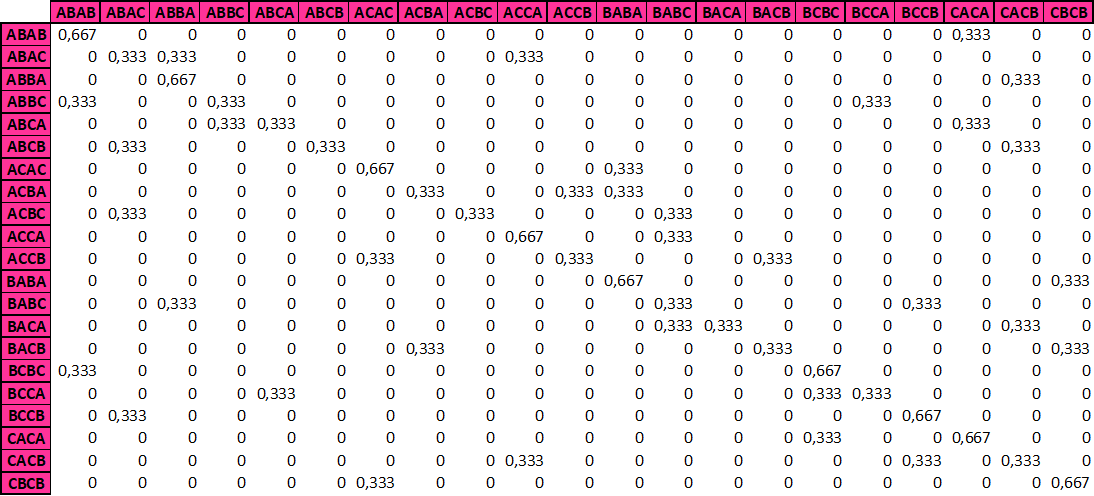

<h3> Matriz de Transição caso FIFO elevada à 100

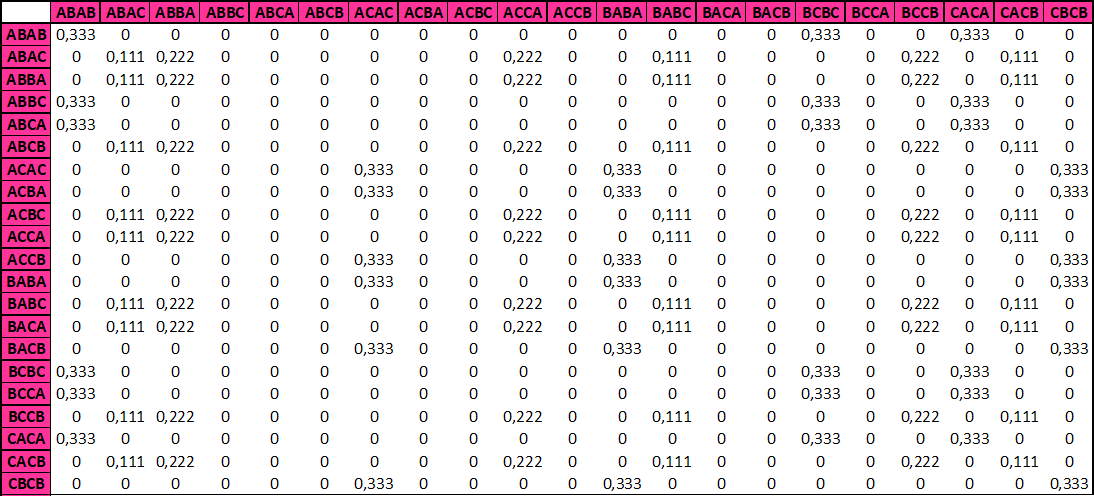

### Caso LRU

In [538]:
intervaloConfiancaLRU1_3 = intervaloDeConfianca(10,1, "LRU", 3 ,2, [1/3,1/3,1/3])
intervaloConfiancaLRU1_4 = intervaloDeConfianca(10,1, "LRU", 4 ,2, [1/4,1/4,1/4,1/4])

Cenário: 1
Caso: LRU
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.666841
Intervalo de Confiança: [0.6659513005353267, 0.6677306994646733]
-------- 

Cenário: 1
Caso: LRU
Tamanho de cada cache: 2
Número de conteúdos: 4
Média: 0.499763
Intervalo de Confiança: [0.4988751046403095, 0.5006508953596905]
-------- 



<h3> Matriz de Transição caso LRU

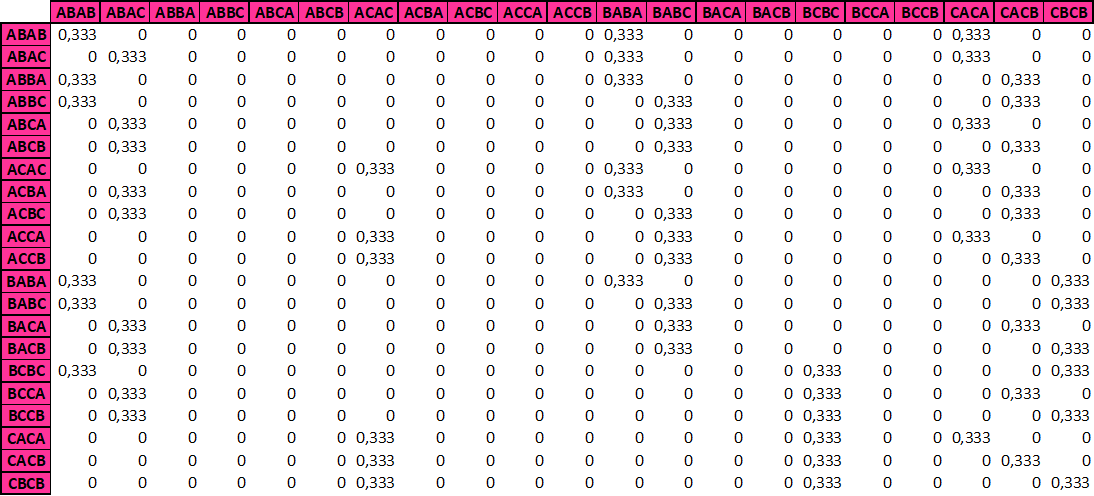

<h3> Matriz de Transição caso LRU elevada à 100

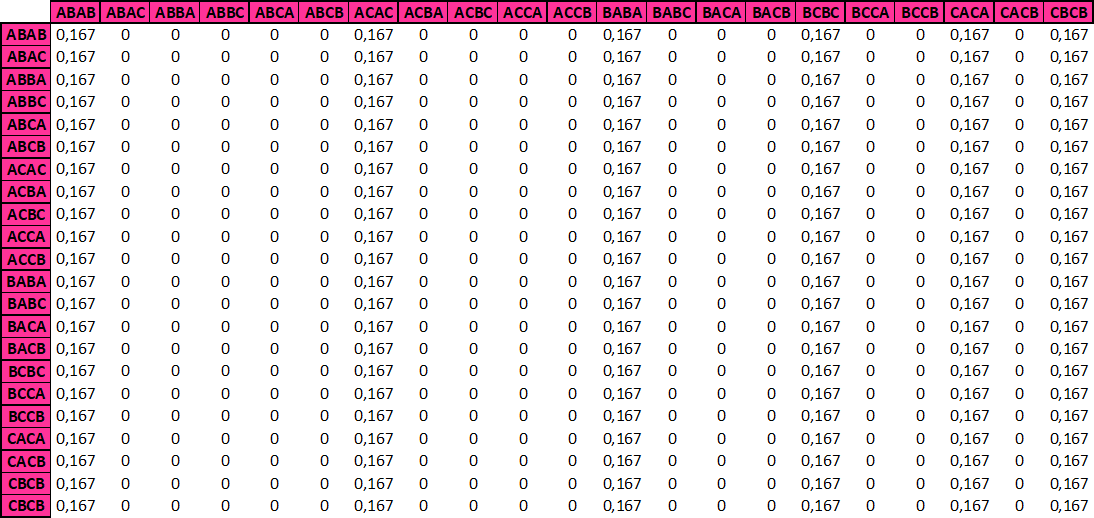

### Caso Random

In [539]:
intervaloConfiancaRandom1_3 = intervaloDeConfianca(10,1, "Random", 3,2, [1/3,1/3,1/3])
intervaloConfiancaRandom1_4 = intervaloDeConfianca(10,1, "Random", 4,2, [1/4,1/4,1/4,1/4])

Cenário: 1
Caso: Random
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.778597
Intervalo de Confiança: [0.7781130740550869, 0.7790809259449131]
-------- 

Cenário: 1
Caso: Random
Tamanho de cada cache: 2
Número de conteúdos: 4
Média: 0.611189
Intervalo de Confiança: [0.6104039352180616, 0.6119740647819384]
-------- 



<h3> Matriz de Transição caso Random

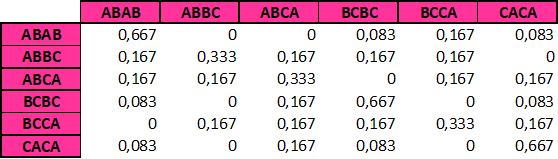

<h3> Matriz de Transição caso Random elevada à 100

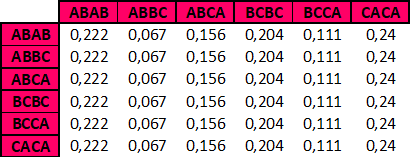

### Caso Estática

#### Caches com mesmos conteúdos populares

In [540]:
intervaloConfiancaEstaticaIgual1_3 = intervaloDeConfianca(10,1, "Estatica", 3 ,2, [1/3,1/3,1/3], cachesDiferentes = False)
intervaloConfiancaEstaticaIgual1_4 = intervaloDeConfianca(10,1, "Estatica", 4 ,2, [1/4,1/4,1/4,1/4], cachesDiferentes = False)

Cenário: 1
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.6669539999999999
Intervalo de Confiança: [0.6658262513582185, 0.6680817486417814]
-------- 

Cenário: 1
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 4
Média: 0.4997789999999999
Intervalo de Confiança: [0.4991863247136584, 0.5003716752863414]
-------- 



#### Caches com conteúdos populares diferentes

In [541]:
intervaloConfiancaEstaticaDif1_3 = intervaloDeConfianca(10,1, "Estatica", 3 ,2, [1/3,1/3,1/3], cachesDiferentes = True)
intervaloConfiancaEstaticaDif1_4 = intervaloDeConfianca(10,1, "Estatica", 4 ,2, [1/4,1/4,1/4,1/4], cachesDiferentes = True)

Cenário: 1
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 1.0
Intervalo de Confiança: [1.0, 1.0]
-------- 

Cenário: 1
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 4
Média: 0.775082
Intervalo de Confiança: [0.7286098168147939, 0.8215541831852062]
-------- 



<h3> Matriz de Transição caso Estatica

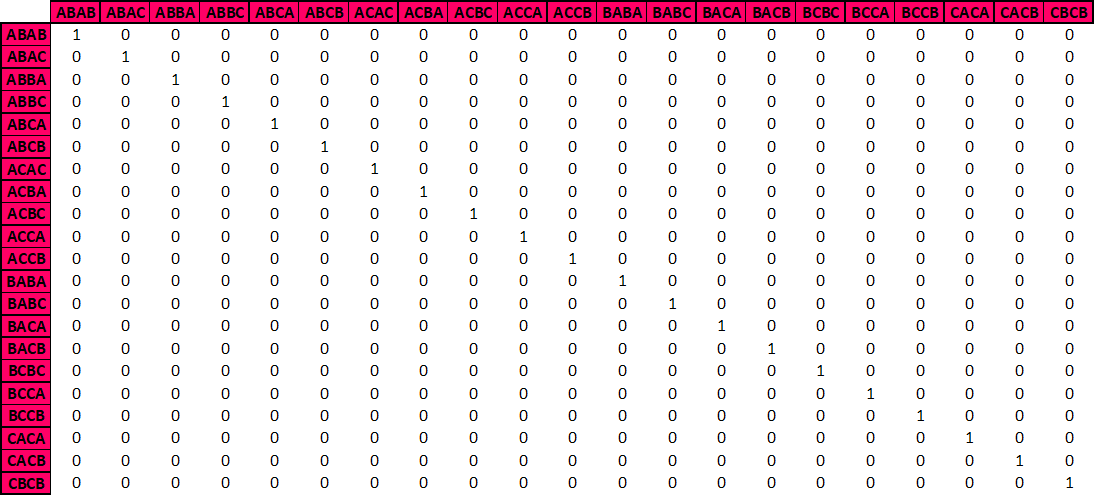

# II. Simulação Cenário II

## Função da Simulação do Cenário II



<h3> Parâmetros de entrada para a função

O simulador do cenário II é dado pela função abaixo que tem os seguintes parâmetros de entrada:

*   $numRequisicoes$ - Número de requisões que serão realizadas no experimento. Deve ser um número inteiro maior que $0$.
*   $caso$ - qual é o caso/tipo das caches. Os possíveis valores de entrada são: "FIFO", "LRU", "Random" ou "Estatica"
*   $numConteudos$ - número de conteúdos que podem ser requisitados. Deve ser um número inteiro maior que $0$.
*   $tamCache$ - tamanho das caches. Deve ser um número inteiro maior que $0$.
*   $probabilidades$ - probabilidade de cada conteúdo ser requisitado. Deve ser passado uma lista de tamanho igual ao número de conteúdos. Por exemplo, se são três conteúdos e possuem probabilidade de requisição uniforme, a lista passada deverá ser $[1/3,1/3,1/3]$
*   $p$ - probabildide de um canal falhar. Deve ser um float entre $0$ e $1$ e tem como default o valor $0.9$.
*   $depurar$ - Booleano para indicar se deseja imprimir a depuração do código ou não. O default é o valor "False", onde não se depura.
*   $cache1\_inicial$ - Estado inicial de uma cache. Se nada for passado, ela irá ser inicializada aleatóriamente.
*   $cache2\_inicial$ - Estado inicial da outra cache. Se nada for passado, ela irá ser inicializada aleatóriamente.
*   $cachesDiferentes$ - Booleano para indicar se deseja que as caches comecem em estados diferentes ou iguais. O default é o valor "True", onde começam com em estados diferentes.

<h3> Descrição do Simulador

Como o cenário II se assemelha muito ao cenário I, a descrição do simulador ficará muito parecida. Temos então que inicialmente, as caches são incializadas com os estados passados, caso não sejam passados, elas são inicializadas de forma aleatória com os conteúdos possíveis, que nesse caso serão representados por números inteiros de $1$ ao $numConteudos$ dado. 

Após isso, agenda-se um evento de uma requisição para cada conteúdo na lista de eventos, esse evento indica qual o tempo em que a requisição irá acontecer e qual conteúdo estará sendo requisitado. O tempo do agendamento é gerado de forma aleatória seguindo a distriuição exponencial tendo como parâmetro a taxa do conteúdo e a cada vez que um evento é adicionado, a lista é ordenada em função dos tempos apresentados em cada evento. 

Com as caches inicializadas e uma requisição agendada para cada conteúdo, começa-se a realização dos eventos, ou seja, as requisições agendadas começam a ser a realizadas. Em termos de código, inicia-se um loop em cima da lista de eventos, onde em cada iteração, a requsição com menor tempo presente na lista é encaminhada paras as duas caches. Neste ponto que o cenário II se diferencia do cenário I, neste caso há a probabilidade do canal que leva a requisição até a cache falhar, e com isso não tem a possibilidade da requisição ser atendida pela cache que por conta disso não mudará de estado.

Então para cada cache é realizado o seguinte processo: tenta-se encaminhar a requisição para cache, para isso gera-se um número entre $0$ e $1$, se o número for menor ou igual ao parâmetro $p$ (que por default é $0.9$, o que implica que o canal tem 90% de chance de funcionar), o canal funciona e a requisição alcança a cache e assim analisa-se se a cache possui o conteúdo requisitado e marca-se se a requisição foi atendida ou não, em ambos os casos em que o canal funciona, a cache muda de estado seguindo o padrão do tipo de cache especificado. Após a tentativa de se encaminhar a requisição para as duas caches, verifica-se a requisição foi atendida por pelo menos uma das caches, se sim, é marcado como sucesso. Após uma requsição ser feita, é agendada uma nova requisição para o mesmo conteúdo onde o tempo do agendamento é gerado de forma aleatória seguindo a distriuição exponencial com parâmetro igual a probabilidade do conteúdo, dessa forma garantimos que cada conteúdo seja requisitado seguindo sua taxa de chegada.

Após o número de requisições pedidas serem feitas, verifica-se o número de casos em que não ocorreu usermiss, ou seja, os eventos onde a requisição foi atendida e finalmente calcula-se a probabilidade de usermiss fazendo o seguinte cálculo: $(numero\ de\ requisicoes\ realizadas - numero\ de\ casos\ de\ nao\ usermiss)/numero\ de\ requisicoes\ realizadas$


In [542]:
def simulacaoCenario2(numRequisicoes, caso, numConteudos, tamCache, probabilidades, p = 0.9, depurar = False, cache1_inicial = False, cache2_inicial = False, cachesDiferentes = True):

  Requisicoes = []
  taxa = 1*probabilidades
  
  # agendando uma requisição para cada conteúdo
  for i in range (numConteudos):
    tempo = np.random.exponential(1/taxa[i])    
    par = [tempo, i +1]
    Requisicoes.append(par)  
  Requisicoes = sorted(Requisicoes, key=lambda tup: tup[0]) # ordena a lista de requisições em função do menor tempo
    

  # se não foi passado o estado inicial para cache 1, inicializa a cache aleatóriamente
  if not cache1_inicial:    
    cache1_inicial = initializeCache(numConteudos, tamCache)

  # se não foi passado o estado inicial para cache 2, inicializa a cache para um estado igual ou diferente da cache 1
  if not cache2_inicial:
    cache2_inicial = []

    # caches começam com estados iniciais diferentes
    if cachesDiferentes:
      cache2_inicial = initializeCache(numConteudos, tamCache)
      if (caso == "Estatica"):
        while (list(set(cache2_inicial)) == list(set(cache1_inicial))):
          cache2_inicial = initializeCache(numConteudos, tamCache) 
      else:
        while (cache2_inicial == cache1_inicial):
          cache2_inicial = initializeCache(numConteudos, tamCache)    

    # caches começam com estados iniciais iguais
    else:
      cache2_inicial = cache1_inicial.copy()

  cache1 = cache1_inicial
  cache2 = cache2_inicial

  sucessos = 0 # contador de sucessos
  requisicoes = 0 # contador de requisições
  userMiss = 0 # contador de usermiss

  # enquanto as requisições realizadas for menor que o numero de requisicoes
  while (requisicoes < numRequisicoes):

    RequicaoAtendidaC1 = 0
    RequicaoAtendidaC2 = 0

    evento = Requisicoes[0]
    tempoAtual = evento[0] # tempo atual
    conteudo = evento[1] # conteudo da requisição atual

    if (depurar): print("Tempo " + str(tempoAtual) + " ocorreu requisição do tipo " + str(conteudo) + "\n")
    if (depurar): print("Cache 1:" + str(cache1))

    numAleatorioC1 = np.random.uniform(0, 1)
    if (numAleatorioC1 <= p):
      if (depurar): print("Canal 1 funcionou!")
      cache1, RequicaoAtendidaC1 = cacheReceivesReq(caso, cache1, conteudo, depurar)
    else:
      if (depurar): print("Canal 1 não funcionou!")

    if (depurar): print("\n")
    if (depurar): print("Cache 2:" + str(cache2))


    numAleatorioC2 = np.random.uniform(0, 1)
    if (numAleatorioC2 <= p):
      if (depurar): print("Canal 2 funcionou!")
      cache2, RequicaoAtendidaC2 = cacheReceivesReq(caso, cache2, conteudo,depurar)
    else:
      if (depurar): print("Canal 2 não funcionou!") 


    if (RequicaoAtendidaC1 or RequicaoAtendidaC2):
      sucessos = sucessos + 1
    
    else:
      if (depurar): print("\n")
      userMiss = userMiss + 1
      if (depurar): print("User Miss :/ !")

    if (depurar): print("------ \n")

    del Requisicoes[0]

    tempoAgendado = tempoAtual + np.random.exponential(1/taxa[conteudo-1])
    Requisicoes.append([tempoAgendado,conteudo])  
    Requisicoes = sorted(Requisicoes, key=lambda tup: tup[0])
    
    requisicoes = requisicoes + 1    


  if (depurar): print("Sucessos: " + str(sucessos))
  if (depurar): print("User Miss: " + str(userMiss))
  return cache1, cache2, userMiss/numRequisicoes


## Simulação dos casos com depuração

<h4> Abaixo são realizados testes onde são feitas 10 requisições apenas para fins de vizualizar a depuração do simulador para cado tipo de cache.

### Simulação caso FIFO

In [543]:
va1, var2, fifo_sim2_3 = simulacaoCenario2(10,"FIFO",3, 2 , [1/3,1/3,1/3], depurar=True)

Tempo 2.920348240906812 ocorreu requisição do tipo 2

Cache 1:[2, 3]
Canal 1 funcionou!
Cache possui requisição!
Cache permanece inalterada.


Cache 2:[1, 2]
Canal 2 funcionou!
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 3.174330027396911 ocorreu requisição do tipo 2

Cache 1:[2, 3]
Canal 1 funcionou!
Cache possui requisição!
Cache permanece inalterada.


Cache 2:[1, 2]
Canal 2 funcionou!
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 5.314784971894311 ocorreu requisição do tipo 1

Cache 1:[2, 3]
Canal 1 funcionou!
Cache não possui conteúdo da requisição )=
Conteúdo requisitado entrará na primeira posição, e o conteúdo da última sairá.
Novo estado da cache: [1, 2]


Cache 2:[1, 2]
Canal 2 funcionou!
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 5.457136908833104 ocorreu requisição do tipo 1

Cache 1:[1, 2]
Canal 1 funcionou!
Cache possui requisição!
Cache permanece inalterada.


Cache 2:[1, 2]
Canal 2 funcionou!
Cache p

### Simulação caso LRU

In [544]:
va1, var2, lru_sim2_3 = simulacaoCenario2(10,"LRU",3, 2 , [1/3,1/3,1/3],depurar=True)

Tempo 0.5370370501047022 ocorreu requisição do tipo 2

Cache 1:[3, 1]
Canal 1 funcionou!
Cache não possui conteúdo da requisição )=
Conteúdo requisitado entrará na primeira posição, e o conteúdo da última sairá.
Novo estado da cache: [2, 3]


Cache 2:[3, 2]
Canal 2 funcionou!
Cache possui requisição!
Conteúdo requisitado ficará na primeira posição.
Novo estado da cache: [2, 3]
------ 

Tempo 1.263627473661835 ocorreu requisição do tipo 3

Cache 1:[2, 3]
Canal 1 funcionou!
Cache possui requisição!
Conteúdo requisitado ficará na primeira posição.
Novo estado da cache: [3, 2]


Cache 2:[2, 3]
Canal 2 funcionou!
Cache possui requisição!
Conteúdo requisitado ficará na primeira posição.
Novo estado da cache: [3, 2]
------ 

Tempo 3.230939706705736 ocorreu requisição do tipo 3

Cache 1:[3, 2]
Canal 1 funcionou!
Cache possui requisição!
Conteúdo requisitado ficará na primeira posição.
Novo estado da cache: [3, 2]


Cache 2:[3, 2]
Canal 2 funcionou!
Cache possui requisição!
Conteúdo requisitado

### Simulação caso Random

In [545]:
va1, var2, random_sim2_3 = simulacaoCenario2(10,"Random", 3, 2 , [1/3,1/3,1/3],depurar=True)

Tempo 1.4939828005548557 ocorreu requisição do tipo 1

Cache 1:[3, 1]
Canal 1 funcionou!
Cache possui requisição!
Cache permanece inalterada.


Cache 2:[1, 3]
Canal 2 funcionou!
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 2.418076198380359 ocorreu requisição do tipo 2

Cache 1:[3, 1]
Canal 1 não funcionou!


Cache 2:[1, 3]
Canal 2 funcionou!
Cache não possui conteúdo da requisição )=
Conteúdo requisitado entrará numa posição aleatória.
Novo estado da cache: [2, 3]


User Miss :/ !
------ 

Tempo 2.4399364879461904 ocorreu requisição do tipo 3

Cache 1:[3, 1]
Canal 1 não funcionou!


Cache 2:[2, 3]
Canal 2 funcionou!
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 2.65891742590175 ocorreu requisição do tipo 2

Cache 1:[3, 1]
Canal 1 funcionou!
Cache não possui conteúdo da requisição )=
Conteúdo requisitado entrará numa posição aleatória.
Novo estado da cache: [2, 1]


Cache 2:[2, 3]
Canal 2 funcionou!
Cache possui requisição!
Cache permanece i

### Simulação caso Estátca

In [546]:
va1, var2, estatica_sim2_3 = simulacaoCenario2(10,"Estatica", 3, 2 , [1/3,1/3,1/3],depurar=True)

Tempo 0.22182015440410127 ocorreu requisição do tipo 3

Cache 1:[3, 2]
Canal 1 funcionou!
Cache possui requisição!
Cache permanece inalterada.


Cache 2:[1, 2]
Canal 2 funcionou!
Cache não possui conteúdo da requisição )=
Cache permanece inalterada.
------ 

Tempo 0.9330920884234983 ocorreu requisição do tipo 1

Cache 1:[3, 2]
Canal 1 funcionou!
Cache não possui conteúdo da requisição )=
Cache permanece inalterada.


Cache 2:[1, 2]
Canal 2 funcionou!
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 0.9851858513828697 ocorreu requisição do tipo 1

Cache 1:[3, 2]
Canal 1 funcionou!
Cache não possui conteúdo da requisição )=
Cache permanece inalterada.


Cache 2:[1, 2]
Canal 2 funcionou!
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 2.0849902383352483 ocorreu requisição do tipo 2

Cache 1:[3, 2]
Canal 1 funcionou!
Cache possui requisição!
Cache permanece inalterada.


Cache 2:[1, 2]
Canal 2 funcionou!
Cache possui requisição!
Cache permanece inalte

## Intervalos de Confiança para cada Caso

<h4> Abaixo é calculado o intervalo de confiança para cada caso. O intervalo é calculado pela função auxiliar "intervaloDeConfianca" em que se realiza 10 simulações onde em cada simulação são feitas 100000 requisições. Os limites inferiores e superiorers do intervalo são obtidos da seguinte maneira:

$limite\ inferior = (media\ dos\ resultados\ das\ simulacoes\ - 1.96*desvio\ padrao\ dos\ resultados\ das\ simulacoes)/ \ raiz\ quadrada\ do\ numero\ de\ simulacoes$

$limite\ superior\ = (media\ dos\ resultados\ das\ simulacoes\ + 1.96*desvio\ padrao\ dos\ resultados\ das\ simulações)/ \ raiz\ quadrada\ do\ numero\ de\ simulacoes$

### Caso FIFO

In [547]:
intervaloConfiancaFIFO2_3 = intervaloDeConfianca(10,2, "FIFO", 3 ,2, [1/3,1/3,1/3])
intervaloConfiancaFIFO2_4 = intervaloDeConfianca(10,2, "FIFO", 4 ,2, [1/4,1/4,1/4,1/4])

Cenário: 2
Caso: FIFO
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.239882
Intervalo de Confiança: [0.2286936446650922, 0.25107035533490785]
-------- 

Cenário: 2
Caso: FIFO
Tamanho de cada cache: 2
Número de conteúdos: 4
Média: 0.44635400000000003
Intervalo de Confiança: [0.4453384468475555, 0.44736955315244453]
-------- 



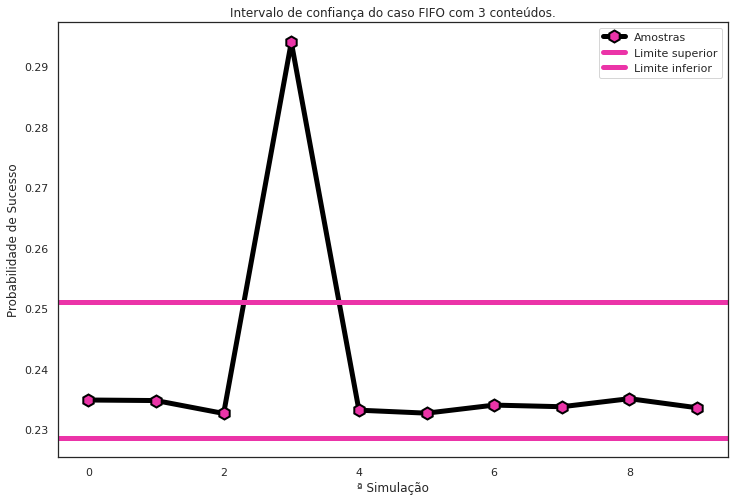

In [548]:
str_tipo = 'FIFO'
tipo = 0
lim, sucessos = intervaloConfiancaFIFO2_3
plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem = 3, cenario = 2)

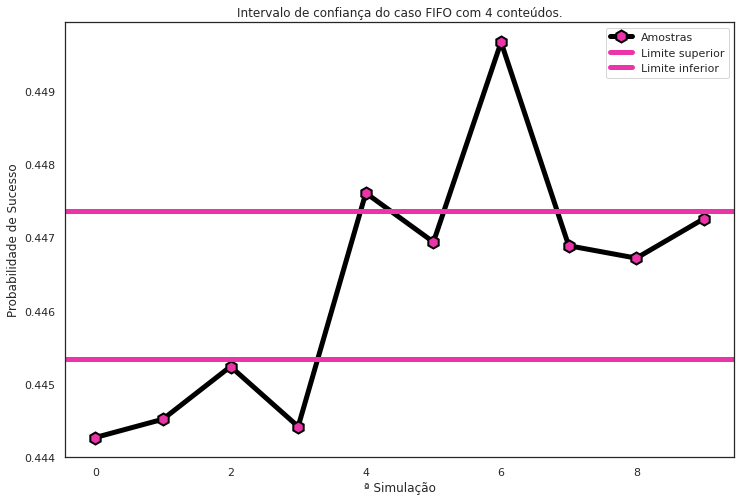

In [549]:
str_tipo = 'FIFO'
tipo = 0
lim, sucessos = intervaloConfiancaFIFO2_4
plotar_intervalo(tipo, str_tipo, sucessos,  lim, num_elem = 4, cenario = 2)

### Caso LRU

In [550]:
intervaloConfiancaLRU2_3 = intervaloDeConfianca(10,2, "LRU", 3 ,2, [1/3,1/3,1/3])
intervaloConfiancaLRU2_4 = intervaloDeConfianca(10,2, "LRU", 4 ,2, [1/4,1/4,1/4,1/4])

Cenário: 2
Caso: LRU
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.30133499999999996
Intervalo de Confiança: [0.3007708450588712, 0.30189915494112873]
-------- 

Cenário: 2
Caso: LRU
Tamanho de cada cache: 2
Número de conteúdos: 4
Média: 0.463582
Intervalo de Confiança: [0.4629153360287521, 0.46424866397124787]
-------- 



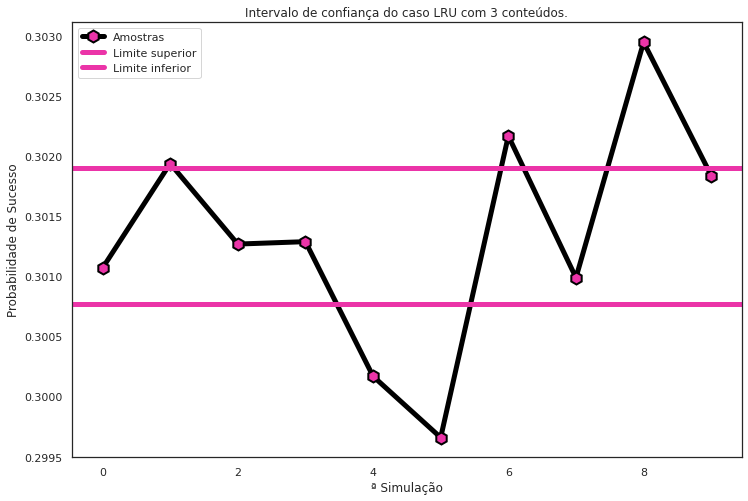

In [551]:
str_tipo = 'LRU'
tipo = 0
lim, sucessos = intervaloConfiancaLRU2_3
plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem = 3, cenario = 2)

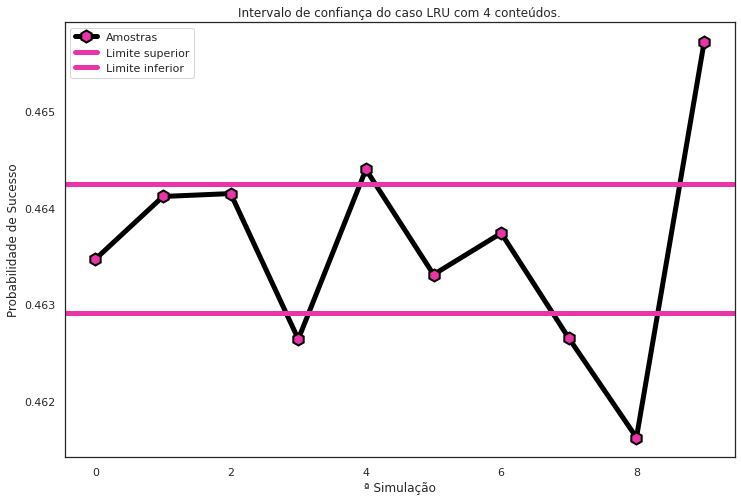

In [552]:
str_tipo = 'LRU'
tipo = 0
lim, sucessos = intervaloConfiancaLRU2_4
plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem = 4, cenario = 2)

### Caso Random

In [553]:
intervaloConfiancaRandom2_3 = intervaloDeConfianca(10,2, "Random", 3,2, [1/3,1/3,1/3])
intervaloConfiancaRandom2_4 = intervaloDeConfianca(10,2, "Random", 4,2, [1/4,1/4,1/4,1/4])

Cenário: 2
Caso: Random
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.233731
Intervalo de Confiança: [0.23311740760773947, 0.23434459239226052]
-------- 

Cenário: 2
Caso: Random
Tamanho de cada cache: 2
Número de conteúdos: 4
Média: 0.396586
Intervalo de Confiança: [0.395963847712019, 0.397208152287981]
-------- 



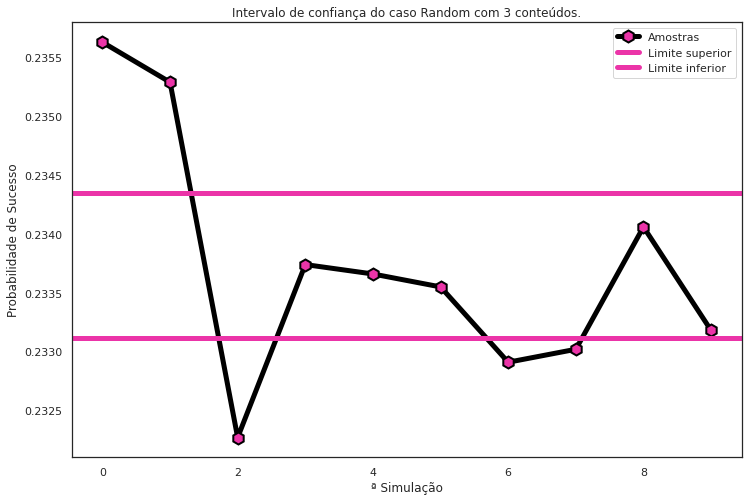

In [554]:
str_tipo = 'Random'
lim, sucessos = intervaloConfiancaRandom2_3
tipo = 0
plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem = 3, cenario = 2)

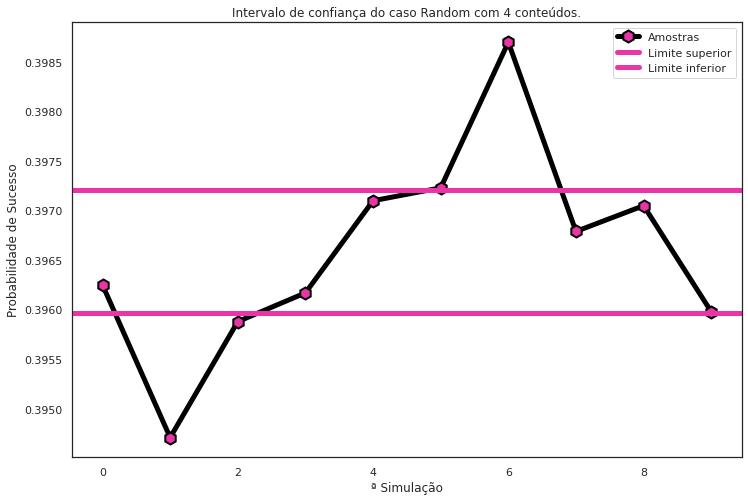

In [555]:
str_tipo = 'Random'
lim, sucessos = intervaloConfiancaRandom2_4
tipo = 0
plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem = 4, cenario = 2)

### Caso Estática

#### Caches com mesmos conteúdos populares

In [556]:
intervaloConfiancaEstaticaIgual2_3 = intervaloDeConfianca(10,2, "Estatica", 3 ,2, [1/3,1/3,1/3], cachesDiferentes = False)
intervaloConfiancaEstaticaIgual2_4 = intervaloDeConfianca(10,2, "Estatica", 4 ,2, [1/4,1/4,1/4,1/4], cachesDiferentes = False)

Cenário: 2
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.340827
Intervalo de Confiança: [0.34024282102180925, 0.34141117897819073]
-------- 

Cenário: 2
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 4
Média: 0.5049230000000001
Intervalo de Confiança: [0.5041195575325141, 0.5057264424674861]
-------- 



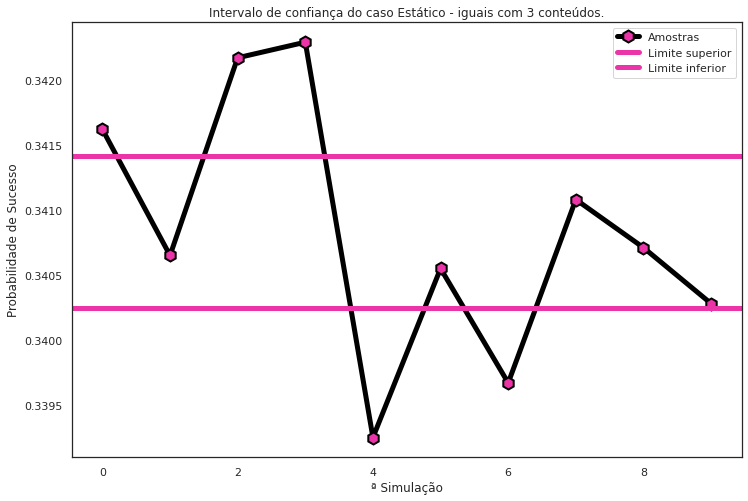

In [557]:
str_tipo = 'Estático - iguais'
lim, sucessos = intervaloConfiancaEstaticaIgual2_3
tipo = 0
plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem = 3, cenario = 2)

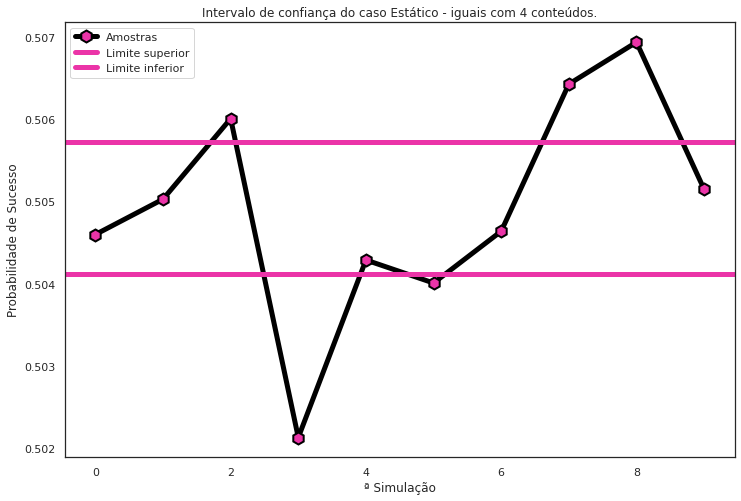

In [558]:
str_tipo = 'Estático - iguais'
lim, sucessos = intervaloConfiancaEstaticaIgual2_4
tipo = 0
plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem = 4, cenario = 2)

#### Caches com conteúdos populares diferentes

In [559]:
intervaloConfiancaEstaticaDif2_3 = intervaloDeConfianca(10,2, "Estatica", 3 ,2, [1/3,1/3,1/3], cachesDiferentes = True)
intervaloConfiancaEstaticaDif2_4 = intervaloDeConfianca(10,2, "Estatica", 4 ,2, [1/4,1/4,1/4,1/4], cachesDiferentes = True)

Cenário: 2
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.069927
Intervalo de Confiança: [0.06951133163969338, 0.07034266836030663]
-------- 

Cenário: 2
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 4
Média: 0.26192200000000004
Intervalo de Confiança: [0.21184827652671157, 0.3119957234732885]
-------- 



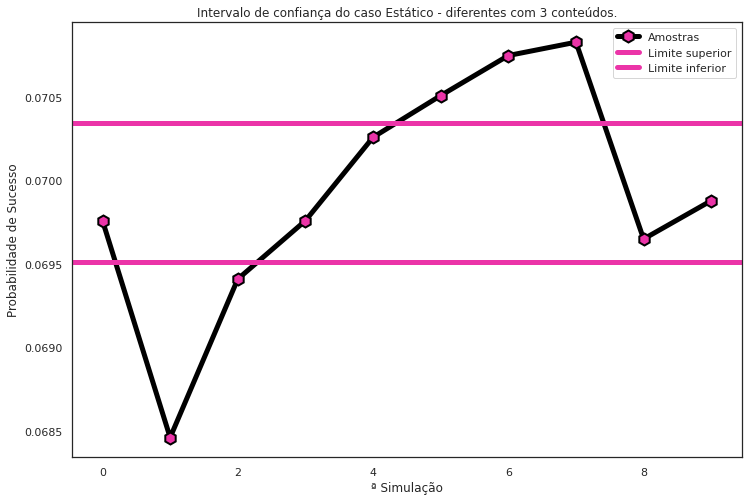

In [560]:
str_tipo = 'Estático - diferentes'
lim, sucessos = intervaloConfiancaEstaticaDif2_3
tipo = 0
plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem = 3, cenario = 2)

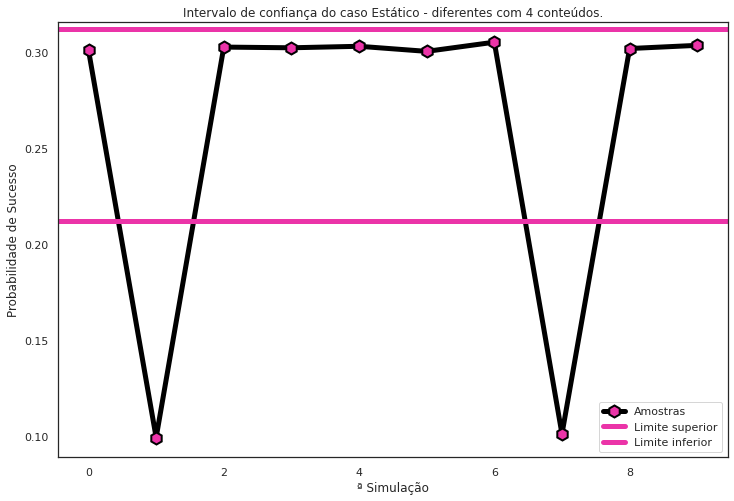

In [561]:
str_tipo = 'Estático - diferentes'
lim, sucessos = intervaloConfiancaEstaticaDif2_4
tipo = 0
plotar_intervalo(tipo, str_tipo, sucessos, lim,num_elem = 4, cenario = 2)

# III. Simulação Cenário III

## Funções da Simulação do Cenário III

<h3> Parâmetros de entrada para a função

O simulador do cenário $III$ é dado pela função abaixo que tem os seguintes parâmetros de entrada:

*   $numRequisicoes$ - Número de requisões que serão realizadas no experimento. Deve ser um número inteiro maior que $0$.
*   $caso$ - qual é o caso/tipo das caches. Os possíveis valores de entrada são: "FIFO", "LRU", "Random" ou "Estatica"
*   $numConteudos$ - número de conteúdos que podem ser requisitados. Deve ser um número inteiro maior que $0$.
*   $tamCache$ - tamanho das caches. Deve ser um número inteiro maior que $0$.
*   $probabilidades$ - probabilidade de cada conteúdo ser requisitado. Deve ser passado uma lista de tamanho igual ao número de conteúdos. Por exemplo, se são três conteúdos e possuem probabilidade de requisição uniforme, a lista passada deverá ser $[1/3,1/3,1/3]$
*   $p$ - probabildide de um canal falhar. Deve ser um float entre $0$ e $1$ e tem como default o valor $0.9$.
*   $teta$ - taxa de serviço do servidor à cache. Deve ser um inteiro maior do que $0$  e tem como default o valor $math.inf = \infty$.
*   $alpha$ - taxa de timeout para uma requisição. Deve ser um inteiro maior do que $0$  e tem como default o valor $1$.
*   $depurar$ - Booleano para indicar se deseja imprimir a depuração do código ou não. O default é o valor "False", onde não se depura.
*   $cachesDiferentes$ - Booleano para indicar se deseja que as caches comecem em estados diferentes ou iguais. O default é o valor "True", onde começam com em estados diferentes.

<h3> Descrição do Simulador

O cenário $III$ apresenta um funcionamento mais próximo da realidade. Nossa modelagem do problema funciona como descrito abaixo:

Temos que inicialmente, as caches são incializadas com os estados passados, caso não sejam passados, elas são inicializadas de forma aleatória com os conteúdos possíveis, que nesse caso serão representados por números inteiros de $1$ ao $numConteudos$ dado. 

Após isso, agenda-se um evento de uma requisição para cada conteúdo na lista de eventos, esse evento indica qual o tempo em que a requisição irá acontecer e qual conteúdo estará sendo requisitado. O tempo do agendamento é gerado de forma aleatória seguindo a distriuição exponencial tendo como parâmetro a taxa do conteúdo e a cada vez que um evento é adicionado, a lista é ordenada em função dos tempos apresentados em cada evento. 

Com as caches inicializadas e uma requisição agendada para cada conteúdo, inicia-se o processo. Em termos de código, inicia-se um loop em cima da lista de eventos, onde para cada requisição, novos eventos são gerados para simular seu atendimento. Primeiramente, tenta-se encaminhar a requisição com menor tempo presente na lista inicial de eventos para as duas caches. Aqui temos um novo evento e mais dois possíveis novos eventos para acrescentar na lista, pois tenta-se encaminhar a requisição para cada cache, para isso gera-se um número entre $0$ e $1$, se o número for menor ou igual ao parâmetro $p$ (que por default é $0.9$, o que implica que o canal tem 90% de chance de funcionar), o canal funciona e cria-se um novo evento da requsição chegando na cache, repete-se isso para as duas. Assim, há a possibilidade da criação de um evento onde a requisição chega na cache 1 e/ou outro evento onde a requisição chega na cache 2. Além disso, é gerado um número aleatório seguindo a distribuição exponencial com parametro $1/\alpha$ para indicar o timer da requisição, assim, cria-se um novo evento que será o timeout da requisição.

Quando o evento da requisição chegando na cache acontecer, é verificado se a cache possui o conteúdo requisitado. Se sim, cria-se um novo evento da requisição sendo atendida pela cache agendado para acontecer em $n$ segundos, onde $n$ é calculado gerando um número aleatório seguindo a distribuição exponencial com parametro $1/\mu$. Já se a cache não possuir, primeiro cria-se um novo evento onde cache receberá o conteúdo requisitado do servidor para assim poder atender a requisição, o evento é agendado para acontecer em $m$ segundos, onde $m$ é calculado gerando um número aleatório seguindo a distribuição exponencial com parametro $1/\theta$ ($\theta = \infty$ no caso desse cenário) e só quando esse novo evento criado acontecer, que cria-se o evento da requisição sendo atendida.

Já se o evento timeout da requisição chegar a acontecer, da forma que modelamos, ele cancela todos os outros eventos referentes a requisição que sofreu o timeout, isso para simular o cancelamento do processo de tentativa de atender a requisição pela caches, e cria um evento da requisição sendo atendida pelo servidor alternativo, o evento é agendado para acontecer em $l$ segundos, onde $l$ é calculado gerando um número aleatório seguindo a distribuição exponencial com parametro $1/\gamma$, onde nesse cenário.

Por último, quando o evento requisição atendida acontece, seja pela cache $1$, cache $2$ ou pelo servidor alternativo por conta do timeout, verificá-se se há mias requisições abertas para o mesmo conteúdo da que está sendo atendida, e cancela todos os processos referentes a essas requisições junto com os processos referentes à que está sendo atendida. Após isso, anota-se qual foi o tempo de atendimento de cada requisição fazendo $tempo\ do\ evento\ requisição\ atendida\ - tempo\ de\ chegada\ da\ requisicao$.

Todos esses eventos acontecem para cada requisição e se misturam, ou seja, pode ter um evento da requisição "req2" chegando na cache $1$ enquando e logo em seguida outra requição "req1" sendo atendida pelo servidor alternativo. 

Após termos o número especificado pelo parâmetro de requisições atendida, seja pelo jeito que for, as iterações param e calcula-se o tempo de atendimento médio das requisições fazendo-se $soma\ do\ tempo\ de\ atendimendo\ de\ cada\ requisicao/numero\ de\ requisições$. 

Lebrando que sempre que uma nova requisição chega, outra requisição para o mesmo conteúdo é agendada onde o tempo do agendamento é gerado de forma aleatória seguindo a distriuição exponencial com parâmetro igual a probabilidade do conteúdo, dessa forma garantimos que cada conteúdo seja requisitado seguindo sua taxa de chegada. A depuração apresentada mais embaixo deve ajudar a entender o funcionamento da simulação aqui descrito que imaginamos que possa ser confusa já que muitos eventos são gerados.





In [562]:
def adicionaEvento(Requisicoes,tempoAgendamento, conteudo, nomeEvento, identfRequisicao):
  # Adicionando o timeout da requisição na lista de eventos
      evento = [tempoAgendamento, conteudo, nomeEvento, identfRequisicao]
      Requisicoes.append(evento)
      Requisicoes = sorted(Requisicoes, key=lambda tup: tup[0])
      return Requisicoes

def atendeRequisicoesMesmoConteudo(Requisicoes,tempoAtual, conteudo, aberturaRequisicoes, dicionario, requisicoes,identfRequisicao, depurar = False, cancelaTodas = True):

  
  if (cancelaTodas):
    removerEventos = []
    # Remove os eventos referentes as requisições que foram atendidas
    for evento in Requisicoes: 
      if evento[1] == conteudo and "SISTEMA" not in evento: 
          removerEventos.append(evento)

    # Remove os eventos referentes as requisições que foram atendidas
    for i in range(len(removerEventos)):
      Requisicoes.remove(removerEventos[i])

  atendidasAgora = [x for x in aberturaRequisicoes if (("conteudo " + str(conteudo)) == x[1] and x[3]==0)]
  requisicoesAtendidas =  [x[0] for x in atendidasAgora]
                                   
  if (depurar):
    if(len(requisicoesAtendidas)>1):
      requisicoesAtendidas.remove(identfRequisicao)
      print("Requisições " + str(requisicoesAtendidas) + " atendidas pois também eram para o conteúdo " + str(conteudo))
        
  for req in atendidasAgora:
    #print("ATENDEU OUTRAS REQUISICOES!")
    tempoAtendimentoReq = tempoAtual - req[2]
    identfRequisicao = req[0]
    dicionario[identfRequisicao] = [tempoAtendimentoReq]
    requisicaoAtual = [x for x in aberturaRequisicoes if (identfRequisicao == x[0])]
    requisicaoAtual = requisicaoAtual[0]
    aberturaRequisicoes.remove(requisicaoAtual)
    requisicoes = requisicoes + 1 

  return Requisicoes, aberturaRequisicoes, dicionario, requisicoes


In [563]:
def simulacaoCenario3_4(numRequisicoes, caso, numConteudos, tamCache, probabilidades, teta, gama = 1, mi = 1, alpha = 1, p = 0.9, depurar = False, cachesDiferentes = True, cancelaTodas = True):

  
  Requisicoes = []  
  requsicoes = numConteudos
  taxa = probabilidades
  tempoAtendimentoC1 = {}
  tempoAtendimentoC2 = {}
  tempoAtendimentoTimeout = {}
  aberturaRequisicoes = []
  
  for i in range (numConteudos):
    tempo = np.random.exponential(1/taxa[i])    
    agendamento = [tempo, i +1, "SISTEMA", "req" + str(i)]
    aberturaRequisicoes.append(["req" + str(i), "conteudo " + str(i +1), tempo, -1])
    Requisicoes.append(agendamento)

  Requisicoes = sorted(Requisicoes, key=lambda tup: tup[0])
  if (depurar):print(Requisicoes)
  if (depurar):print("\n")
    
  cache1_inicial = initializeCache(numConteudos, tamCache)

 # se não foi passado o estado inicial para cache 2, inicializa a cache para um estado igual ou diferente da cache 1
  
  cache2_inicial = []

  # caches começam com estados iniciais diferentes
  if cachesDiferentes:
    cache2_inicial = initializeCache(numConteudos, tamCache)
    if (caso == "Estatica"):
      while (list(set(cache2_inicial)) == list(set(cache1_inicial))):
        cache2_inicial = initializeCache(numConteudos, tamCache) 
    else:
      while (cache2_inicial == cache1_inicial):
        cache2_inicial = initializeCache(numConteudos, tamCache)    

  # caches começam com estados iniciais iguais
  else:
    cache2_inicial = cache1_inicial.copy()

  cache1 = cache1_inicial
  cache2 = cache2_inicial

  requisicaoGerada = numConteudos 
  requisicoes = 0 # contador de requisições
  
  while (requisicoes < numRequisicoes):

    evento = Requisicoes[0]
    del Requisicoes[0]

    tempoAtual = evento[0]
    conteudo = evento[1] # conteudo da requisição
    identfRequisicao = evento[3] # identificador da requisição

    if (depurar):print("Evento: " + str(evento) + str("\n"))  
    
    if (evento[2] == "SISTEMA" ):
      
      if (depurar):print("No tempo " + str(tempoAtual) + " cliente faz requisição '" + 
                         str(identfRequisicao) + "' do conteúdo " + str(conteudo) + "\n")

      timer = np.random.exponential(1/alpha)

      # Adicionando o timeout da requisição na lista de eventos
      timeoutReq = [tempoAtual + timer, conteudo, "TIMEOUT_" + str(identfRequisicao), identfRequisicao]
      if (depurar):print("Timer " + str(evento[3] + " = " + str(timer)))
      Requisicoes.append(timeoutReq)
      Requisicoes = sorted(Requisicoes, key=lambda tup: tup[0])

      for requisicao in aberturaRequisicoes:

        if identfRequisicao == requisicao[0]:
          requisicaoAtual = requisicao

      indice = aberturaRequisicoes.index(requisicaoAtual)
      aberturaRequisicoes[indice][3] = 0

      # Verifica se o canal 1 funciona, se sim (probabilidade = p), envia requisição para cache 1
      canal1Funciona = np.random.uniform(0, 1)
      if (canal1Funciona <= p):

        # Cria evento da requisição chegando na cache 1   
        tempoCanal = np.random.exponential(1/mi)      
        Requisicoes = adicionaEvento(Requisicoes,tempoAtual + tempoCanal, conteudo, "CACHE1", identfRequisicao) 
        if (depurar): print("Canal 1 funcionou! Requisição seguirá para a cache 1 e cherará em " + str(tempoCanal) + " segundos")   

      else:
          if (depurar): print("Canal 1 não funcionou!")

      # Verifica se o canal 2 funciona, se sim (probabilidade = p), envia requisição para cache 2
      canal2Funciona = np.random.uniform(0, 1)
      if (canal2Funciona <= p):    

        # Cria evento da requisição chegando na cache 2   
        tempoCanal = np.random.exponential(1/mi)      
        Requisicoes = adicionaEvento(Requisicoes,tempoAtual + tempoCanal, conteudo, "CACHE2", identfRequisicao)   
        if (depurar): print("Canal 2 funcionou! Requisição seguirá para a cache 2 e cherará em " + str(tempoCanal) + " segundos")     

      else:
          if (depurar): print("Canal 2 não funcionou!")

      # Agendando nova requisição 
      tempoAgendado = tempoAtual + np.random.exponential(1/taxa[conteudo-1])
      Requisicoes = adicionaEvento(Requisicoes,tempoAgendado, conteudo, "SISTEMA", "req" + str(requisicaoGerada))
      aberturaRequisicoes.append(["req" + str(requisicaoGerada), "conteudo " + str(conteudo), tempoAgendado, -1])
      requisicaoGerada = requisicaoGerada + 1 # contador de requisições geradas 
        

    # Evento: Requisição chega na cache 1
    elif (evento[2] == "CACHE1"):
      if (depurar): print(" No tempo " + str(tempoAtual) + " a requisição '" + str(identfRequisicao)
       + " do conteúdo " + str(conteudo) + " chega na cache 1")
      if (depurar): print("Estado atual cache 1:" + str(cache1))
      
      cache1, RequicaoAtendidaC1 = cacheReceivesReq3_4(caso, cache1, conteudo, depurar)
      
      if not (RequicaoAtendidaC1):# Se a cache não possui o conteúdo requisitado

        # Novo evento da solicitação do conteúdo sendo encaminhada para o servidor
        tempoIdaVoltaServidor = np.random.exponential(1/teta)  #tempo de delay do canal cache-servidor
        Requisicoes = adicionaEvento(Requisicoes, tempoAtual + tempoIdaVoltaServidor, conteudo, "CACHE1_SERVIDOR", identfRequisicao)     

      else: # cache possui o conteúdo, requisição será atendida

        # Novo evento da requisição sendo atendida pela cache 1
        tempoVoltaUsuario = np.random.exponential(1/mi) # tempo de delay do canal cache-usuário
        if (depurar):print("Requisição " + str(identfRequisicao) + " será atendida em " + str(tempoVoltaUsuario) + " segundos")
        Requisicoes = adicionaEvento(Requisicoes, tempoAtual + tempoVoltaUsuario, conteudo, "REQUISICAO_ATENDIDA_C1", identfRequisicao)  

    # Evento: Requisição chega na cache 2
    elif (evento[2] == "CACHE2"):
      if (depurar): print("No tempo " + str(tempoAtual) + " a requisição do tipo " + str(conteudo) + " chega na cache 2")
      if (depurar): print("Estado atual cache 2:" + str(cache2))
      cache2, RequicaoAtendidaC2 = cacheReceivesReq3_4(caso, cache2, conteudo, depurar)

      if not (RequicaoAtendidaC2): # Se a cache não possui o conteúdo requisitado

        # Novo evento da solicitação do conteúdo sendo encaminhada para o servidor
        tempoIdaVoltaServidor = np.random.exponential(1/teta)         
        Requisicoes = adicionaEvento(Requisicoes, tempoAtual + tempoIdaVoltaServidor, conteudo, "CACHE2_SERVIDOR", identfRequisicao) 
      

      else:# cache possui o conteúdo, requisição será atendida
        
        # Criação de novo evento da requisição sendo atendida pela cache 2
        tempoVoltaUsuario = np.random.exponential(1/mi) # tempo de delay do canal cache-usuário
        if (depurar):print("Requisição " + str(identfRequisicao) + " será atendida em " + str(tempoVoltaUsuario) + " segundos")
        Requisicoes = adicionaEvento(Requisicoes, tempoAtual + tempoVoltaUsuario, conteudo, "REQUISICAO_ATENDIDA_C2", identfRequisicao)


    # Evento: Solicitação do conteúdo sendo encaminhada da cache 1 para o servidor
    elif (evento[2] == "CACHE1_SERVIDOR"):
      
      if (depurar): print(" No tempo " + str(tempoAtual) + " cache 1 recebe conteúdo " + str(conteudo) + " para a requisição " + 
                          str(identfRequisicao) + " solicitado ao servidor")
      if (depurar): print("Estado anterior da cache 1:" + str(cache1))

      servidor_atende_cache3_4(caso, cache1, conteudo, depurar)
      # Criação de novo evento da requisição sendo atendida pela cache 1      
      
      tempoVoltaUsuario = np.random.exponential(1/mi)
      Requisicoes = adicionaEvento(Requisicoes, tempoAtual + tempoVoltaUsuario, conteudo, "REQUISICAO_ATENDIDA_C1", identfRequisicao)

   # Evento: Solicitação do conteúdo sendo encaminhada da cache 1 para o servidor
    elif (evento[2] == "CACHE2_SERVIDOR"):
      
      if (depurar): print(" No tempo " + str(tempoAtual) + " cache 2 recebe conteúdo " + str(conteudo) + " para a requisição " + 
                          str(identfRequisicao) + " solicitado ao servidor")
      if (depurar): print("Estado anterior da cache 2:" + str(cache1))

      servidor_atende_cache3_4(caso, cache2, conteudo, depurar)
      # Criação de novo evento da requisição sendo atendida pela cache 1      
      
      tempoVoltaUsuario = np.random.exponential(1/mi)
      Requisicoes = adicionaEvento(Requisicoes, tempoAtual + tempoVoltaUsuario, conteudo, "REQUISICAO_ATENDIDA_C2", identfRequisicao)

   
    # Evento: cache 1 atende requisição
    elif (evento[2] == "REQUISICAO_ATENDIDA_C1"):

      if (depurar): print("No tempo " + str(tempoAtual) + " a requisição " + str(identfRequisicao) + " do conteúdo " + 
                          str(conteudo) + " foi atendida pela cache 1")
      
      # Apagando evento de timeout da requisição 
      timeout = [x for x in Requisicoes if ("TIMEOUT_" + identfRequisicao == x[2])]

      if timeout:
        timeout = timeout[0]
        Requisicoes.remove(timeout)
      
      Requisicoes, aberturaRequisicoes,tempoAtendimentoC1,requisicoes = atendeRequisicoesMesmoConteudo(Requisicoes,tempoAtual, conteudo,
                                                                        aberturaRequisicoes, tempoAtendimentoC1,requisicoes, identfRequisicao, depurar, cancelaTodas)

    # Evento: cache 2 atende requisição
    elif (evento[2] == "REQUISICAO_ATENDIDA_C2"):

      if (depurar): print("No tempo " + str(tempoAtual) + " a requisição " + str(identfRequisicao) + " do conteúdo " + 
                          str(conteudo) + " foi atendida pela cache 2")      
      
      # Apagando evento de timeout da requisição
      timeout = [x for x in Requisicoes if ("TIMEOUT_" + identfRequisicao in x)]
      if timeout:
        timeout = timeout[0]
        Requisicoes.remove(timeout)      

      Requisicoes, aberturaRequisicoes,tempoAtendimentoC1, requisicoes = atendeRequisicoesMesmoConteudo(Requisicoes,tempoAtual, conteudo,
                                                                          aberturaRequisicoes, tempoAtendimentoC2,requisicoes,identfRequisicao, depurar,cancelaTodas)       
     
    # Evento timeout de uma requisição
    elif ("TIMEOUT" in evento[2]):

      if (depurar): print("No tempo " + str(tempoAtual) + " timeout para a requisição " + 
                          str(identfRequisicao))  
      

      tempoIdaVolta = np.random.exponential(1/gama)
      Requisicoes = adicionaEvento(Requisicoes, tempoAtual + tempoIdaVolta, conteudo, "REQUISICAO_ATENDIDA_SERVIDOR_ALTER", identfRequisicao) 

      if (depurar):print("Requisição seguirá para o Servidor Alternativo e voltará em " + str(tempoIdaVolta) + " segundos")
      
      
    elif ("REQUISICAO_ATENDIDA_SERVIDOR_ALTER" == evento[2]):

      if (depurar):print("Requisição " + str() + " atendida pelo servidor alternativo") 

      Requisicoes, aberturaRequisicoes,tempoAtendimentoTimeout,requisicoes = atendeRequisicoesMesmoConteudo(Requisicoes,tempoAtual, conteudo,
                                                                             aberturaRequisicoes, tempoAtendimentoTimeout,requisicoes,identfRequisicao, depurar,cancelaTodas)       

    #if (depurar):print("Requisições Atendidas: " + str(menorTempoAtendimento))    
    if (depurar):print("\nPróximos eventos: " + str(Requisicoes))
    if (depurar): print("-------- \n") 
    if (depurar):print("\n") 
  
  menorTempoAtendimento = {k: min(i for i in (tempoAtendimentoC1.get(k), tempoAtendimentoC2.get(k)) if i) for k in tempoAtendimentoC1.keys() | tempoAtendimentoC2}
  if tempoAtendimentoTimeout:
    menorTempoAtendimento.update(tempoAtendimentoTimeout)

  mediaTempo = np.array(list(dict.values(menorTempoAtendimento))).mean()

  if (depurar):print(menorTempoAtendimento) 
  if (depurar):print("\n") 
  return mediaTempo

In [564]:
def simulacaoCenario3_4APAGAR(numRequisicoes, caso, numConteudos, tamCache, probabilidades, teta, alpha = 1, gama = 1, mi = 1, p = 0.9, depurar = False, cachesDiferentes = True):

  
  Requisicoes = []  
  requsicoes = numConteudos
  taxa = probabilidades
  tempoAtendimentoC1 = {}
  tempoAtendimentoC2 = {}
  tempoAtendimentoTimeout = {}
  aberturaRequisicoes = []
  
  for i in range (numConteudos):
    tempo = np.random.exponential(1/taxa[i])    
    agendamento = [tempo, i +1, "SISTEMA", "req" + str(i)]
    aberturaRequisicoes.append(["req" + str(i), "conteudo " + str(i +1), tempo, -1])
    Requisicoes.append(agendamento)

  Requisicoes = sorted(Requisicoes, key=lambda tup: tup[0])
  if (depurar):print(Requisicoes)
  if (depurar):print("\n")
    
  cache1_inicial = initializeCache(numConteudos, tamCache)

 # se não foi passado o estado inicial para cache 2, inicializa a cache para um estado igual ou diferente da cache 1
  
  cache2_inicial = []

  # caches começam com estados iniciais diferentes
  if cachesDiferentes:
    cache2_inicial = initializeCache(numConteudos, tamCache)
    if (caso == "Estatica"):
      while (list(set(cache2_inicial)) == list(set(cache1_inicial))):
        cache2_inicial = initializeCache(numConteudos, tamCache) 
    else:
      while (cache2_inicial == cache1_inicial):
        cache2_inicial = initializeCache(numConteudos, tamCache)    

  # caches começam com estados iniciais iguais
  else:
    cache2_inicial = cache1_inicial.copy()

  cache1 = cache1_inicial
  cache2 = cache2_inicial

  requisicaoGerada = numConteudos 
  requisicoes = 0 # contador de requisições
  
  while (requisicoes < numRequisicoes):

    evento = Requisicoes[0]
    del Requisicoes[0]

    tempoAtual = evento[0]
    conteudo = evento[1] # conteudo da requisição
    identfRequisicao = evento[3] # identificador da requisição

    if (depurar):print("Evento: " + str(evento) + str("\n"))  
    
    if (evento[2] == "SISTEMA" ):
      
      if (depurar):print("No tempo " + str(tempoAtual) + " cliente faz requisição '" + 
                         str(identfRequisicao) + "' do conteúdo " + str(conteudo) + "\n")

      timer = np.random.exponential(1/alpha)

      # Adicionando o timeout da requisição na lista de eventos
      timeoutReq = [tempoAtual + timer, conteudo, "TIMEOUT_" + str(identfRequisicao), identfRequisicao]
      if (depurar):print("Timer " + str(evento[3] + " = " + str(timer)))
      Requisicoes.append(timeoutReq)
      Requisicoes = sorted(Requisicoes, key=lambda tup: tup[0])

      for requisicao in aberturaRequisicoes:

        if identfRequisicao == requisicao[0]:
          requisicaoAtual = requisicao

      indice = aberturaRequisicoes.index(requisicaoAtual)
      aberturaRequisicoes[indice][3] = 0

      # Verifica se o canal 1 funciona, se sim (probabilidade = p), envia requisição para cache 1
      canal1Funciona = np.random.uniform(0, 1)
      if (canal1Funciona <= p):

        # Cria evento da requisição chegando na cache 1   
        tempoCanal = np.random.exponential(1)      
        Requisicoes = adicionaEvento(Requisicoes,tempoAtual + tempoCanal, conteudo, "CACHE1", identfRequisicao) 
        if (depurar): print("Canal 1 funcionou! Requisição seguirá para a cache 1 e cherará em " + str(tempoCanal) + " segundos")   

      else:
          if (depurar): print("Canal 1 não funcionou!")

      # Verifica se o canal 2 funciona, se sim (probabilidade = p), envia requisição para cache 2
      canal2Funciona = np.random.uniform(0, 1)
      if (canal2Funciona <= p):    

        # Cria evento da requisição chegando na cache 2   
        tempoCanal = np.random.exponential(1)      
        Requisicoes = adicionaEvento(Requisicoes,tempoAtual + tempoCanal, conteudo, "CACHE2", identfRequisicao)   
        if (depurar): print("Canal 2 funcionou! Requisição seguirá para a cache 2 e cherará em " + str(tempoCanal) + " segundos")     

      else:
          if (depurar): print("Canal 2 não funcionou!")

      # Agendando nova requisição 
      tempoAgendado = tempoAtual + np.random.exponential(1/taxa[conteudo-1])
      Requisicoes = adicionaEvento(Requisicoes,tempoAgendado, conteudo, "SISTEMA", "req" + str(requisicaoGerada))
      aberturaRequisicoes.append(["req" + str(requisicaoGerada), "conteudo " + str(conteudo), tempoAgendado, -1])
      requisicaoGerada = requisicaoGerada + 1 # contador de requisições geradas 
        

    # Evento: Requisição chega na cache 1
    elif (evento[2] == "CACHE1"):
      if (depurar): print(" No tempo " + str(tempoAtual) + " a requisição '" + str(identfRequisicao)
       + " do conteúdo " + str(conteudo) + " chega na cache 1")
      if (depurar): print("Estado atual cache 1:" + str(cache1))
      
      cache1, RequicaoAtendidaC1 = cacheReceivesReq3_4(caso, cache1, conteudo, depurar)
      
      if not (RequicaoAtendidaC1):# Se a cache não possui o conteúdo requisitado

        # Novo evento da solicitação do conteúdo sendo encaminhada para o servidor
        tempoIdaVoltaServidor = np.random.exponential(1/teta)  #tempo de delay do canal cache-servidor
        Requisicoes = adicionaEvento(Requisicoes, tempoAtual + tempoIdaVoltaServidor, conteudo, "CACHE1_SERVIDOR", identfRequisicao)     

      else: # cache possui o conteúdo, requisição será atendida

        # Novo evento da requisição sendo atendida pela cache 1
        tempoVoltaUsuario = np.random.exponential(1) # tempo de delay do canal cache-usuário
        if (depurar):print("Requisição " + str(identfRequisicao) + " será atendida em " + str(tempoVoltaUsuario) + " segundos")
        Requisicoes = adicionaEvento(Requisicoes, tempoAtual + tempoVoltaUsuario, conteudo, "REQUISICAO_ATENDIDA_C1", identfRequisicao)  

    # Evento: Requisição chega na cache 2
    elif (evento[2] == "CACHE2"):
      if (depurar): print("No tempo " + str(tempoAtual) + " a requisição do tipo " + str(conteudo) + " chega na cache 2")
      if (depurar): print("Estado atual cache 2:" + str(cache2))
      cache2, RequicaoAtendidaC2 = cacheReceivesReq3_4(caso, cache2, conteudo, depurar)

      if not (RequicaoAtendidaC2): # Se a cache não possui o conteúdo requisitado

        # Novo evento da solicitação do conteúdo sendo encaminhada para o servidor
        tempoIdaVoltaServidor = np.random.exponential(1/teta)         
        Requisicoes = adicionaEvento(Requisicoes, tempoAtual + tempoIdaVoltaServidor, conteudo, "CACHE2_SERVIDOR", identfRequisicao) 
      

      else:# cache possui o conteúdo, requisição será atendida
        
        # Criação de novo evento da requisição sendo atendida pela cache 2
        tempoVoltaUsuario = np.random.exponential(1) # tempo de delay do canal cache-usuário
        if (depurar):print("Requisição " + str(identfRequisicao) + " será atendida em " + str(tempoVoltaUsuario) + " segundos")
        Requisicoes = adicionaEvento(Requisicoes, tempoAtual + tempoVoltaUsuario, conteudo, "REQUISICAO_ATENDIDA_C2", identfRequisicao)


    # Evento: Solicitação do conteúdo sendo encaminhada da cache 1 para o servidor
    elif (evento[2] == "CACHE1_SERVIDOR"):
      
      if (depurar): print(" No tempo " + str(tempoAtual) + " cache 1 recebe conteúdo " + str(conteudo) + " para a requisição " + 
                          str(identfRequisicao) + " solicitado ao servidor")
      if (depurar): print("Estado anterior da cache 1:" + str(cache1))

      servidor_atende_cache3_4(caso, cache1, conteudo, depurar)
      # Criação de novo evento da requisição sendo atendida pela cache 1      
      
      tempoVoltaUsuario = np.random.exponential(1)
      Requisicoes = adicionaEvento(Requisicoes, tempoAtual + tempoVoltaUsuario, conteudo, "REQUISICAO_ATENDIDA_C1", identfRequisicao)

   # Evento: Solicitação do conteúdo sendo encaminhada da cache 1 para o servidor
    elif (evento[2] == "CACHE2_SERVIDOR"):
      
      if (depurar): print(" No tempo " + str(tempoAtual) + " cache 2 recebe conteúdo " + str(conteudo) + " para a requisição " + 
                          str(identfRequisicao) + " solicitado ao servidor")
      if (depurar): print("Estado anterior da cache 2:" + str(cache1))

      servidor_atende_cache3_4(caso, cache2, conteudo, depurar)
      # Criação de novo evento da requisição sendo atendida pela cache 1      
      
      tempoVoltaUsuario = np.random.exponential(1)
      Requisicoes = adicionaEvento(Requisicoes, tempoAtual + tempoVoltaUsuario, conteudo, "REQUISICAO_ATENDIDA_C2", identfRequisicao)

   
    # Evento: cache 1 atende requisição
    elif (evento[2] == "REQUISICAO_ATENDIDA_C1"):

      if (depurar): print("No tempo " + str(tempoAtual) + " a requisição " + str(identfRequisicao) + " do conteúdo " + 
                          str(conteudo) + " foi atendida pela cache 1")
      
      # Apagando evento de timeout da requisição 
      timeout = [x for x in Requisicoes if ("TIMEOUT_" + identfRequisicao == x[2])]

      if timeout:
        timeout = timeout[0]
        Requisicoes.remove(timeout)
      
      Requisicoes, aberturaRequisicoes,tempoAtendimentoC1,requisicoes = atendeRequisicoesMesmoConteudo(Requisicoes,tempoAtual, conteudo,
                                                                        aberturaRequisicoes, tempoAtendimentoC1,requisicoes, identfRequisicao, depurar)

    # Evento: cache 2 atende requisição
    elif (evento[2] == "REQUISICAO_ATENDIDA_C2"):

      if (depurar): print("No tempo " + str(tempoAtual) + " a requisição " + str(identfRequisicao) + " do conteúdo " + 
                          str(conteudo) + " foi atendida pela cache 2")      
      
      # Apagando evento de timeout da requisição
      timeout = [x for x in Requisicoes if ("TIMEOUT_" + identfRequisicao in x)]
      if timeout:
        timeout = timeout[0]
        Requisicoes.remove(timeout)      

      Requisicoes, aberturaRequisicoes,tempoAtendimentoC1, requisicoes = atendeRequisicoesMesmoConteudo(Requisicoes,tempoAtual, conteudo,
                                                                          aberturaRequisicoes, tempoAtendimentoC2,requisicoes,identfRequisicao, depurar)       
     
    # Evento timeout de uma requisição
    elif ("TIMEOUT" in evento[2]):

      if (depurar): print("No tempo " + str(tempoAtual) + " timeout para a requisição " + 
                          str(identfRequisicao))  
      
      removerEventos = []
      # Remove os eventos referentes a requisiçção que sofreu timeout
      for evento in Requisicoes: 
        if identfRequisicao == evento[3]:
            removerEventos.append(evento)

      for i in range(len(removerEventos)):
        Requisicoes.remove(removerEventos[i])

      atendidasAgora = [x for x in aberturaRequisicoes if (("conteudo " + str(conteudo))==x[1] and x[3]==0)]

      tempoIdaVolta = np.random.exponential(1)
      Requisicoes = adicionaEvento(Requisicoes, tempoAtual + tempoIdaVolta, conteudo, "REQUISICAO_ATENDIDA_SERVIDOR_ALTER", identfRequisicao) 

      if (depurar):print("Requisição seguirá para o Servidor Alternativo e voltará em " + str(tempoIdaVolta) + " segundos")
      
      
    elif ("REQUISICAO_ATENDIDA_SERVIDOR_ALTER" == evento[2]):

      if (depurar):print("Requisição " + str() + " atendida pelo servidor alternativo") 

      Requisicoes, aberturaRequisicoes,tempoAtendimentoTimeout,requisicoes = atendeRequisicoesMesmoConteudo(Requisicoes,tempoAtual, conteudo,
                                                                             aberturaRequisicoes, tempoAtendimentoTimeout,requisicoes,identfRequisicao, depurar)       

    #if (depurar):print("Requisições Atendidas: " + str(menorTempoAtendimento))    
    if (depurar):print("\nPróximos eventos: " + str(Requisicoes))
    if (depurar): print("-------- \n") 
    if (depurar):print("\n") 
  
  menorTempoAtendimento = {k: min(i for i in (tempoAtendimentoC1.get(k), tempoAtendimentoC2.get(k)) if i) for k in tempoAtendimentoC1.keys() | tempoAtendimentoC2}
  if tempoAtendimentoTimeout:
    menorTempoAtendimento.update(tempoAtendimentoTimeout)

  mediaTempo = np.array(list(dict.values(menorTempoAtendimento))).mean()

  if (depurar):print(menorTempoAtendimento) 
  if (depurar):print("\n") 
  return mediaTempo

## Simulação dos casos com depuração

<h4> Abaixo são realizados testes onde são feitas 10 requisições apenas para fins de vizualizar a depuração do simulador para cado tipo de cache.

### Simulação caso FIFO

In [565]:
simulacaoCenario3_4(10,"FIFO", 3, 2 , [1/3,1/3,1/3], math.inf, depurar = True)

[[1.665823281294167, 1, 'SISTEMA', 'req0'], [3.615598422693328, 2, 'SISTEMA', 'req1'], [4.172866302148972, 3, 'SISTEMA', 'req2']]


Evento: [1.665823281294167, 1, 'SISTEMA', 'req0']

No tempo 1.665823281294167 cliente faz requisição 'req0' do conteúdo 1

Timer req0 = 0.008974355724179189
Canal 1 funcionou! Requisição seguirá para a cache 1 e cherará em 0.14461848015868048 segundos
Canal 2 funcionou! Requisição seguirá para a cache 2 e cherará em 0.2883916516991003 segundos

Próximos eventos: [[1.6747976370183462, 1, 'TIMEOUT_req0', 'req0'], [1.8104417614528474, 1, 'CACHE1', 'req0'], [1.9542149329932672, 1, 'CACHE2', 'req0'], [3.615598422693328, 2, 'SISTEMA', 'req1'], [4.089376059529796, 1, 'SISTEMA', 'req3'], [4.172866302148972, 3, 'SISTEMA', 'req2']]
-------- 



Evento: [1.6747976370183462, 1, 'TIMEOUT_req0', 'req0']

No tempo 1.6747976370183462 timeout para a requisição req0
Requisição seguirá para o Servidor Alternativo e voltará em 1.379665971154397 segundos

Próximos eventos: [[1

0.9352356232306241

### Simulação caso LRU

In [566]:
simulacaoCenario3_4(10,"LRU", 3, 2 , [1/3,1/3,1/3], math.inf, depurar = True)

[[0.5751597713070336, 2, 'SISTEMA', 'req1'], [2.5036629953316023, 1, 'SISTEMA', 'req0'], [2.5547544325084717, 3, 'SISTEMA', 'req2']]


Evento: [0.5751597713070336, 2, 'SISTEMA', 'req1']

No tempo 0.5751597713070336 cliente faz requisição 'req1' do conteúdo 2

Timer req1 = 0.02728084543961977
Canal 1 funcionou! Requisição seguirá para a cache 1 e cherará em 4.659591922402753 segundos
Canal 2 funcionou! Requisição seguirá para a cache 2 e cherará em 4.624664612891238 segundos

Próximos eventos: [[0.6024406167466533, 2, 'TIMEOUT_req1', 'req1'], [0.8796647966800204, 2, 'SISTEMA', 'req3'], [2.5036629953316023, 1, 'SISTEMA', 'req0'], [2.5547544325084717, 3, 'SISTEMA', 'req2'], [5.199824384198272, 2, 'CACHE2', 'req1'], [5.234751693709787, 2, 'CACHE1', 'req1']]
-------- 



Evento: [0.6024406167466533, 2, 'TIMEOUT_req1', 'req1']

No tempo 0.6024406167466533 timeout para a requisição req1
Requisição seguirá para o Servidor Alternativo e voltará em 0.9359602859807205 segundos

Próximos eventos: 

0.8379234340788454

### Simulação caso Random

In [567]:
simulacaoCenario3_4(10,"Random", 3, 2 , [1/3,1/3,1/3], math.inf, depurar = True)

[[0.32072139075533107, 1, 'SISTEMA', 'req0'], [0.7615607706343459, 2, 'SISTEMA', 'req1'], [6.489275019472292, 3, 'SISTEMA', 'req2']]


Evento: [0.32072139075533107, 1, 'SISTEMA', 'req0']

No tempo 0.32072139075533107 cliente faz requisição 'req0' do conteúdo 1

Timer req0 = 0.6902569866992665
Canal 1 funcionou! Requisição seguirá para a cache 1 e cherará em 0.7291265191668473 segundos
Canal 2 funcionou! Requisição seguirá para a cache 2 e cherará em 1.2618286909500853 segundos

Próximos eventos: [[0.7615607706343459, 2, 'SISTEMA', 'req1'], [1.0109783774545975, 1, 'TIMEOUT_req0', 'req0'], [1.0498479099221785, 1, 'CACHE1', 'req0'], [1.3662863470497222, 1, 'SISTEMA', 'req3'], [1.5825500817054163, 1, 'CACHE2', 'req0'], [6.489275019472292, 3, 'SISTEMA', 'req2']]
-------- 



Evento: [0.7615607706343459, 2, 'SISTEMA', 'req1']

No tempo 0.7615607706343459 cliente faz requisição 'req1' do conteúdo 2

Timer req1 = 0.10441467028890215
Canal 1 funcionou! Requisição seguirá para a cache 1 e cherar

0.8243795037402173

### Simulações caso Estática 

#### 1º Caso - As caches possuem os mesmos conteúdos populares

In [568]:
simulacaoCenario3_4(10,"Estatica", 3, 2 , [1/3,1/3,1/3], math.inf, depurar = True)

[[2.1440994222983782, 3, 'SISTEMA', 'req2'], [2.7416120460521674, 1, 'SISTEMA', 'req0'], [4.770066686387586, 2, 'SISTEMA', 'req1']]


Evento: [2.1440994222983782, 3, 'SISTEMA', 'req2']

No tempo 2.1440994222983782 cliente faz requisição 'req2' do conteúdo 3

Timer req2 = 1.3300209302683184
Canal 1 funcionou! Requisição seguirá para a cache 1 e cherará em 0.7959928832747745 segundos
Canal 2 funcionou! Requisição seguirá para a cache 2 e cherará em 0.03151627449353013 segundos

Próximos eventos: [[2.1756156967919082, 3, 'CACHE2', 'req2'], [2.7416120460521674, 1, 'SISTEMA', 'req0'], [2.9400923055731525, 3, 'CACHE1', 'req2'], [3.474120352566697, 3, 'TIMEOUT_req2', 'req2'], [4.1158921580655665, 3, 'SISTEMA', 'req3'], [4.770066686387586, 2, 'SISTEMA', 'req1']]
-------- 



Evento: [2.1756156967919082, 3, 'CACHE2', 'req2']

No tempo 2.1756156967919082 a requisição do tipo 3 chega na cache 2
Estado atual cache 2:[2, 3]
Cache possui requisição!
Cache permanece inalterada.
Requisição req2 será a

0.9466500234722931

#### 2º Caso - As caches possuem conteúdos populares diferentes

In [569]:
simulacaoCenario3_4(10,"Estatica", 3, 2 , [1/3,1/3,1/3], math.inf, depurar = True)

[[2.956788214291593, 3, 'SISTEMA', 'req2'], [3.498020070736441, 1, 'SISTEMA', 'req0'], [4.652713950470318, 2, 'SISTEMA', 'req1']]


Evento: [2.956788214291593, 3, 'SISTEMA', 'req2']

No tempo 2.956788214291593 cliente faz requisição 'req2' do conteúdo 3

Timer req2 = 0.7963652515541078
Canal 1 funcionou! Requisição seguirá para a cache 1 e cherará em 1.4170784351421633 segundos
Canal 2 funcionou! Requisição seguirá para a cache 2 e cherará em 0.2012916710625228 segundos

Próximos eventos: [[3.1580798853541157, 3, 'CACHE2', 'req2'], [3.498020070736441, 1, 'SISTEMA', 'req0'], [3.753153465845701, 3, 'TIMEOUT_req2', 'req2'], [4.373866649433756, 3, 'CACHE1', 'req2'], [4.652713950470318, 2, 'SISTEMA', 'req1'], [9.85902830416617, 3, 'SISTEMA', 'req3']]
-------- 



Evento: [3.1580798853541157, 3, 'CACHE2', 'req2']

No tempo 3.1580798853541157 a requisição do tipo 3 chega na cache 2
Estado atual cache 2:[3, 1]
Cache possui requisição!
Cache permanece inalterada.
Requisição req2 será atendida e

0.9154897688091934

## Intervalos de Confiança para cada Caso

<h4> Abaixo é calculado o intervalo de confiança para cada caso. O intervalo é calculado pela função auxiliar "intervaloDeConfianca" em que se realiza 10 simulações onde em cada simulação são feitas 100000 requisições. Os limites inferiores e superiorers do intervalo são obtidos da seguinte maneira:

$limite\ inferior = (media\ dos\ resultados\ das\ simulacoes\ - 1.96*desvio\ padrao\ dos\ resultados\ das\ simulacoes)/ \ raiz\ quadrada\ do\ numero\ de\ simulacoes$

$limite\ superior\ = (media\ dos\ resultados\ das\ simulacoes\ + 1.96*desvio\ padrao\ dos\ resultados\ das\ simulações)/ \ raiz\ quadrada\ do\ numero\ de\ simulacoes$

### Caso FIFO

In [570]:
intervaloConfiancaFIFOC3 = intervaloDeConfianca(10,3 , "FIFO", 3 ,2, [1/3,1/3,1/3], teta = math.inf)

Cenário: 3
Caso: FIFO
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.8436950808166556
Intervalo de Confiança: [0.8425847552684493, 0.8448054063648618]
-------- 



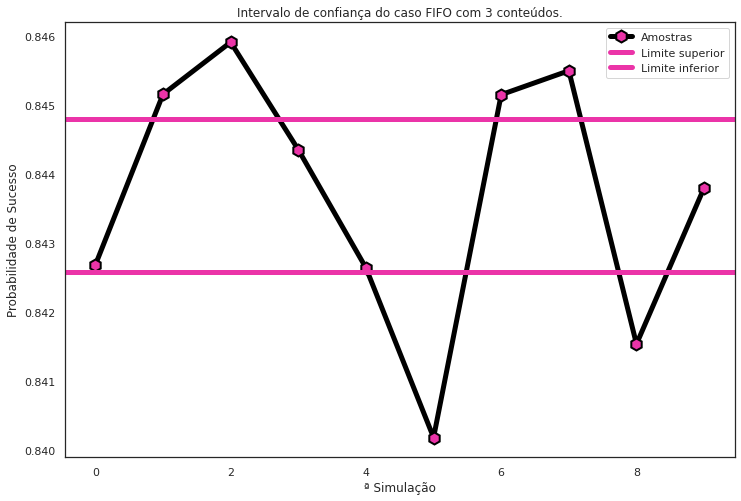

In [571]:
str_tipo = 'FIFO'
lim, sucessos = intervaloConfiancaFIFOC3
plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem = 3, cenario = 3)

### Caso LRU

In [572]:
intervaloConfiancaLRUC3 = intervaloDeConfianca(10,3 , "LRU", 3 ,2, [1/3,1/3,1/3], teta = math.inf)

Cenário: 3
Caso: LRU
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.8431556619052806
Intervalo de Confiança: [0.8417838437655552, 0.844527480045006]
-------- 



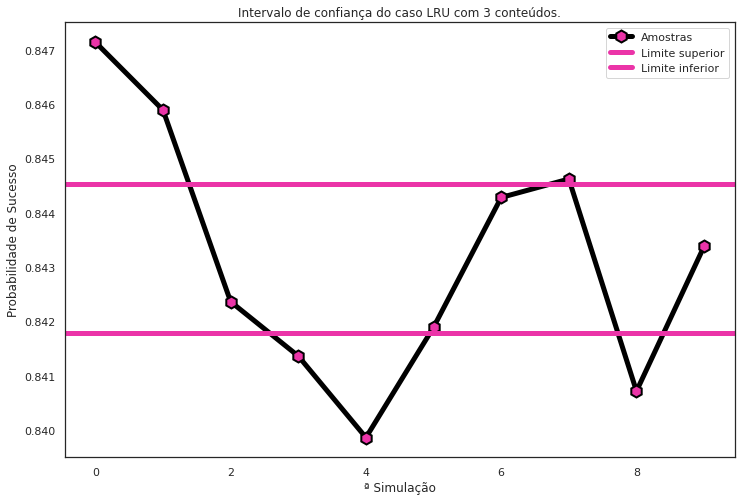

In [573]:
str_tipo = 'LRU'
tipo = 0
lim, sucessos = intervaloConfiancaLRUC3

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem = 3, cenario = 3)

### Caso Random

In [574]:
intervaloConfiancaRandomC3 = intervaloDeConfianca(10,3 , "Random", 3 ,2, [1/3,1/3,1/3], teta = math.inf)

Cenário: 3
Caso: Random
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.8440579298991426
Intervalo de Confiança: [0.8425437340537497, 0.8455721257445356]
-------- 



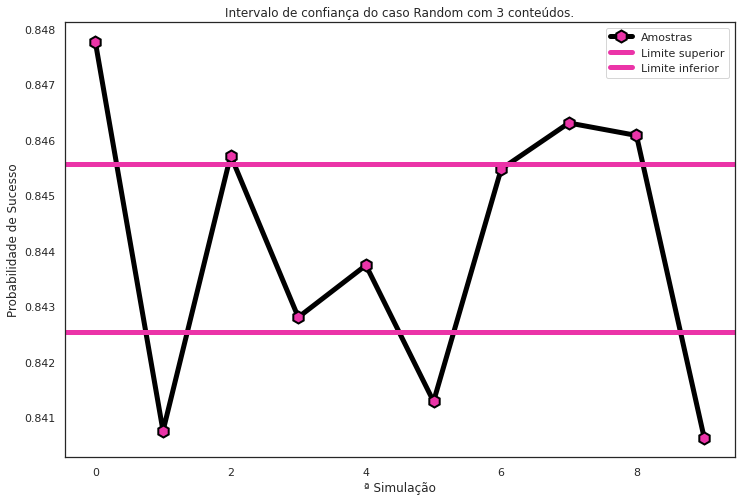

In [575]:
str_tipo = 'Random'
tipo = 0
lim, sucessos = intervaloConfiancaRandomC3
plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem = 3, cenario = 3)

### Caso Estática

#### Caches com mesmos conteúdos populares

In [576]:
intervaloConfiancaEstaticaIguaisC3 = intervaloDeConfianca(10,3 , "Estatica", 3 ,2, [1/3,1/3,1/3], teta = math.inf, cachesDiferentes = False)

Cenário: 3
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.8426882058111239
Intervalo de Confiança: [0.841938231410113, 0.8434381802121348]
-------- 



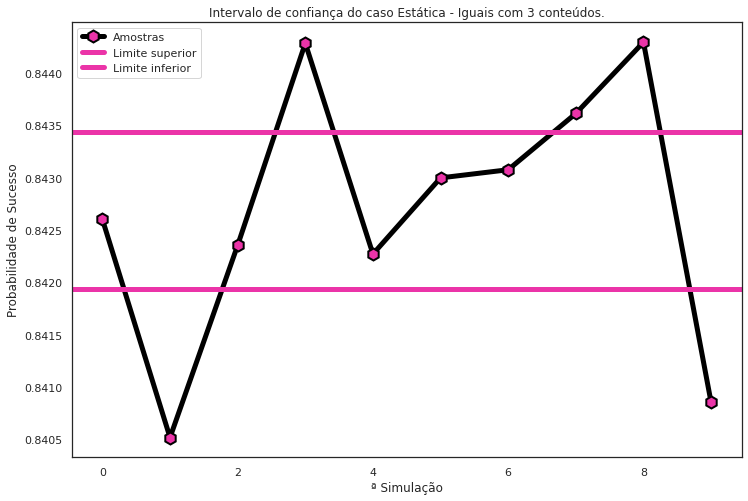

In [577]:
str_tipo = 'Estática - Iguais'
lim, sucessos = intervaloConfiancaEstaticaIguaisC3

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem = 3, cenario = 3)

#### Caches com conteúdos populares diferentes

In [578]:
intervaloConfiancaEstaticaDifC3 = intervaloDeConfianca(10,3 , "Estatica", 3 ,2, [1/3,1/3,1/3], teta = math.inf, cachesDiferentes = True)

Cenário: 3
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.8427177833765234
Intervalo de Confiança: [0.8408979068051184, 0.8445376599479283]
-------- 



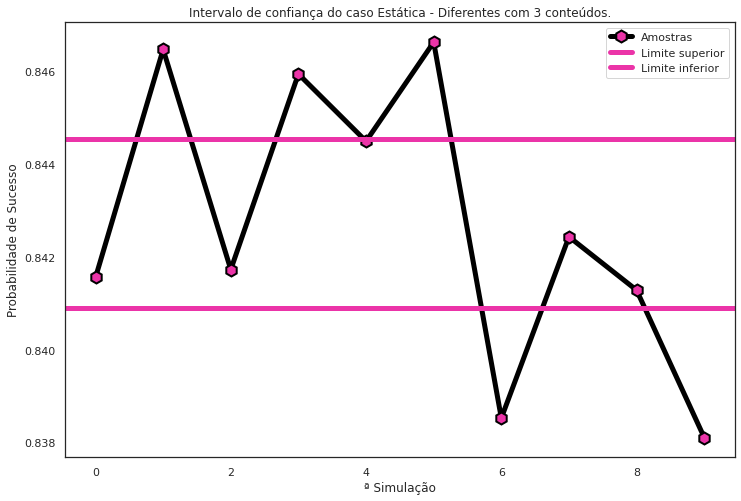

In [579]:
str_tipo = 'Estática - Diferentes'
tipo = 0
lim, sucessos = intervaloConfiancaEstaticaDifC3

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem = 3, cenario = 3)

# IV. Simulação Cenário IV

<h3> Parâmetros de entrada para a função

O cenário $IV$ utiliza o mesmo simulador que o cenário $III$ descrito acima, a única coisa que muda é que o parãmetro $theta$ recebe o número $1$ ao invés de $\infty$.
Dessa fora, a função utilizada para simular o cenário tem os seguintes parâmetros de entrada:

*   $numRequisicoes$ - Número de requisões que serão realizadas no experimento. Deve ser um número inteiro maior que $0$.
*   $caso$ - qual é o caso/tipo das caches. Os possíveis valores de entrada são: "FIFO", "LRU", "Random" ou "Estatica"
*   $numConteudos$ - número de conteúdos que podem ser requisitados. Deve ser um número inteiro maior que $0$.
*   $tamCache$ - tamanho das caches. Deve ser um número inteiro maior que $0$.
*   $probabilidades$ - probabilidade de cada conteúdo ser requisitado. Deve ser passado uma lista de tamanho igual ao número de conteúdos. Por exemplo, se são três conteúdos e possuem probabilidade de requisição uniforme, a lista passada deverá ser $[1/3,1/3,1/3]$
*   $p$ - probabildide de um canal falhar. Deve ser um float entre $0$ e $1$ e tem como default o valor $0.9$.
*   $teta$ - taxa de serviço do servidor à cache. Deve ser um inteiro maior do que $0$  e tem como default o valor $math.inf =1$.
*   $alpha$ - taxa de timeout para uma requisição. Deve ser um inteiro maior do que $0$  e tem como default o valor $1$.
*   $depurar$ - Booleano para indicar se deseja imprimir a depuração do código ou não. O default é o valor "False", onde não se depura.
*   $cachesDiferentes$ - Booleano para indicar se deseja que as caches comecem em estados diferentes ou iguais. O default é o valor "True", onde começam com em estados diferentes.


## Simulação dos casos com depuração

<h4> Abaixo são realizados testes onde são feitas 10 requisições apenas para fins de vizualizar a depuração do simulador para cado tipo de cache.

### Simulação caso FIFO

In [580]:
simulacaoCenario3_4(10,"FIFO", 3, 2 , [1/3,1/3,1/3], teta = 1, depurar = True)

[[1.0543625509849301, 2, 'SISTEMA', 'req1'], [2.5051180992621473, 3, 'SISTEMA', 'req2'], [6.188954049220115, 1, 'SISTEMA', 'req0']]


Evento: [1.0543625509849301, 2, 'SISTEMA', 'req1']

No tempo 1.0543625509849301 cliente faz requisição 'req1' do conteúdo 2

Timer req1 = 0.044621176100279776
Canal 1 funcionou! Requisição seguirá para a cache 1 e cherará em 0.01722272424148305 segundos
Canal 2 funcionou! Requisição seguirá para a cache 2 e cherará em 0.9688363129611662 segundos

Próximos eventos: [[1.0715852752264132, 2, 'CACHE1', 'req1'], [1.0989837270852099, 2, 'TIMEOUT_req1', 'req1'], [1.6676333224655535, 2, 'SISTEMA', 'req3'], [2.0231988639460963, 2, 'CACHE2', 'req1'], [2.5051180992621473, 3, 'SISTEMA', 'req2'], [6.188954049220115, 1, 'SISTEMA', 'req0']]
-------- 



Evento: [1.0715852752264132, 2, 'CACHE1', 'req1']

 No tempo 1.0715852752264132 a requisição 'req1 do conteúdo 2 chega na cache 1
Estado atual cache 1:[2, 3]
Cache possui requisição!
Cache permanece inalterada.
Requisiç

0.890831831197123

### Simulação caso LRU

In [581]:
simulacaoCenario3_4(10,"LRU", 3, 2 , [1/3,1/3,1/3], teta = 1, depurar = True)

[[0.44271055641823226, 1, 'SISTEMA', 'req0'], [5.575944808742241, 2, 'SISTEMA', 'req1'], [6.2722896045667245, 3, 'SISTEMA', 'req2']]


Evento: [0.44271055641823226, 1, 'SISTEMA', 'req0']

No tempo 0.44271055641823226 cliente faz requisição 'req0' do conteúdo 1

Timer req0 = 1.4946310984877083
Canal 1 funcionou! Requisição seguirá para a cache 1 e cherará em 0.03479943543651114 segundos
Canal 2 funcionou! Requisição seguirá para a cache 2 e cherará em 1.1263949902140566 segundos

Próximos eventos: [[0.4775099918547434, 1, 'CACHE1', 'req0'], [1.569105546632289, 1, 'CACHE2', 'req0'], [1.9373416549059406, 1, 'TIMEOUT_req0', 'req0'], [3.345524670089605, 1, 'SISTEMA', 'req3'], [5.575944808742241, 2, 'SISTEMA', 'req1'], [6.2722896045667245, 3, 'SISTEMA', 'req2']]
-------- 



Evento: [0.4775099918547434, 1, 'CACHE1', 'req0']

 No tempo 0.4775099918547434 a requisição 'req0 do conteúdo 1 chega na cache 1
Estado atual cache 1:[1, 3]
Cache possui requisição!
Conteúdo requisitado ficará na primei

0.9033441069683525

### Simulação caso Random

In [582]:
simulacaoCenario3_4(10,"Random", 3, 2 , [1/3,1/3,1/3], teta = 1, depurar = True)

[[0.49161907034309416, 3, 'SISTEMA', 'req2'], [2.063969359993866, 2, 'SISTEMA', 'req1'], [3.839689671282287, 1, 'SISTEMA', 'req0']]


Evento: [0.49161907034309416, 3, 'SISTEMA', 'req2']

No tempo 0.49161907034309416 cliente faz requisição 'req2' do conteúdo 3

Timer req2 = 0.06920138956733046
Canal 1 funcionou! Requisição seguirá para a cache 1 e cherará em 1.554929696118283 segundos
Canal 2 funcionou! Requisição seguirá para a cache 2 e cherará em 1.4919167890279583 segundos

Próximos eventos: [[0.5608204599104246, 3, 'TIMEOUT_req2', 'req2'], [1.9835358593710524, 3, 'CACHE2', 'req2'], [2.046548766461377, 3, 'CACHE1', 'req2'], [2.063969359993866, 2, 'SISTEMA', 'req1'], [3.839689671282287, 1, 'SISTEMA', 'req0'], [7.187225512996496, 3, 'SISTEMA', 'req3']]
-------- 



Evento: [0.5608204599104246, 3, 'TIMEOUT_req2', 'req2']

No tempo 0.5608204599104246 timeout para a requisição req2
Requisição seguirá para o Servidor Alternativo e voltará em 0.08396151370950067 segundos

Próximos eventos:

0.7240607374213852

### Simulações caso Estática 

#### 1º Caso - As caches possuem os mesmos conteúdos populares

In [583]:
simulacaoCenario3_4(10,"Estatica", 3, 2 , [1/3,1/3,1/3], teta = 1, depurar = True)

[[0.4113842483328999, 1, 'SISTEMA', 'req0'], [0.9785846179868849, 3, 'SISTEMA', 'req2'], [3.1340165952938337, 2, 'SISTEMA', 'req1']]


Evento: [0.4113842483328999, 1, 'SISTEMA', 'req0']

No tempo 0.4113842483328999 cliente faz requisição 'req0' do conteúdo 1

Timer req0 = 0.24870895919414493
Canal 1 funcionou! Requisição seguirá para a cache 1 e cherará em 0.1663268012727013 segundos
Canal 2 funcionou! Requisição seguirá para a cache 2 e cherará em 0.4986809029595934 segundos

Próximos eventos: [[0.5777110496056012, 1, 'CACHE1', 'req0'], [0.6600932075270448, 1, 'TIMEOUT_req0', 'req0'], [0.9100651512924933, 1, 'CACHE2', 'req0'], [0.9785846179868849, 3, 'SISTEMA', 'req2'], [2.5038301584606133, 1, 'SISTEMA', 'req3'], [3.1340165952938337, 2, 'SISTEMA', 'req1']]
-------- 



Evento: [0.5777110496056012, 1, 'CACHE1', 'req0']

 No tempo 0.5777110496056012 a requisição 'req0 do conteúdo 1 chega na cache 1
Estado atual cache 1:[3, 1]
Cache possui requisição!
Cache permanece inalterada.
Requisiç

0.6664906191908706

#### 2º Caso - As caches possuem conteúdos populares diferentes

In [584]:
simulacaoCenario3_4(10,"Estatica", 3, 2 , [1/3,1/3,1/3], teta = 1, depurar = True)

[[0.773756116704091, 3, 'SISTEMA', 'req2'], [1.015968302004987, 2, 'SISTEMA', 'req1'], [3.47233530603259, 1, 'SISTEMA', 'req0']]


Evento: [0.773756116704091, 3, 'SISTEMA', 'req2']

No tempo 0.773756116704091 cliente faz requisição 'req2' do conteúdo 3

Timer req2 = 0.1735661586606301
Canal 1 funcionou! Requisição seguirá para a cache 1 e cherará em 1.1045021097926848 segundos
Canal 2 funcionou! Requisição seguirá para a cache 2 e cherará em 0.28157970555101874 segundos

Próximos eventos: [[0.947322275364721, 3, 'TIMEOUT_req2', 'req2'], [1.015968302004987, 2, 'SISTEMA', 'req1'], [1.0553358222551097, 3, 'CACHE2', 'req2'], [1.3683980123779023, 3, 'SISTEMA', 'req3'], [1.8782582264967758, 3, 'CACHE1', 'req2'], [3.47233530603259, 1, 'SISTEMA', 'req0']]
-------- 



Evento: [0.947322275364721, 3, 'TIMEOUT_req2', 'req2']

No tempo 0.947322275364721 timeout para a requisição req2
Requisição seguirá para o Servidor Alternativo e voltará em 0.17023991402764063 segundos

Próximos eventos: [[1.015

0.7056055372456699

## Intervalos de Confiança para cada Caso

<h4> Abaixo é calculado o intervalo de confiança para cada caso. O intervalo é calculado pela função auxiliar "intervaloDeConfianca" em que se realiza 10 simulações onde em cada simulação são feitas 100000 requisições. Os limites inferiores e superiorers do intervalo são obtidos da seguinte maneira:

$limite\ inferior = (media\ dos\ resultados\ das\ simulacoes\ - 1.96*desvio\ padrao\ dos\ resultados\ das\ simulacoes)/ \ raiz\ quadrada\ do\ numero\ de\ simulacoes$

$limite\ superior\ = (media\ dos\ resultados\ das\ simulacoes\ + 1.96*desvio\ padrao\ dos\ resultados\ das\ simulações)/ \ raiz\ quadrada\ do\ numero\ de\ simulacoes$

### Caso FIFO

In [585]:
intervaloConfiancaFIFOC4 = intervaloDeConfianca(10,4, "FIFO", 3 ,2, [1/3,1/3,1/3], teta = 1)

Cenário: 4
Caso: FIFO
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.9206182858390541
Intervalo de Confiança: [0.9173407649557344, 0.9238958067223739]
-------- 



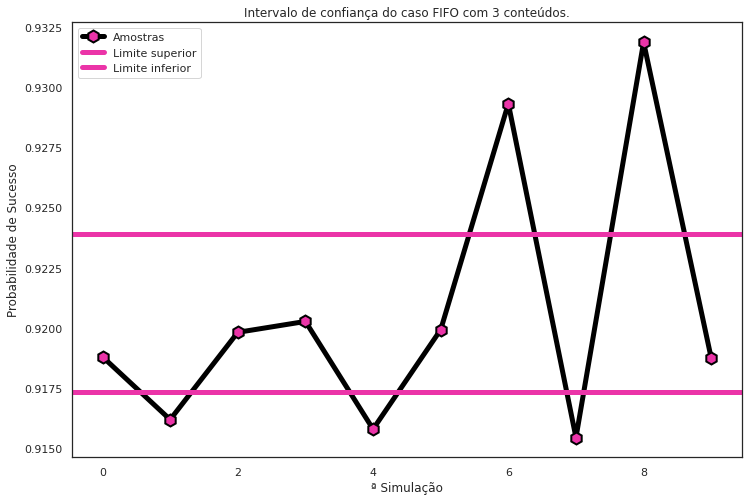

In [586]:
str_tipo = 'FIFO'
lim, sucessos = intervaloConfiancaFIFOC4
plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem = 3, cenario = 4)

### Caso LRU

In [587]:
intervaloConfiancaLRUC4 = intervaloDeConfianca(10,3 , "LRU", 3 ,2, [1/3,1/3,1/3], teta = 1)

Cenário: 3
Caso: LRU
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.9184946880355159
Intervalo de Confiança: [0.9160987586576833, 0.9208906174133485]
-------- 



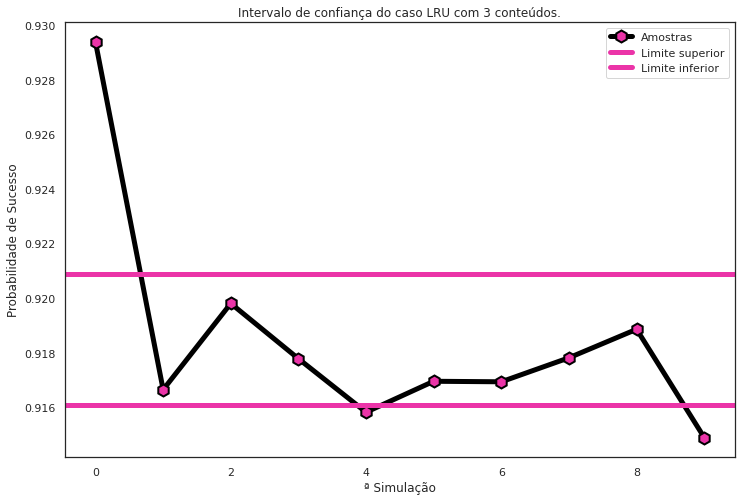

In [588]:
str_tipo = 'LRU'
lim, sucessos = intervaloConfiancaLRUC4
plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem = 3, cenario = 4)

### Caso Random

In [589]:
intervaloConfiancaRandomC4 = intervaloDeConfianca(10,3 , "Random", 3 ,2, [1/3,1/3,1/3], teta = 1)

Cenário: 3
Caso: Random
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.918948744984138
Intervalo de Confiança: [0.9174168219736377, 0.9204806679946383]
-------- 



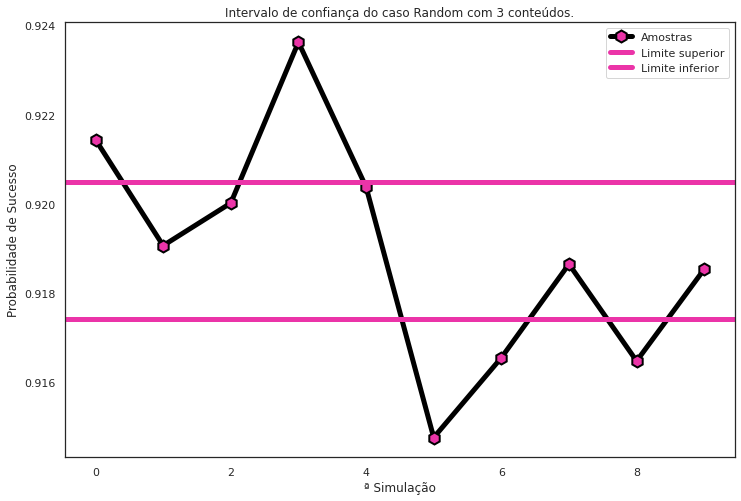

In [590]:
str_tipo = 'Random'
lim, sucessos = intervaloConfiancaRandomC4
plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem = 3, cenario = 4)

### Caso Estática

#### Caches com mesmos conteúdos populares

In [591]:
intervaloConfiancaEstaticaC4_1 = intervaloDeConfianca(10,4 , "Estatica", 3 ,2, [1/3,1/3,1/3], teta = 1, cachesDiferentes = False)

Cenário: 4
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.9204178632116801
Intervalo de Confiança: [0.9170087367285058, 0.9238269896948543]
-------- 



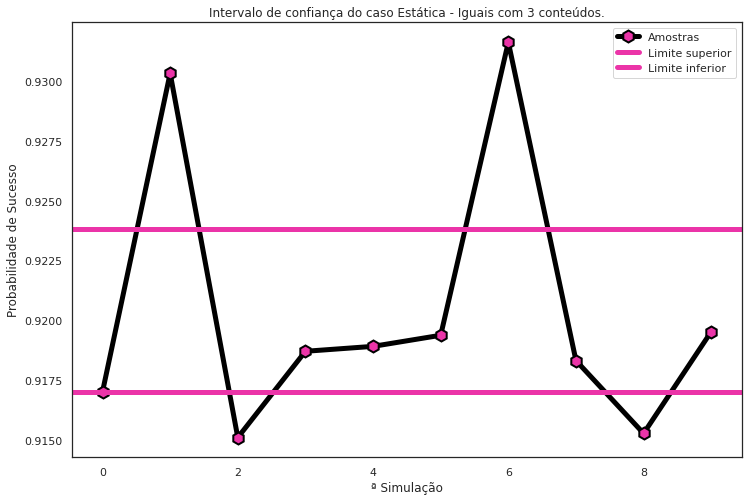

In [592]:
str_tipo = 'Estática - Iguais'
lim, sucessos = intervaloConfiancaEstaticaC4_1
plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem = 3, cenario = 4)

#### Caches com conteúdos populares diferentes

In [593]:
intervaloConfiancaEstaticaC4_2 = intervaloDeConfianca(10,4 , "Estatica", 3 ,2, [1/3,1/3,1/3], teta = 1, cachesDiferentes = True)

Cenário: 4
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.9245521839208427
Intervalo de Confiança: [0.9207268698912819, 0.9283774979504035]
-------- 



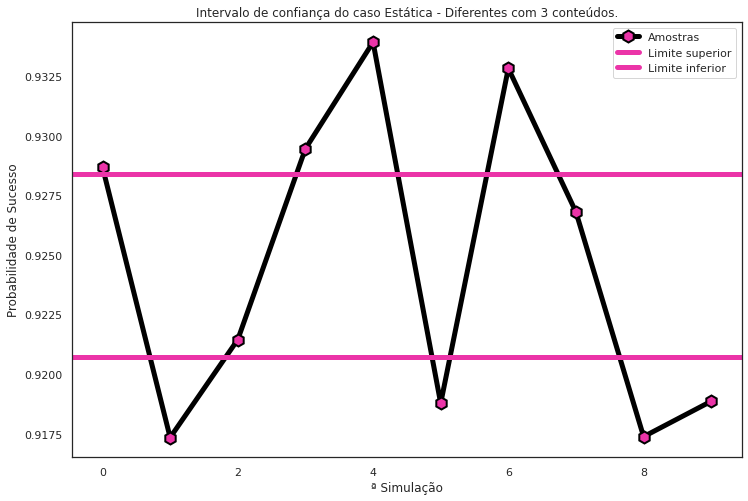

In [594]:
str_tipo = 'Estática - Diferentes'
lim, sucessos = intervaloConfiancaEstaticaC4_2
plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem = 3, cenario = 4)

# V. Simulações Cenários Adicionais

<h2> Variação do $\alpha$.

Este cenário dicional utiliza o mesmo simulador que o cenário $III$ descrito acima. Exploraremos possíveis mudanças do parâmetro.

## Simulação dos casos com depuração

<h4> Abaixo executaremos a simulação, já com o intervalo de segurança, para os casos com o alfa mínimo e máximo.

### Caso FIFO

In [595]:
inter = intervaloDeConfianca(10,5, "FIFO", 3 ,2, [1/3,1/3,1/3], alpha = 0.000000000001, teta = 1)
inter = intervaloDeConfianca(10,5, "FIFO", 3 ,2, [1/3,1/3,1/3], alpha = math.inf, teta = 1)

Cenário: 5
Caso: FIFO
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 1.258031703139402
Intervalo de Confiança: [1.2467557302989902, 1.2693076759798136]
-------- 

Cenário: 5
Caso: FIFO
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.5934394757341059
Intervalo de Confiança: [0.5920813119706094, 0.5947976394976024]
-------- 



### Caso LRU

In [596]:
inter = intervaloDeConfianca(10,5 , "LRU", 3 ,2, [1/3,1/3,1/3], alpha = 0.000000000001, teta = 1)
inter = intervaloDeConfianca(10,5 , "LRU", 3 ,2, [1/3,1/3,1/3], alpha = math.inf, teta = 1)

Cenário: 5
Caso: LRU
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 1.2490674951637062
Intervalo de Confiança: [1.2414750876388971, 1.2566599026885152]
-------- 

Cenário: 5
Caso: LRU
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.5937334505760501
Intervalo de Confiança: [0.5923241583871492, 0.5951427427649509]
-------- 



### Caso Random

In [597]:
inter = intervaloDeConfianca(10,5 , "Random", 3 ,2, [1/3,1/3,1/3], alpha = 0.000000000001, teta = 1)
inter = intervaloDeConfianca(10,5 , "Random", 3 ,2, [1/3,1/3,1/3], alpha = math.inf, teta = 1)

Cenário: 5
Caso: Random
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 1.2538584610979968
Intervalo de Confiança: [1.243351066995942, 1.2643658552000516]
-------- 

Cenário: 5
Caso: Random
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.5934503743008206
Intervalo de Confiança: [0.5918577015376217, 0.5950430470640194]
-------- 



### Caso Estática

#### Caches com mesmos conteúdos populares

In [598]:
inter = intervaloDeConfianca(10,5 , "Estatica", 3 ,2, [1/3,1/3,1/3], alpha = 0.000000000001, teta = 1, cachesDiferentes = False)
inter = intervaloDeConfianca(10,5 , "Random", 3 ,2, [1/3,1/3,1/3], alpha = math.inf, teta = 1)

Cenário: 5
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 1.251764643227974
Intervalo de Confiança: [1.243491829127894, 1.2600374573280542]
-------- 

Cenário: 5
Caso: Random
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.5941657405554382
Intervalo de Confiança: [0.5931770387176503, 0.5951544423932262]
-------- 



#### Caches com conteúdos populares diferentes

In [599]:
inter = intervaloDeConfianca(10,5 , "Estatica", 3 ,2, [1/3,1/3,1/3], alpha = 0.000000000001, teta = 1, cachesDiferentes = True)
inter = intervaloDeConfianca(10,5 , "Estatica", 3 ,2, [1/3,1/3,1/3], alpha = math.inf, teta = 1, cachesDiferentes = True)

Cenário: 5
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 1.2529419483820052
Intervalo de Confiança: [1.2428535431777683, 1.2630303535862422]
-------- 

Cenário: 5
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.593261792158599
Intervalo de Confiança: [0.5922858329956484, 0.5942377513215495]
-------- 



Entendemos que o valor ótimo do timeout ($\alpha$), pelo menos em termos de rapidez em que as requisições são servidas, é o mais alto possível. Experimentamos fazê-lo valendo $\infty$ e 0.000000000001 para perceber este comportamento. Nosso timer tem média $1/\alpha$, e assim, o timer valerá 0 e $\infty$, respectivamente.

O timer valer 0 implica que necessariamente a requisição será servida pelo servidor alternativo, com um tempo de ida e volta exponencialmente distribuído com média 1, nesse caso, pois temos $1/\gamma$, com $\gamma$ = 1. O que é certamente melhor do que ele gastar o mesmo tempo para ir a uma cache, mais o mesmo tempo para voltar ($1/\mu$, com $\mu$ = 1), e ainda possivelmente a cache ter que acessar um servidor por não ter o conteúdo, também gastando de ida e volta o mesmo tempo ($1/\theta$, com $\theta$ = 1).

<h2> Variação do $p$.

Este cenário adicional utiliza o mesmo simulador que o cenário $II$. Exploraremos possíveis mudanças do parâmetro $p$, que representa a probabilidade de um canal não falhar.

In [600]:
inter = intervaloDeConfianca(10,2, "FIFO", 3 ,2, [1/3,1/3,1/3])
inter = intervaloDeConfianca(10,2, "FIFO", 3 ,2, [1/3,1/3,1/3], p = 0.5)
inter = intervaloDeConfianca(10,2, "FIFO", 3 ,2, [1/3,1/3,1/3], p = 0.2)

Cenário: 2
Caso: FIFO
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.26413699999999996
Intervalo de Confiança: [0.24538483317496984, 0.28288916682503007]
-------- 

Cenário: 2
Caso: FIFO
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.264589
Intervalo de Confiança: [0.2448715047316897, 0.28430649526831037]
-------- 

Cenário: 2
Caso: FIFO
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.258064
Intervalo de Confiança: [0.23899342154373288, 0.27713457845626716]
-------- 



In [601]:
inter = intervaloDeConfianca(10,2, "LRU", 3 ,2, [1/3,1/3,1/3])
inter = intervaloDeConfianca(10,2, "LRU", 3 ,2, [1/3,1/3,1/3], p = 0.5)
inter = intervaloDeConfianca(10,2, "LRU", 3 ,2, [1/3,1/3,1/3], p = 0.2)

Cenário: 2
Caso: LRU
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.30053599999999997
Intervalo de Confiança: [0.2996526673356883, 0.30141933266431165]
-------- 

Cenário: 2
Caso: LRU
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.300825
Intervalo de Confiança: [0.30020932128833294, 0.3014406787116671]
-------- 

Cenário: 2
Caso: LRU
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.300528
Intervalo de Confiança: [0.29983057702521354, 0.3012254229747865]
-------- 



In [602]:
inter = intervaloDeConfianca(10,2, "Random", 3 ,2, [1/3,1/3,1/3])
inter = intervaloDeConfianca(10,2, "Random", 3, 2, [1/3,1/3,1/3], p = 0.5)
inter = intervaloDeConfianca(10,2, "Random", 3 ,2, [1/3,1/3,1/3], p = 0.2)

Cenário: 2
Caso: Random
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.23420999999999997
Intervalo de Confiança: [0.2336340267283979, 0.23478597327160206]
-------- 

Cenário: 2
Caso: Random
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.23342200000000002
Intervalo de Confiança: [0.23278262648963224, 0.2340613735103678]
-------- 

Cenário: 2
Caso: Random
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.23319799999999996
Intervalo de Confiança: [0.23244609638106997, 0.23394990361892995]
-------- 



### Caso Estática

#### Caches com mesmos conteúdos populares

In [603]:
inter = intervaloDeConfianca(10,2, "Estatica", 3 ,2, [1/3,1/3,1/3], cachesDiferentes = False)
inter = intervaloDeConfianca(10,2, "Estatica", 3 ,2, [1/3,1/3,1/3], p = 0.5, cachesDiferentes = False)
inter = intervaloDeConfianca(10,2, "Estatica", 3 ,2, [1/3,1/3,1/3], p = 0.2, cachesDiferentes = False)

Cenário: 2
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.339835
Intervalo de Confiança: [0.339194405250724, 0.340475594749276]
-------- 

Cenário: 2
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.33995200000000003
Intervalo de Confiança: [0.3392889067690287, 0.3406150932309714]
-------- 

Cenário: 2
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.340236
Intervalo de Confiança: [0.33939374168105024, 0.3410782583189497]
-------- 



#### Caches com conteúdos populares diferentes

In [604]:
inter = intervaloDeConfianca(10,2, "Estatica", 3 ,2, [1/3,1/3,1/3], cachesDiferentes = True)
inter = intervaloDeConfianca(10,2, "Estatica", 3 ,2, [1/3,1/3,1/3], p = 0.5, cachesDiferentes = True)
inter = intervaloDeConfianca(10,2, "Estatica", 3 ,2, [1/3,1/3,1/3], p = 0.2, cachesDiferentes = True)

Cenário: 2
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.069941
Intervalo de Confiança: [0.06938627186781271, 0.0704957281321873]
-------- 

Cenário: 2
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.070213
Intervalo de Confiança: [0.06998186870882547, 0.07044413129117452]
-------- 

Cenário: 2
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Média: 0.07058400000000001
Intervalo de Confiança: [0.07002347289607014, 0.07114452710392988]
-------- 



Conseguimos enxergar que nesse caso, alterar as probabilidades do canal funcionar não causam muito impacto. Isso se dá ao fato de que essas probabilidades são relativas a apenas um canal. A outra cache ainda pode servir.
Além disso, todos os parâmetros estão setados como o default, que é 1.

## Correlação

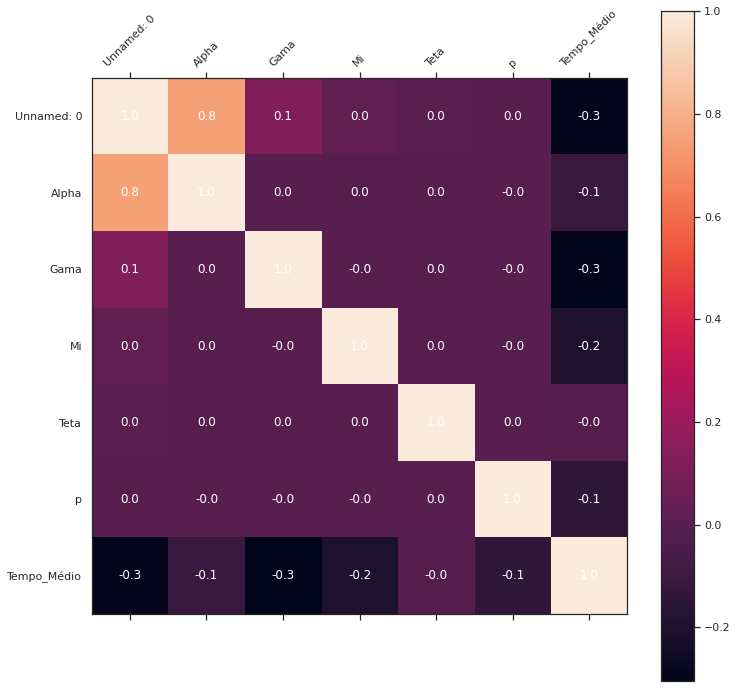

In [605]:
simulacoesCenario3_4 =  pd.read_excel("https://github.com/siliconemonster/AD-TrabalhoFinal/raw/main/SimulacoesCenario3_4.xlsx")
datasetNumerico = simulacoesCenario3_4
rcParams['figure.figsize'] = 12, 12
sns.set_theme(style="white")
plt.matshow(datasetNumerico.corr())
plt.colorbar()
plt.xticks(np.arange(len(datasetNumerico.corr().columns)), datasetNumerico.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(datasetNumerico.corr().columns)), datasetNumerico.corr().columns.values) 
for (i, j), corr in np.ndenumerate(datasetNumerico.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=12)

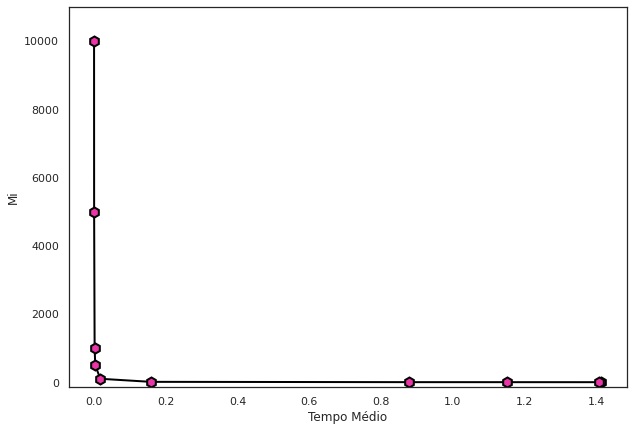

In [606]:
analiseCenario3_4Mi = analiseCenario3_4(possiveismi = [0.05,0.1,0.5,1,10,100,500,1000,5000,10000])
plotAnaliseCenario3_4Separados(analiseCenario3_4Mi, "Mi")

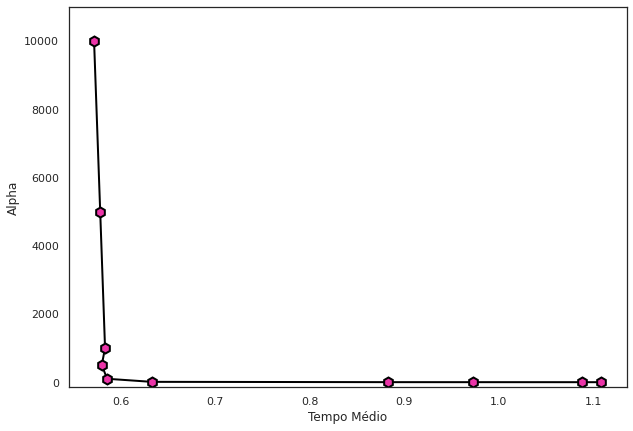

In [607]:
analiseCenario3_4Alpha = analiseCenario3_4(possiveisalpha = [0.05,0.1,0.5,1,10,100,500,1000,5000,10000])
plotAnaliseCenario3_4Separados(analiseCenario3_4Alpha, "Alpha")

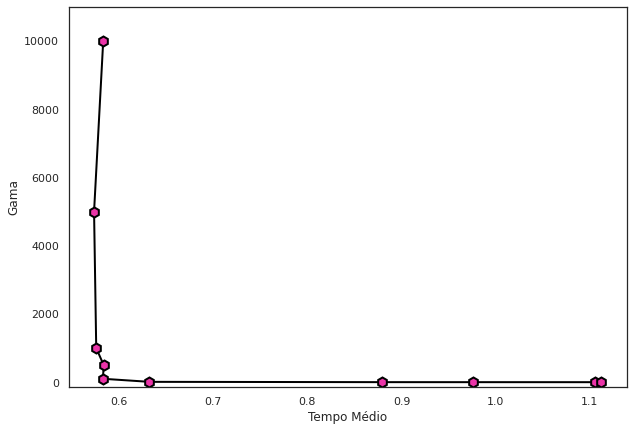

In [608]:
analiseCenario3_4Gama = analiseCenario3_4(possiveisgama = [0.05,0.1,0.5,1,10,100,500,1000,5000,10000])
plotAnaliseCenario3_4Separados(analiseCenario3_4Gama, "Gama")

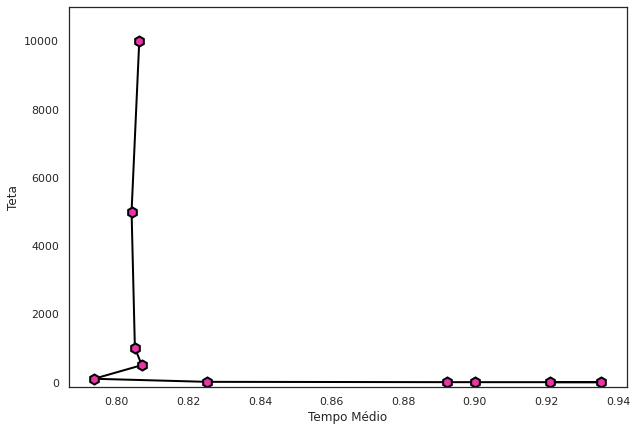

In [609]:
analiseCenario3_4Teta = analiseCenario3_4(possiveisteta=  [0.05,0.1,0.5,1,10,100,500,1000,5000,10000])
plotAnaliseCenario3_4Separados(analiseCenario3_4Teta, "Teta")

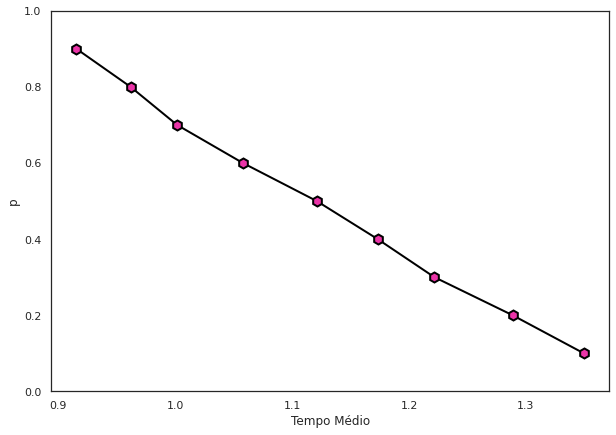

In [610]:
analiseCenario3_4p = analiseCenario3_4(possiveisp =  [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plotAnaliseCenario3_4Separados(analiseCenario3_4p, "p")

# VI. Parte Analítica

## Cenário 1



Determinamos matrizes de transição dos tipos FIFO, LRU e Random para realizar as nossas análises por cadeias de Markov.<br>
Não ocorre de haver dois conteúdos iguais em uma mesma cache, então nunca teremos os estados AA, BB ou CC. Com isso, a matriz FIFO e a matriz LRU possuem os estados AB, AC, BA, BC, CA e CB. Já a matriz Random e a matriz Estática possuem os estados AB, AC e BC. No caso da Random, como o conteúdo é removido aleatoriamente, não importa a ordem, por exemplo se é AB ou BA, e por isso temos apenas esses 3 estados. E no caso da estática, por ela sempre armazenar os conteúdos mais populares e nunca mudar, a ordem também não importa.

Aqui calcularemos a probabilidade de sucesso utilizando cadeias de Markov para comprovar analíticamente o que fizemos na simulação.

### Funções

In [611]:
# Função que gera a mtriz de transição para os casos FIFO, LRU e Estática
def GeraMatrizTransicao(conteudos, tipo, depurar = False):

  estadosCache = list(permutations(conteudos, 2))
  estadosCache
  estadosCacheS = list(combinations_with_replacement(estadosCache, 2))
  numconteudos = (len(conteudos))

  pares = []

  for i in range (len(estadosCacheS)):
    estado = [''.join(ele) for ele in estadosCacheS[i]]
    indice = estado[0] + estado[1]
    pares.append(indice)  

  matriz = {}
  numColunas = len(pares)
  linha = np.zeros((1, numColunas), dtype=int)
  linha = list(linha[0])
  matrizArray = []

  for i in range(len(pares)):

    cache1 = []
    cache2 = []

    indice = pares[i]

    cache1.append(indice[0])
    cache1.append(indice[1])
    cache2.append(indice[2])
    cache2.append(indice[3])

    matriz[indice] = linha.copy()


    for conteudo in conteudos:

      c1_transicaopraEstado, tinhaConteudo = cacheReceivesReq(tipo, cache1,conteudo, depurar = False)
      c2_transicaopraEstado, tinhaConteudo = cacheReceivesReq(tipo, cache2,conteudo, depurar = False)

      novoEstadoOp1 = c1_transicaopraEstado[0]+c1_transicaopraEstado[1] + c2_transicaopraEstado[0] + c2_transicaopraEstado[1]
      novoEstadoOp2 = c2_transicaopraEstado[0] + c2_transicaopraEstado[1] + c1_transicaopraEstado[0] + c1_transicaopraEstado[1] 
   


      try:        
        index = pares.index(novoEstadoOp1)

      except:
        index = pares.index(novoEstadoOp2)    

      matriz[indice][index] = matriz[indice][index] +  Fraction(1,numconteudos)

    matrizArray.append(matriz[indice])

  matrizTransicao = Matrix(matrizArray)
  estados = [[el] for el in pares]
  if (depurar): 
    print("A matriz de transição do caso " + str(tipo) + " é:")
    print(matrizTransicao)
    print("E seus estados são:")
    print(estados)
    print()
  return matrizTransicao, estados

In [612]:
# Função para calcular a distribuição estacionária de uma cadeia de Markov por meio de uma matriz de transição P
def dist_estacionaria(P):
  evals, evecs = np.linalg.eig(P.T) #We have to transpose so that Markov transitions correspond to right multiplying by a column vector.  np.linalg.eig finds right eigenvectors.
  evec1 = evecs[:,np.isclose(evals, 1)]
  evec1 = evec1[:,0]
  stationary = evec1 / evec1.sum()
  stationary = stationary.real # parte real (acha autovalores e autovetores complexos)

  #print(stationary)
  return stationary

In [613]:
# Função para transformar a distribuição estacionária em uma tupla
def forma_tupla(P, depurar = False):
  estacionaria_nomes = copy.deepcopy(estados)
  if (depurar): print("Os estados são: " + str(estacionaria_nomes))
  estacionaria_valores = dist_estacionaria(P)
  if (depurar): print("Os valores são: " + str(estacionaria_valores))

  for i in range (len(estacionaria_valores)):
    estacionaria_nomes[i].append(estacionaria_valores[i])
    if (depurar): print(estacionaria_nomes)

  print("A distribuição estacionária é dada por: " + str(estacionaria_nomes))
  return estacionaria_nomes

In [614]:
# Função para calcular a probabilidade de sucesso em uma matriz de transição
# ATENÇÃO: Pode representar tanto uma cache quanto duas, depende de qual matriz
# for passada. No caso de uma matriz relativa a apenas 1 cache, é necessário 
# executar a função sucesso_unindo_matrizes() para calcular o total.

def sucesso_uma_matriz(P, depurar = False):
  estacionaria = forma_tupla(P, depurar)
  sucesso = 0
  for i in range(len(prob)):
    for j in range(len(estacionaria)):
      
      if (prob[i][0] in estacionaria[j][0]):
        #if (depurar): print("\nPi_" + str(estacionaria[j][0])+" * P(" + str(prob[i][0]) + ")")
        #if (depurar): print(str(estacionaria[j][1])+" * " + str(prob[i][1]))
        sucesso = sucesso + (prob[i][1]*estacionaria[j][1])
        #if (depurar): print("Sucesso: " + str(sucesso))
  
  print(sucesso)
  return sucesso

In [615]:
# Função para calcular sucesso em ambas as caches, quando a matriz for relativa
# a uma única cache

def sucesso_unindo_matrizes(P, depurar = False):
  sucesso = 0
  falha_uma = 0
  sucesso_uma = sucesso_uma_matriz(P, depurar)
  falha_uma = 1 - sucesso_uma

  # Stot = S*S + S*F (OU A ORDEM IMPORTA??? 2*S*F???)
  sucesso = sucesso_uma * sucesso_uma + sucesso_uma * falha_uma
  falha = 1 - sucesso
  print("A probabilidade de sucesso unindo as duas matrizes é de " + str(sucesso))
  return sucesso

### Casos com 3 conteúdos

In [616]:
# declaração das probabilidades de sair cada tipo de requisção
prob = [["A", 1/3], ["B", 1/3], ["C", 1/3]]

###Matrizes de transição representando apenas uma cache

#### FIFO

In [617]:
# Caso FIFO
estados = [["AB"], ["AC"], ["BA"], ["BC"], ["CA"], ["CB"]] 
markovCasoFIFO = np.array([[2/3, 0, 0, 0, 1/3, 0], 
                           [0, 2/3, 1/3, 0, 0, 0],
                           [0, 0, 2/3, 0, 0, 1/3],
                           [1/3, 0, 0, 2/3, 0, 0],
                           [0, 0, 0, 1/3, 2/3, 0],
                           [0, 1/3, 0, 0, 0, 2/3]])

sucesso_unindo_matrizes(markovCasoFIFO)

A distribuição estacionária é dada por: [['AB', 0.3333333333333337], ['AC', 0.0], ['BA', 0.0], ['BC', 0.33333333333333337], ['CA', 0.3333333333333329], ['CB', 0.0]]
0.6666666666666666
A probabilidade de sucesso unindo as duas matrizes é de 0.6666666666666666


0.6666666666666666

#### LRU

In [618]:
# Caso LRU
estados = [["AB"], ["AC"], ["BA"], ["BC"], ["CA"], ["CB"]]
markovCasoLRU  = np.array([[1/3, 0, 1/3, 0, 1/3, 0], 
                           [0, 1/3, 1/3, 0, 1/3, 0],
                           [1/3, 0, 1/3, 0, 0, 1/3],
                           [1/3, 0, 0, 1/3, 0, 1/3],
                           [0, 1/3, 0, 1/3, 1/3, 0],
                           [0, 1/3, 0, 1/3, 0, 1/3]])

sucesso_unindo_matrizes(markovCasoLRU)

A distribuição estacionária é dada por: [['AB', 0.16666666666666674], ['AC', 0.1666666666666666], ['BA', 0.16666666666666674], ['BC', 0.1666666666666666], ['CA', 0.16666666666666674], ['CB', 0.1666666666666666]]
0.6666666666666667
A probabilidade de sucesso unindo as duas matrizes é de 0.6666666666666667


0.6666666666666667

#### Estática

In [619]:
# Caso Estático
estados = [["AB"], ["AC"], ["BC"]]
markovCasoEstatico  = np.array([[1, 0, 0], 
                                [0, 1, 0],
                                [0, 0, 1]])

sucesso_uma_matriz(markovCasoEstatico)
# o motivo de calcularmos o sucesso de apenas uma é que como as caches começam
# iguais, e não há mudanças no meio do caminho. Por esse motivo, utilizamos a 
# função sucesso_uma_matriz()

A distribuição estacionária é dada por: [['AB', 1.0], ['AC', 0.0], ['BC', 0.0]]
0.6666666666666666


0.6666666666666666

###Matrizes de transição representando duas caches

#### FIFO

In [620]:
# Caso FIFO
matrizFIFO_3, estados = GeraMatrizTransicao(["A","B","C"],"FIFO")
matrizFIFO_3 = np.array(matrizFIFO_3, dtype='float')

fifo1_3 = sucesso_uma_matriz(matrizFIFO_3)

A distribuição estacionária é dada por: [['ABAB', 0.3333333333333337], ['ABAC', 0.0], ['ABBA', 0.0], ['ABBC', 0.0], ['ABCA', 0.0], ['ABCB', 0.0], ['ACAC', 0.0], ['ACBA', 0.0], ['ACBC', 0.0], ['ACCA', 0.0], ['ACCB', 0.0], ['BABA', 0.0], ['BABC', 0.0], ['BACA', 0.0], ['BACB', 0.0], ['BCBC', 0.33333333333333337], ['BCCA', 0.0], ['BCCB', 0.0], ['CACA', 0.3333333333333329], ['CACB', 0.0], ['CBCB', 0.0]]
0.6666666666666666


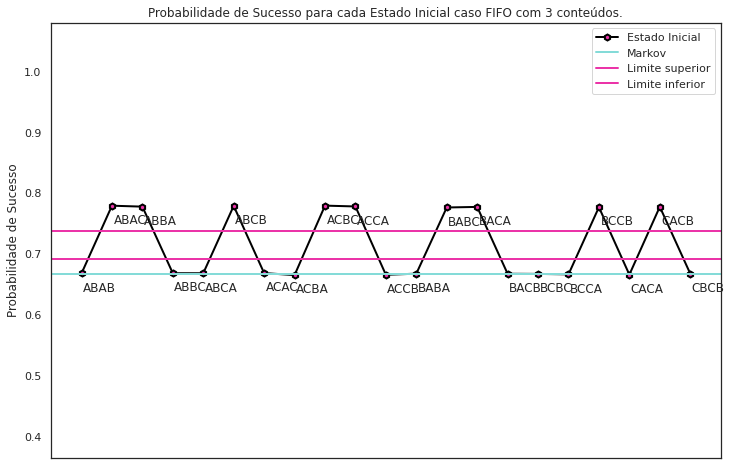

In [621]:
dataFIFO, estadosIniciais  = analiseEstadoInicial("FIFO", ["A","B","C"],3,2, [1/3,1/3,1/3], cenario = 1)
plotarAnaliseEstadoInicial(dataFIFO, "FIFO", 3, fifo1_3, 1, estadosIniciais)

#### LRU

In [622]:
# Caso LRU
matrizLRU_3, estados = GeraMatrizTransicao(["A","B","C"],"LRU")
matrizLRU_3 = np.array(matrizLRU_3, dtype='float')

lru1_3 = sucesso_uma_matriz(matrizLRU_3)

A distribuição estacionária é dada por: [['ABAB', 0.16666666666666674], ['ABAC', 0.0], ['ABBA', 0.0], ['ABBC', 0.0], ['ABCA', 0.0], ['ABCB', 0.0], ['ACAC', 0.1666666666666666], ['ACBA', 0.0], ['ACBC', 0.0], ['ACCA', 0.0], ['ACCB', 0.0], ['BABA', 0.16666666666666674], ['BABC', 0.0], ['BACA', 0.0], ['BACB', 0.0], ['BCBC', 0.1666666666666666], ['BCCA', 0.0], ['BCCB', 0.0], ['CACA', 0.16666666666666674], ['CACB', 0.0], ['CBCB', 0.1666666666666666]]
0.6666666666666667


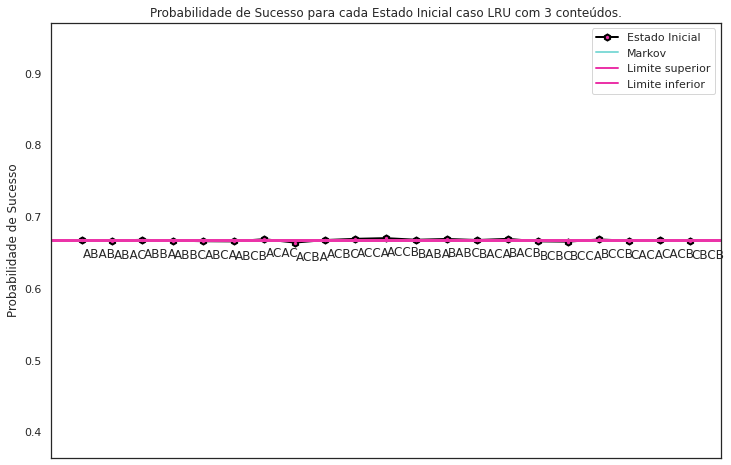

In [623]:
dataLRU, estadosIniciais  = analiseEstadoInicial("LRU", ["A","B","C"],3,2, [1/3,1/3,1/3], cenario = 1)
plotarAnaliseEstadoInicial(dataLRU, "LRU", 3, lru1_3, 1, estadosIniciais, )

#### Random

In [624]:
# Caso Random: nossa função de gerar matrizes não funciona para
# este caso, então a escrevemos manualmente

estados = [["ABAB"], ["ABBC"], ["ABCA"], ["BCBC"], ["BCCA"], ["CACA"]]
matrizRandom_3 = np.array([[2/3, 0, 0, 1/12, 1/6, 1/12],
                           [1/6, 1/3, 1/6, 1/6, 1/6, 0],
                           [1/6, 1/6, 1/3, 0, 1/6, 1/6],
                           [1/12, 0, 1/6, 2/3, 0, 1/12],
                           [0, 1/6, 1/6, 1/6, 1/3, 1/6],
                           [1/12, 0, 1/6, 1/12, 0, 2/3]])

random1_3 = sucesso_uma_matriz(matrizRandom_3)

A distribuição estacionária é dada por: [['ABAB', 0.22222222222222224], ['ABBC', 0.0666666666666666], ['ABCA', 0.1555555555555556], ['BCBC', 0.2044444444444445], ['BCCA', 0.11111111111111102], ['CACA', 0.2400000000000001]]
0.7777777777777778


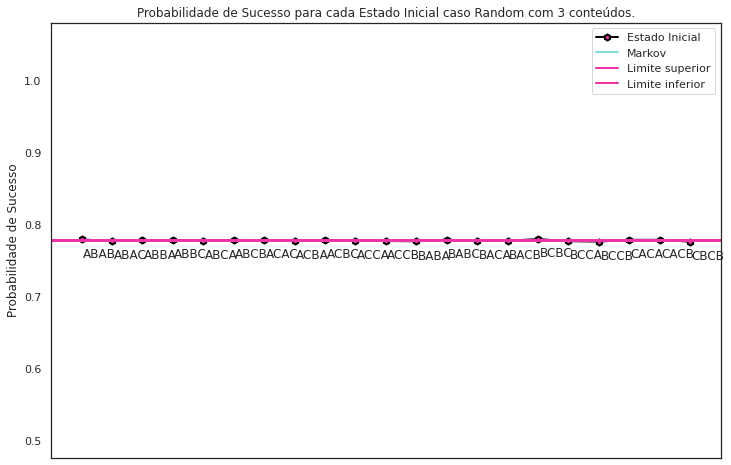

In [625]:
dataRandom,  estadosIniciais  = analiseEstadoInicial("Random", ["A","B","C"],3,2, [1/3,1/3,1/3], cenario = 1)
plotarAnaliseEstadoInicial(dataRandom, "Random", 3, random1_3, 1, estadosIniciais)

#### Estática

In [626]:
# Caso Estático
matrizEstatico_3, estados = GeraMatrizTransicao(["A","B","C"],"Estatico")
matrizEstatico_3 = np.array(matrizEstatico_3, dtype='float')

estatico1_3 = sucesso_uma_matriz(matrizEstatico_3)

A distribuição estacionária é dada por: [['ABAB', 1.0], ['ABAC', 0.0], ['ABBA', 0.0], ['ABBC', 0.0], ['ABCA', 0.0], ['ABCB', 0.0], ['ACAC', 0.0], ['ACBA', 0.0], ['ACBC', 0.0], ['ACCA', 0.0], ['ACCB', 0.0], ['BABA', 0.0], ['BABC', 0.0], ['BACA', 0.0], ['BACB', 0.0], ['BCBC', 0.0], ['BCCA', 0.0], ['BCCB', 0.0], ['CACA', 0.0], ['CACB', 0.0], ['CBCB', 0.0]]
0.6666666666666666


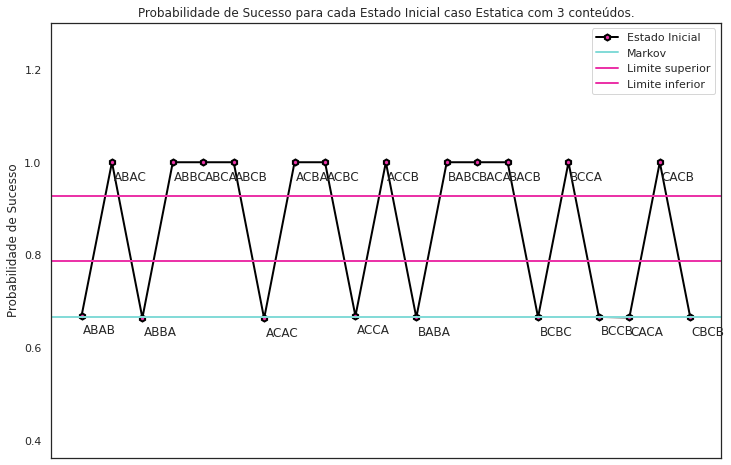

In [627]:
dataEstatica, estadosIniciais  = analiseEstadoInicial("Estatica", ["A","B","C"],3,2, [1/3,1/3,1/3], cenario = 1)
plotarAnaliseEstadoInicial(dataEstatica, "Estatica", 3, estatico1_3, 1, estadosIniciais)

### Casos com 4 Conteúdos

In [628]:
# declaração das probabilidades de sair cada tipo de requisção
prob = [["A", 1/4], ["B", 1/4], ["C", 1/4], ["D", 1/4]]

###Matrizes de transição representando apenas uma cache

#### FIFO

In [629]:
#Caso FIFO
estados = [["AB"], ["AC"], ["AD"], ["BA"], ["BC"], ["BD"], ["CA"], ["CB"], ["CD"], ["DA"], ["DB"], ["DC"]] 
markovCasoFIFO = np.array([[2/4, 0, 0, 0, 0, 0, 1/4, 0, 0, 1/4, 0, 0],
                           [0, 2/4, 0, 1/4, 0, 0, 0, 0, 0, 1/4, 0, 0],
                           [0, 0, 2/4, 1/4, 0, 0, 1/4, 0, 0, 0, 0, 0],
                           [0, 0, 0, 2/4, 0, 0, 0, 1/4, 0, 0, 1/4, 0],
                           [1/4, 0, 0, 0, 2/4, 0, 0, 0, 0, 0, 1/4, 0],
                           [1/4, 0, 0, 0, 0, 2/4, 0, 1/4, 0, 0, 0, 0],
                           [0, 0, 0, 0, 1/4, 0, 2/4, 0, 0, 0, 0, 1/4],
                           [0, 1/4, 0, 0, 2/4, 0, 0, 0, 1/4, 0, 0, 0],
                           [0, 1/4, 0, 0, 1/4, 0, 0, 0, 2/4, 0, 0, 0],
                           [0, 0, 0, 0, 0, 1/4, 0, 0, 1/4, 2/4, 0, 0],
                           [0, 0, 1/4, 0, 0, 0, 0, 0, 1/4, 0, 2/4, 0],
                           [0, 0, 1/4, 0, 0, 1/4, 0, 0, 0, 0, 0, 2/4]])

fifo1_4 = sucesso_unindo_matrizes(markovCasoFIFO)

A distribuição estacionária é dada por: [['AB', 0.10087719298245611], ['AC', 0.07456140350877184], ['AD', 0.0745614035087719], ['BA', 0.07456140350877193], ['BC', 0.1359649122807018], ['BD', 0.06578947368421058], ['CA', 0.08771929824561402], ['CB', 0.0350877192982456], ['CD', 0.11403508771929839], ['DA', 0.08771929824561393], ['DB', 0.10526315789473685], ['DC', 0.04385964912280704]]
0.5
A probabilidade de sucesso unindo as duas matrizes é de 0.5


#### LRU

In [630]:
#Caso LRU
estados = [["AB"], ["AC"], ["AD"] , ["BA"], ["BC"], ["BD"] , ["CA"], ["CB"], ["CD"], ["DA"], ["DB"], ["DC"]] 
markovCasoLRU  = np.array([[1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0],
                           [0, 1/4, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0],
                           [0, 0, 1/4, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0],
                           [1/4, 0, 0, 1/4, 0, 0, 0, 1/4, 0, 0, 1/4, 0],
                           [1/4, 0, 0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0],
                           [1/4, 0, 0, 0, 0, 1/4, 0, 1/4, 0, 0, 1/4, 0],
                           [0, 1/4, 0, 0, 1/4, 0, 1/4, 0, 0, 0, 0, 1/4],
                           [0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0, 0, 1/4],
                           [0, 1/4, 0, 0, 1/4, 0, 0, 0, 1/4, 0, 0, 1/4],
                           [0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 1/4, 0, 0],
                           [0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 1/4, 0],
                           [0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4]])

lru1_4  = sucesso_unindo_matrizes(markovCasoLRU)

A distribuição estacionária é dada por: [['AB', 0.08333333333333326], ['AC', 0.08333333333333333], ['AD', 0.08333333333333331], ['BA', 0.08333333333333333], ['BC', 0.08333333333333331], ['BD', 0.08333333333333331], ['CA', 0.08333333333333333], ['CB', 0.08333333333333331], ['CD', 0.08333333333333331], ['DA', 0.08333333333333333], ['DB', 0.08333333333333331], ['DC', 0.08333333333333331]]
0.49999999999999967
A probabilidade de sucesso unindo as duas matrizes é de 0.49999999999999967


#### Random

In [631]:
#Caso RANDOM
estados = [["AB"], ["AC"], ["AD"] , ["BC"], ["BD"], ["CD"]]
markovCasoRandom = np.array([[2/4, 1/8, 1/8, 1/8, 1/8, 0],
                             [1/8, 2/4, 1/8, 1/8, 0, 1/8],
                             [1/8, 1/8, 2/4, 0, 1/8, 1/8],
                             [1/8, 1/8, 0, 2/4, 1/8, 1/8],
                             [1/8, 0, 1/8, 1/8, 2/4, 1/8],
                             [0, 1/8, 1/8, 1/8, 1/8, 2/4]])

random1_4 = sucesso_unindo_matrizes(markovCasoRandom)

A distribuição estacionária é dada por: [['AB', 0.16666666666666669], ['AC', 0.16666666666666655], ['AD', 0.16666666666666666], ['BC', 0.16666666666666666], ['BD', 0.16666666666666666], ['CD', 0.16666666666666669]]
0.5
A probabilidade de sucesso unindo as duas matrizes é de 0.5


#### Estática

In [632]:
#Caso Estático
estados = [["AB"], ["AC"], ["AD"], ["BC"], ["BD"], ["CD"]]
markovCasoEstatico  = np.array([[1, 0, 0, 0, 0, 0], 
                                [0, 1, 0, 0, 0, 0],
                                [0, 0, 1, 0, 0, 0],
                                [0, 0, 0, 1, 0, 0],
                                [0, 0, 0, 0, 1, 0],
                                [0, 0, 0, 0, 0, 1]])

estica1_4  = sucesso_uma_matriz(markovCasoEstatico)

A distribuição estacionária é dada por: [['AB', 1.0], ['AC', 0.0], ['AD', 0.0], ['BC', 0.0], ['BD', 0.0], ['CD', 0.0]]
0.5


###Matrizes de transição representando duas caches

#### FIFO

In [633]:
# Caso FIFO
matrizFIFO_4, estados = GeraMatrizTransicao(["A","B","C","D"],"FIFO")
matrizFIFO_4 = np.array(matrizFIFO_4, dtype='float')

fifo1_4 = sucesso_uma_matriz(matrizFIFO_4)

A distribuição estacionária é dada por: [['ABAB', 0.0833333333333334], ['ABAC', -3.103731976261765e-17], ['ABAD', 3.9076586603155214e-19], ['ABBA', -1.583954198241908e-17], ['ABBC', -1.229745720382705e-17], ['ABBD', 2.1589536086789073e-33], ['ABCA', -1.3663841337585618e-18], ['ABCB', 0.0], ['ABCD', 0.0], ['ABDA', 1.2596093359025874e-33], ['ABDB', 0.0], ['ABDC', 0.0], ['ACAC', 0.08333333333333333], ['ACAD', -4.137788994124517e-18], ['ACBA', -1.114682010865406e-35], ['ACBC', 0.0], ['ACBD', 0.0], ['ACCA', -2.2789366681675217e-17], ['ACCB', -4.372561049417602e-36], ['ACCD', 2.0650027547761653e-51], ['ACDA', 4.966306623310955e-53], ['ACDB', 0.0], ['ACDC', 0.0], ['ADAD', 0.08333333333333334], ['ADBA', -3.4463955693793494e-55], ['ADBC', 0.0], ['ADBD', 0.0], ['ADCA', 6.368282364733507e-69], ['ADCB', 0.0], ['ADCD', 0.0], ['ADDA', -1.712464062744473e-17], ['ADDB', -1.049120044851719e-55], ['ADDC', 1.8656821198015816e-69], ['BABA', 0.08333333333333334], ['BABC', -7.59260500522694e-18], ['BABD', -

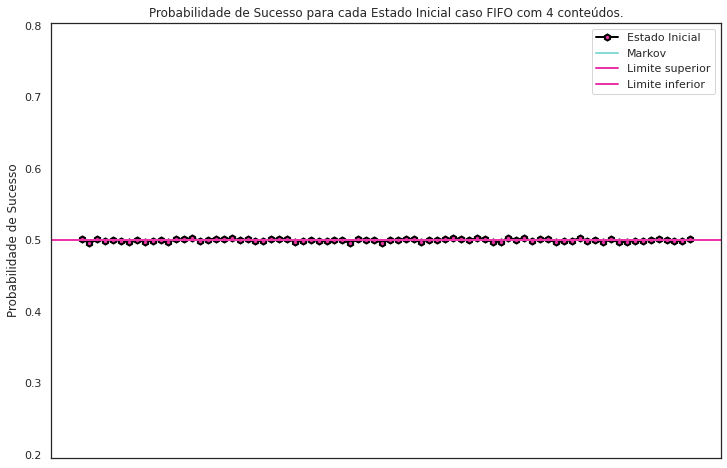

In [634]:
dataFIFO, estadosIniciais  = analiseEstadoInicial("FIFO", ["A","B","C","D"],4,2, [1/4,1/4,1/4,1/4], cenario = 1)
plotarAnaliseEstadoInicial(dataFIFO, "FIFO", 4, fifo1_4, 1, estadosIniciais)

#### LRU

In [635]:
# Caso LRU
matrizLRU_4, estados = GeraMatrizTransicao(["A","B","C","D"],"LRU")
matrizLRU_4 = np.array(matrizLRU_4, dtype='float')

lru1_4 = sucesso_uma_matriz(matrizLRU_4)

A distribuição estacionária é dada por: [['ABAB', 0.08333333333333336], ['ABAC', 0.0], ['ABAD', 0.0], ['ABBA', 0.0], ['ABBC', 0.0], ['ABBD', 0.0], ['ABCA', 0.0], ['ABCB', 0.0], ['ABCD', 0.0], ['ABDA', 0.0], ['ABDB', 0.0], ['ABDC', 0.0], ['ACAC', 0.08333333333333336], ['ACAD', 0.0], ['ACBA', 0.0], ['ACBC', 0.0], ['ACBD', 0.0], ['ACCA', 0.0], ['ACCB', 0.0], ['ACCD', 0.0], ['ACDA', 0.0], ['ACDB', 0.0], ['ACDC', 0.0], ['ADAD', 0.08333333333333333], ['ADBA', 0.0], ['ADBC', 0.0], ['ADBD', 0.0], ['ADCA', 0.0], ['ADCB', 0.0], ['ADCD', 0.0], ['ADDA', 0.0], ['ADDB', 0.0], ['ADDC', 0.0], ['BABA', 0.08333333333333336], ['BABC', 0.0], ['BABD', 0.0], ['BACA', 0.0], ['BACB', 0.0], ['BACD', 0.0], ['BADA', 0.0], ['BADB', 0.0], ['BADC', 0.0], ['BCBC', 0.08333333333333333], ['BCBD', 0.0], ['BCCA', 0.0], ['BCCB', 0.0], ['BCCD', 0.0], ['BCDA', 0.0], ['BCDB', 0.0], ['BCDC', 0.0], ['BDBD', 0.08333333333333333], ['BDCA', 0.0], ['BDCB', 0.0], ['BDCD', 0.0], ['BDDA', 0.0], ['BDDB', 0.0], ['BDDC', 0.0], ['CACA',

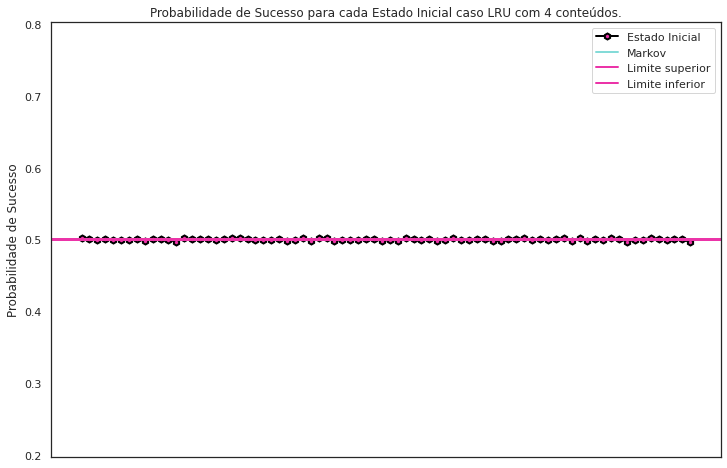

In [636]:
dataLRU, estadosIniciais  = analiseEstadoInicial("LRU", ["A","B","C","D"],4,2, [1/4,1/4,1/4,1/4], cenario = 1)
plotarAnaliseEstadoInicial(dataLRU, "LRU", 4, lru1_4, 1, estadosIniciais)

#### Estática

In [637]:
# Caso Estático
matrizEstatico_4, estados = GeraMatrizTransicao(["A","B","C","D"],"Estatico")
matrizEstatico_4 = np.array(matrizEstatico_4, dtype='float')

estatico1_4 = sucesso_uma_matriz(matrizEstatico_4)

A distribuição estacionária é dada por: [['ABAB', 1.0], ['ABAC', 0.0], ['ABAD', 0.0], ['ABBA', 0.0], ['ABBC', 0.0], ['ABBD', 0.0], ['ABCA', 0.0], ['ABCB', 0.0], ['ABCD', 0.0], ['ABDA', 0.0], ['ABDB', 0.0], ['ABDC', 0.0], ['ACAC', 0.0], ['ACAD', 0.0], ['ACBA', 0.0], ['ACBC', 0.0], ['ACBD', 0.0], ['ACCA', 0.0], ['ACCB', 0.0], ['ACCD', 0.0], ['ACDA', 0.0], ['ACDB', 0.0], ['ACDC', 0.0], ['ADAD', 0.0], ['ADBA', 0.0], ['ADBC', 0.0], ['ADBD', 0.0], ['ADCA', 0.0], ['ADCB', 0.0], ['ADCD', 0.0], ['ADDA', 0.0], ['ADDB', 0.0], ['ADDC', 0.0], ['BABA', 0.0], ['BABC', 0.0], ['BABD', 0.0], ['BACA', 0.0], ['BACB', 0.0], ['BACD', 0.0], ['BADA', 0.0], ['BADB', 0.0], ['BADC', 0.0], ['BCBC', 0.0], ['BCBD', 0.0], ['BCCA', 0.0], ['BCCB', 0.0], ['BCCD', 0.0], ['BCDA', 0.0], ['BCDB', 0.0], ['BCDC', 0.0], ['BDBD', 0.0], ['BDCA', 0.0], ['BDCB', 0.0], ['BDCD', 0.0], ['BDDA', 0.0], ['BDDB', 0.0], ['BDDC', 0.0], ['CACA', 0.0], ['CACB', 0.0], ['CACD', 0.0], ['CADA', 0.0], ['CADB', 0.0], ['CADC', 0.0], ['CBCB', 0.0],

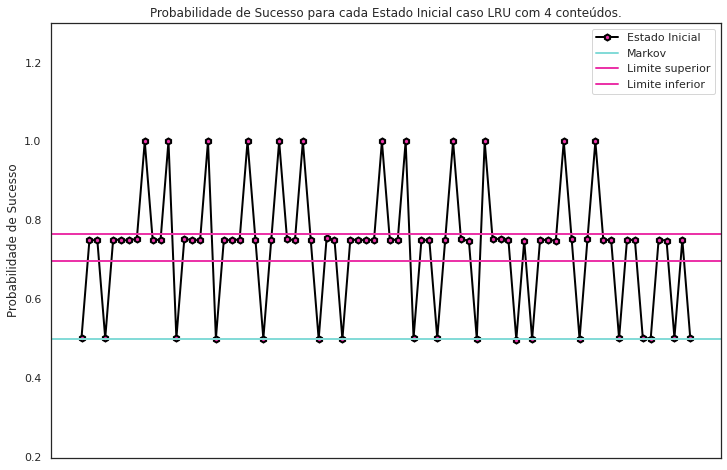

In [638]:
dataEstatica, estadosIniciais  = analiseEstadoInicial("Estatica", ["A","B","C","D"],4,2, [1/4,1/4,1/4,1/4], cenario = 1)
plotarAnaliseEstadoInicial(dataEstatica, "LRU", 4, estatico1_4, 1, estadosIniciais)

### espostas às perguntas

<h3> Qual tipo de cache é melhor?<br>

Sempre preferiremos caches cujos conteúdos sejam diferentes. Exemplo: o par de caches [A,B] e [A,C].<br>
Dessa forma, uma requisição de qualquer tipo (A, B ou C) sempre será atendida. Temos todas as possibilidades de conteúdos requisitados guardados nelas.
Percebemos que nos casos FIFO e LRU, ainda que elas comecem diferentes, a partir do momento que ficarem iguais, nunca mais ficarão diferentes. No caso estático, só teremos caches com conteúdos diferentes se elas começarem diferentes, já que nunca mudarão ao longo das requisições (há a chance de começarem diferentes pois a popularidade de conteúdo neste cenário é determinada pela distribuição da probabilidade, que neste caso é uniforme).<br>
Assim, concluímos que a Random é melhor para a nossa busca do sucesso. Em qualquer momento a cache pode ficar diferente, ainda que em algum momento elas fiquem iguais, pois o novo conteúdo entrará em uma posição aleatória de cada cache. Também preferiremos a FIFO em casos que elas nunca fiquem iguais. Há estados iniciais diferentes que nunca conseguem chegar em estados iguais (vemos isso pois a cadeia FIFO é redutível e tem 3 classes).
<br><br>
<h3> Irredutíveis ou redutíveis?

<h4> Caso N = 3.<br>
Nomearemos aqui os estados de 1 a 21 para facilitar a escrita e a explicação.<br>

<h5> As cadeias FIFO são todas redutíveis: <br>

* FIFO (uma cache): caminhos:
** 1->5->4->1;
** 2->3->6->2.

* Não há comunicação entre 1 e 2, por exemplo
<br>

* FIFO (duas caches): caminhos: 
** 1->19->16->1;
** 2->3->20->10->13->18->2;
** etc. 
* Não há comunicação entre 1 e 2, por exemplo
<br>

<h5>  As cadeias LRU: <br>

* LRU (uma cache) é irredutível: caminhos: 
** 1->3->6->2->5->4->1. 
* Completa! Dá para chegar em todos os estados começando de todos os estados.
<br>

* LRU (duas caches) é redutível: caminhos:
** 1->12->21->7->19->16->1;
** 2->12->1->19->7->19->16->21->12->1;
** etc. 
* Não é possível chegar no 2 pelo 1 (o oposto é possível).
<br>

<h5> As cadeias Random são todas irredutíveis:<br>

* Random (uma cache): caminho: 
** 1->2->3->1.
* Completa! Dá para chegar em todos os estados começando de todos os estados.
<br>

* Random (duas caches): caminho:
** 1->4->3->2->5->6->1.
* Completa! Dá para chegar em todos os estados começando de todos os estados.
<br>

<h5> Todas as cadeias Estáticas são redutíveis. Não há nenhuma comunicação entre os estados. Independente de qual se começar, não é possível mudar de estado.<br>
<br>
<h3> O desempenho depende do estado inicial?<br>

Sim, depende. Conforme discutimos na primeira pergunta, se as caches começarem iguais, só haverá casos de caches com conteúdos diferentes, sendo 100% de chance de sucesso, no caso das caches Random.<br>
Se elas começarem diferentes, antes da convergência da FIFO e LRU, também haverá essa chance de 100% de ter qualquer conteúdo requisitado salvo na cache.<br>
E as Estáticas permanecerão diferentes até o fim, já que nunca mudam, configurando 100% de chance de ter qualquer conteúdo requisitado salvo na cache sempre.<br>
Uma explicação mais matemática seria que quando elevamos uma matriz de transição a um número muito grande, para representar a passagem de vários passos, atinge-se uma distribuição estacionária nessa matriz, onde todas as colunas são números iguais. Com ela, temos que a probabilidade de se terminar em um mesmo estado é a mesma. Ela também é a distribuição limitante.<br>
Mas há exceções. Em casos que, elevada a um número muito alto, a matriz não fica com as colunas iguais. Isso quer dizer que há mais de uma distribuição estacionária, e que a probabilidade de se estar em algum estado necessariamente dependerá de qual é o estado inicial.
É o que acontece com as matrizes de transição FIFO e Estática.
<br><br>

<h3> Analisando no caso N = 4, nossas respostas mudam?<br>

Sim, algumas mudam.<br>

No caso de determinarmos qual tipo de cache ainda é melhor, a resposta permanece a mesma. No entanto, vale ressaltar que um par de cache do tipo [A,B] e [A,C] não representa 100% de chance ter qualquer conteúdo requisitado salvo na cache. Apenas um par que contivesse todos os conteúdos (A, B, C e D) representariam. Se aumentassemos o número de N para números maiores do que o espaço total para armazenar os conteúdos (levando em conta as duas caches, que nessa modelagem representa 4), nunca teríamos a possibilidade de ter todos conteúdos requisitados salvos em alguma posição do nosso par de caches.

<br>

Nossa resposta sobre cadeias irredutíveis também muda. Um exemplo disso é a matriz de transição do caso FIFO de uma cache só, que agora é irredutível.
Antes, a opção de ir para um estado além dele mesmo era para um único outro estado (2/3 e 1/3 de chance respectivamente). No caso de 4 conteúdos, teremos agora duas possíbilidades de transição além do estado atual (2/4, 1/4 e 1/4).<br>
Veja o caminho: 1->7->5->11->3->4->8->2->10->6->1->7->12->6->1. Completa! Dá para chegar em todos os estados começando de todos os estados.<br>
Conseguimos enxergar a relação entre um estado ter mais estados possíveis de transição e a cadeia se tornar irredutível ao conferir que voltar para o estado 1, e seguir para o estado 7, pudemos utilizar mais um caminho para chegar aos estados que ainda não haviam sido visitados, e chegar no começo de volta.

<br>

E, por fim, a nossa resposta sobre o desempenho não muda. Conforme alertamos nessa resposta no caso N = 3 e na resposta inicial do caso N = 4, preferiremos que elas fiquem diferentes em algum momento para que possamos abranger mais possibilidades de conteúdo salvos, e se, no caso da FIFO, LRU e Estáticas começarmos com estados iniciais de cada cache diferentes, teremos mais momentos onde elas permaneçam diferentes do que se começarmos com elas iguais.
<br><br>
Vale ressaltar que se o estado for [A,B] e [C,D], teremos sucesso em requisição de qualquer conteúdo, se for [A,B] e [C,D], teremos sucesso em 3 de 4, e se o estado for [A,B] e [A,B], apenas teremos sucesso em 2 de 4.


## Cenário 2



Temos as mesmas matrizes e os mesmos estados do cenário 1.

Aqui calcularemos a probabilidade de user miss utilizando cadeias de Markov para comprovar analíticamente o que fizemos na simulação.

### Funções

As funções GeraMatrizTransicao(), dist_estacionária(P), forma_tupla(P) e sucesso_uma_matriz(P) se mantêm inalteradas.

In [639]:
# Função para calcular o user miss
# Como precisamos que (falhe * falhe + falhe *  (não falhe * não tenha) + (não falhe * não tenha) * (não falhe * não tenha)),
# podemos também calcular 1 - ((não falhe * tenha) * (não falhe * tenha) + (não falhe * tenha) * (não falhe * não tenha) + falhe * (não falhe * tenha))
# 1 - os dois canais funcionarem e os dois terem, os dois canais funcionarem mas só um ter e um canal falhar e o outro ter
def user_miss(P, p):
  miss = 0
  sucesso_uma = sucesso_uma_matriz(P)
  nao_tem_uma = 1 - sucesso_uma

  sucesso = p * sucesso_uma * p * sucesso_uma + p * sucesso_uma * p * nao_tem_uma + (1-p) * p * sucesso_uma
  miss = 1 - sucesso
  print("A probabilidade de User Miss é de " + str(miss))
  return miss

In [640]:
def user_miss_duas(P, conteudos, probabilidades, estadosLista, p, linhaMatriz, depurar = False):
  
  estados = []
  linha = P[linhaMatriz]
  
  for estado in estadosLista:
    estados.append(estado[0]) 

  distEstacionaria = []
 
  for i in range (len(estados)):
    distEstacionaria.append([estados[i],linha[i]])
  
  miss = 0  

  if (depurar): print(distEstacionaria)
  i = 0

  for i in range(len(distEstacionaria)):
    
    estado = distEstacionaria[i][0]
    if (depurar): print("estado " + str(estado))
    dist = distEstacionaria[i][1]
    cache1 = estado[0:2] 
    cache2 = estado[2:4]
    if (depurar): print("cache1 " + str(cache1))
    if (depurar): print("cache2 " + str(cache2))

    for j in range(len(probabilidades)):

      conteudo = conteudos[j]
      probConteudo = probabilidades[j]
      
      if (depurar): print("conteudo " + str(conteudo))
      if (depurar): print("probConteudo " + str(probConteudo))
      
      if (conteudo in cache1 and conteudo in cache2):
        miss = miss + dist*probConteudo*(1 - p)*(1 - p)
        
      elif (conteudo not in cache1 and conteudo not in cache2):
        miss = miss + dist*probConteudo

      elif ((conteudo in cache1 and conteudo not in cache2) or (conteudo not in cache1 and conteudo in cache2)):
        miss = miss + dist*probConteudo*((1 - p)*(1 - p)+p*(1-p))
        
  print("A probabilidade de User Miss é de " + str(miss))
  return miss  

In [641]:
# Função que gera a mtriz de transição para os casos FIFO, LRU e Estática
def GeraMatrizC2Transicao(conteudos, tipo, depurar = False):

  estadosCache = list(permutations(conteudos, 2))
  estadosCache
  estadosCacheS = list(combinations_with_replacement(estadosCache, 2))
  numconteudos = (len(conteudos))
  combinacoesCanais = [[1,0],[0,1],[1,1],[0,0]]

  pares = []

  for i in range (len(estadosCacheS)):
    estado = [''.join(ele) for ele in estadosCacheS[i]]
    indice = estado[0] + estado[1]
    pares.append(indice)  

  matriz = {}
  numColunas = len(pares)
  linha = np.zeros((1, numColunas), dtype=int)
  linha = list(linha[0])
  matrizArray = []

  for i in range(len(pares)):

    cache1 = []
    cache2 = []

    indice = pares[i]

    cache1.append(indice[0])
    cache1.append(indice[1])
    cache2.append(indice[2])
    cache2.append(indice[3])

    matriz[indice] = linha.copy()


    for conteudo in conteudos:

      for canais in combinacoesCanais:
        c1 = canais[0]
        c2 = canais[1]

        if (c1):
          c1_transicaopraEstado, tinhaConteudo = cacheReceivesReq(tipo, cache1,conteudo, depurar = False)
          p1 = 0.9
        else:
          p1 = 0.1
          c1_transicaopraEstado = cache1

        if (c2):
          c2_transicaopraEstado, tinhaConteudo = cacheReceivesReq(tipo, cache2,conteudo, depurar = False)
          p2 = 0.9
        else:
          p2 = 0.1
          c2_transicaopraEstado = cache2

        novoEstadoOp1 = c1_transicaopraEstado[0] + c1_transicaopraEstado[1] + c2_transicaopraEstado[0] + c2_transicaopraEstado[1]
        novoEstadoOp2 = c2_transicaopraEstado[0] + c2_transicaopraEstado[1] + c1_transicaopraEstado[0] + c1_transicaopraEstado[1]   

        try:        
          index = pares.index(novoEstadoOp1)

        except:
          index = pares.index(novoEstadoOp2)    

        matriz[indice][index] = matriz[indice][index] +  (Fraction(1,numconteudos)*p1*p2)

    matrizArray.append(matriz[indice])

  matrizTransicao = Matrix(matrizArray)
  estados = [[el] for el in pares]
  if (depurar): 
    print("A matriz de transição do caso " + str(tipo) + " é:")
    print(matrizTransicao)
    print("E seus estados são:")
    print(estados)
    print()
  return matrizTransicao, estados


###Casos com 3 Conteúdos

In [642]:
# declaração das probabilidades de sair cada tipo de requisção
prob = [["A", 1/3], ["B", 1/3], ["C", 1/3]]
p = 0.9

### Matrizes de transição representando duas caches

#### FIFO

In [643]:
# Caso FIFO
matriC2FIFO, estadosFIFO = GeraMatrizC2Transicao(["A","B","C"], "FIFO", depurar = False)
matriC2FIFO = np.array(matriC2FIFO)
matriC2FIFOPower = matrix_power(matriC2FIFO, 100)
fifo2_3 = user_miss_duas(matriC2FIFOPower, ["A","B","C"],[1/3,1/3,1/3],estadosFIFO, linhaMatriz=1, p = 0.9 )

MatrizcomoArquivoExcel(matriC2FIFO, "FIFO", 3, estadosFIFO, cenario = "2")
MatrizElevadacomoArquivoExcel(matriC2FIFO, "FIFO", 3, estadosFIFO, cenario = "2")

A probabilidade de User Miss é de 0.233636363636366


In [645]:
fifo2_3 = user_miss_duas(matriC2FIFOPower, ["A","B","C"],[1/3,1/3,1/3],estadosFIFO, linhaMatriz=0, p = 0.9 )

A probabilidade de User Miss é de 0.295000000000002


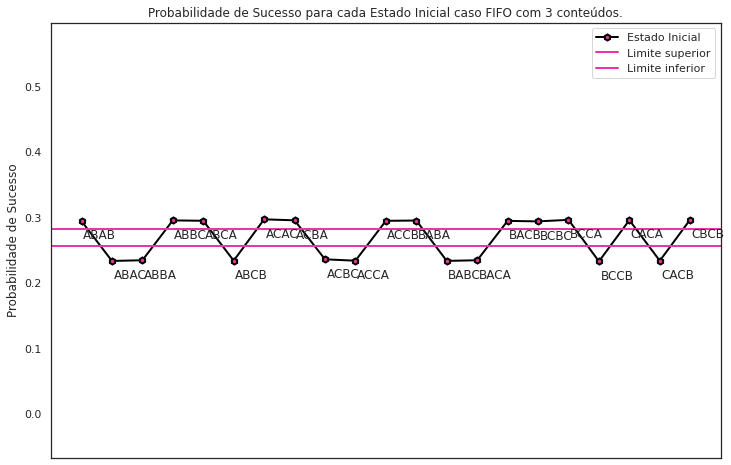

In [646]:
dataFIFO2_3, estadosIniciais  = analiseEstadoInicial("FIFO", ["A","B","C"],3,2, [1/3,1/3,1/3], cenario = 2)
plotarAnaliseEstadoInicial(dataFIFO2_3, "FIFO", 3, fifo2_3, 2, estadosIniciais)

#### LRU

In [647]:
# Caso LRU
matriC2LRU, estadosLRU = GeraMatrizC2Transicao(["A","B","C"], "LRU", depurar = False)
matriC2LRU = np.array(matriC2LRU)
matriC2LRUPower = matrix_power(matriC2LRU, 100)
lru2_3 = user_miss_duas(matriC2LRUPower, ["A","B","C"],[1/3,1/3,1/3],estadosLRU, linhaMatriz=1, p = 0.9 )

MatrizcomoArquivoExcel(matriC2LRU, "LRU", 3, estadosLRU, cenario = "2")
MatrizElevadacomoArquivoExcel(matriC2LRU, "LRU", 3, estadosLRU, cenario = "2")

A probabilidade de User Miss é de 0.300592008797657


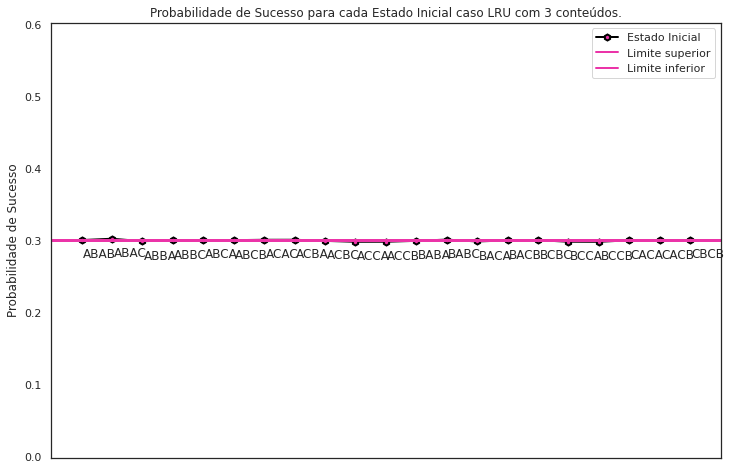

In [667]:
dataLRU2_3, estadosIniciais  = analiseEstadoInicial("LRU", ["A","B","C"],3,2, [1/3,1/3,1/3], cenario = 2)
plotarAnaliseEstadoInicial(dataLRU2_3, "LRU", 3, lru2_3, 2, estadosIniciais)

#### Random

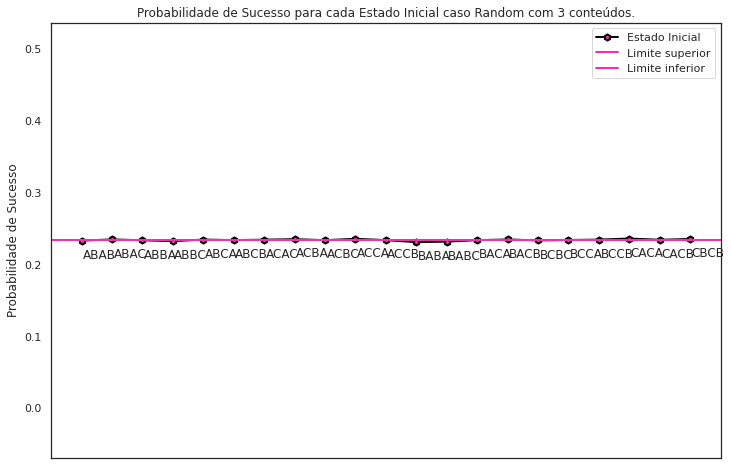

In [650]:
dataRandom2_3, estadosIniciais  = analiseEstadoInicial("Random", ["A","B","C"],3,2, [1/3,1/3,1/3], cenario = 2)
plotarAnaliseEstadoInicial(dataRandom2_3, "Random", 3, lru2_3, 2, estadosIniciais)

#### Estática

In [651]:
# Caso Estatica
matriC2Estatica, estadosEstatica = GeraMatrizC2Transicao(["A","B","C"], "Estatica", depurar = False)
matriC2Estatica = np.array(matriC2Estatica)
matriC2EstaticaPower = matrix_power(matriC2Estatica, 100)
estatica2_3_diferentes = user_miss_duas(matriC2EstaticaPower, ["A","B","C"],[1/3,1/3,1/3],estadosEstatica, linhaMatriz=1, p = 0.9 )

MatrizcomoArquivoExcel(matriC2Estatica, "Estatica", 3, estadosEstatica, cenario = "2")
MatrizElevadacomoArquivoExcel(matriC2Estatica, "Estatica", 3, estadosEstatica, cenario = "2")

A probabilidade de User Miss é de 0.0700000000000015


In [652]:
estatica2_3_iguais = user_miss_duas(matriC2EstaticaPower, ["A","B","C"],[1/3,1/3,1/3], estadosEstatica, linhaMatriz=0, p = 0.9 )

A probabilidade de User Miss é de 0.340000000000008


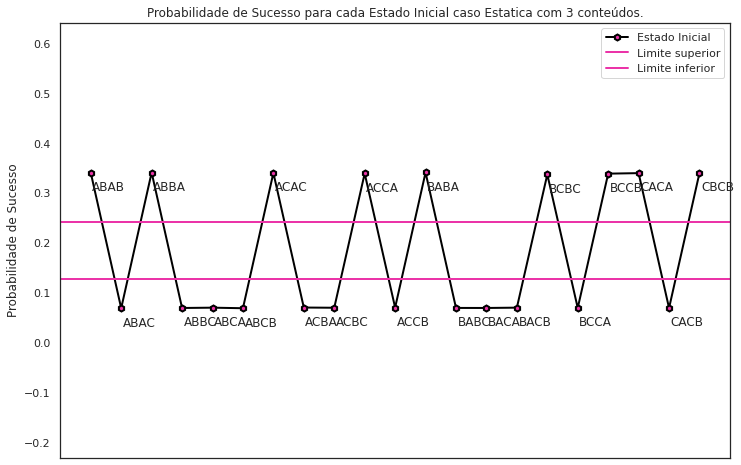

In [653]:
dataEstatica2_3, estadosIniciais  = analiseEstadoInicial("Estatica", ["A","B","C"],3,2, [1/3,1/3,1/3], cenario = 2)
plotarAnaliseEstadoInicial(dataEstatica2_3, "Estatica", 3, lru2_3, 2, estadosIniciais)

###Casos com 4 Conteúdos

In [654]:
# declaração das probabilidades de sair cada tipo de requisção
prob = [["A", 1/4], ["B", 1/4], ["C", 1/4], ["D", 1/4]]
p = 0.9

#### FIFO

In [655]:
# Caso FIFO
matriC2FIFO, estadosFIFO = GeraMatrizC2Transicao(["A","B","C","D"], "FIFO", depurar = False)
matriC2FIFOPower = matrix_power(matriC2FIFO, 100)
fifo2_4 = user_miss_duas(matriC2FIFOPower, ["A","B","C","D"],[1/4,1/4,1/4,1/4],estadosFIFO, linhaMatriz=1, p = 0.9 )


A probabilidade de User Miss é de 0.447684031183804


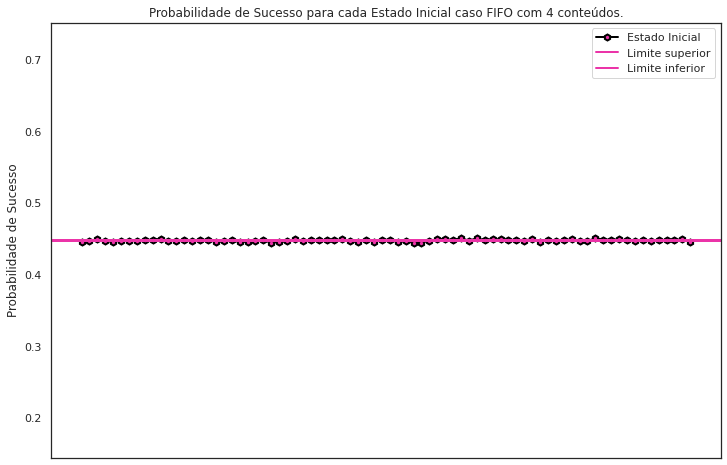

In [656]:
dataFIFO2_4, estadosIniciais  = analiseEstadoInicial("FIFO", ["A","B","C","D"],4,2, [1/4,1/4,1/4,1/4], cenario = 2)
plotarAnaliseEstadoInicial(dataFIFO2_4, "FIFO", 4, fifo2_4, 2, estadosIniciais)

#### LRU

In [657]:
# Caso LRU
matriC2LRU, estadosLRU = GeraMatrizC2Transicao(["A","B","C","D"], "LRU", depurar = False)
matriC2LRUPower = matrix_power(matriC2LRU, 100)
lru2_4 = user_miss_duas(matriC2LRUPower, ["A","B","C","D"],[1/4,1/4,1/4,1/4],estadosLRU, linhaMatriz=1, p = 0.9 )

A probabilidade de User Miss é de 0.463655995167627


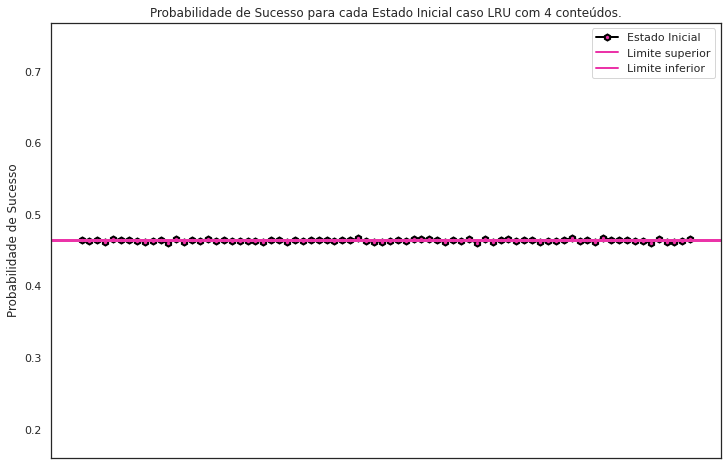

In [658]:
dataLRU2_4, estadosIniciais  = analiseEstadoInicial("LRU", ["A","B","C","D"],4,2, [1/4,1/4,1/4,1/4], cenario = 2)
plotarAnaliseEstadoInicial(dataLRU2_4, "LRU", 4, fifo2_4, 2, estadosIniciais)

#### Estática

In [662]:
# Caso Estatica
matriC2Estatica_4, estadosEstatica = GeraMatrizC2Transicao(["A","B","C","D"], "Estatica", depurar = False)
matriC2EstaticaPower_4 = matrix_power(matriC2Estatica_4, 100)
estatica2_3_diferentes = user_miss_duas(matriC2EstaticaPower_4, ["A","B","C","D"],[1/4,1/4,1/4,1/4],estadosEstatica, linhaMatriz=0, p = 0.9 )

A probabilidade de User Miss é de 0.504999999999989


In [663]:
estatica2_3_diferentes = user_miss_duas(matriC2EstaticaPower_4, ["A","B","C","D"],[1/4,1/4,1/4,1/4],estadosEstatica, linhaMatriz=1, p = 0.9 )

A probabilidade de User Miss é de 0.302499999999993


In [664]:
estatica2_3_diferentes = user_miss_duas(matriC2EstaticaPower_4, ["A","B","C","D"],[1/4,1/4,1/4,1/4],estadosEstatica, linhaMatriz=8, p = 0.9 )

A probabilidade de User Miss é de 0.0999999999999978


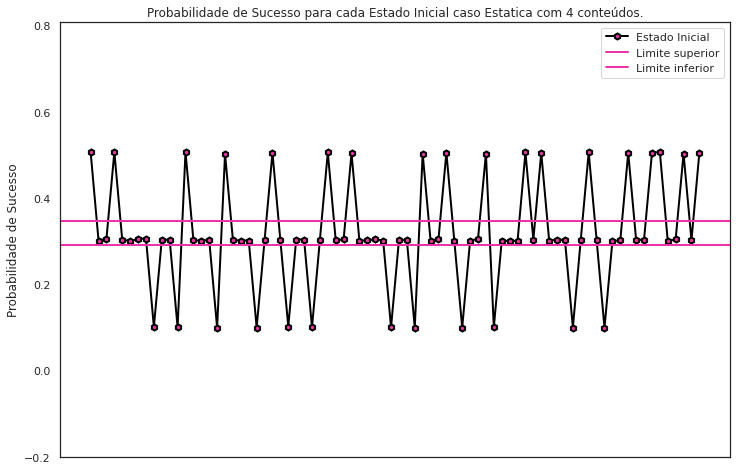

In [665]:
dataEstatica2_4, estadosIniciais  = analiseEstadoInicial("Estatica", ["A","B","C","D"],4,2, [1/4,1/4,1/4,1/4], cenario = 2)
plotarAnaliseEstadoInicial(dataEstatica2_4, "Estatica", 4, estatico2_4, 2, estadosIniciais)

#Gráficos

Compararemos os tipos de cache por simulação e por solução analítica, nos cenários 1 e 2, e os resultados das simulações de todos os cenários com o intervalo de confiança.

 ## Cenário 1: 3 Conteúdos

In [668]:
num_elem = 3
cenario = 1

In [669]:
estaticaDif_sim1_3

1.0

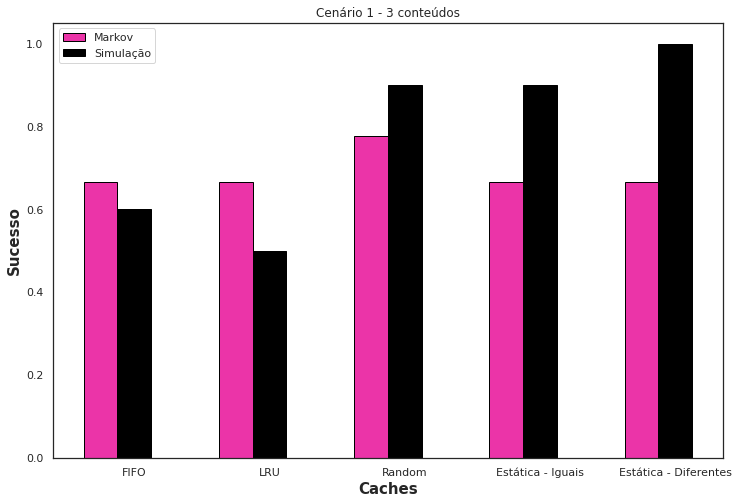

In [670]:
markov = [fifo1_3, lru1_3, random1_3, estatico1_3, estatico1_3]
simulacao = [fifo_sim1_3, lru_sim1_3, random_sim1_3, estaticaIgual_sim1_3, estaticaDif_sim1_3]

plotar_barras(markov, simulacao, '1 - 3', cenario)

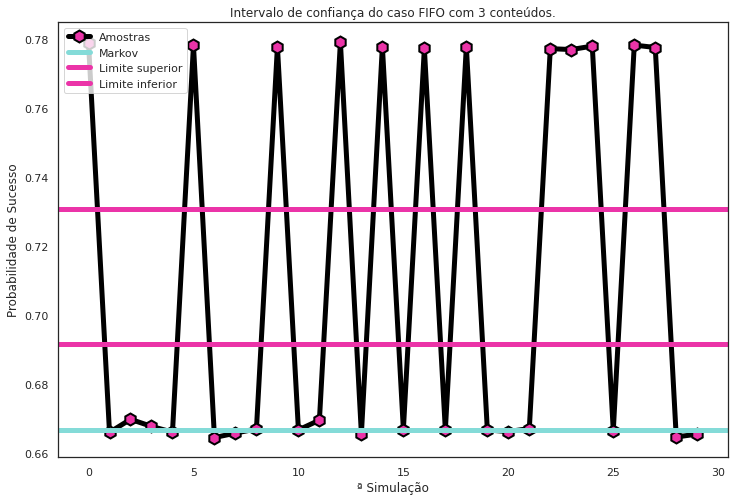

In [671]:
str_tipo = 'FIFO'
tipo = fifo1_3
lim, sucessos = intervaloConfiancaFIFO1_3

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

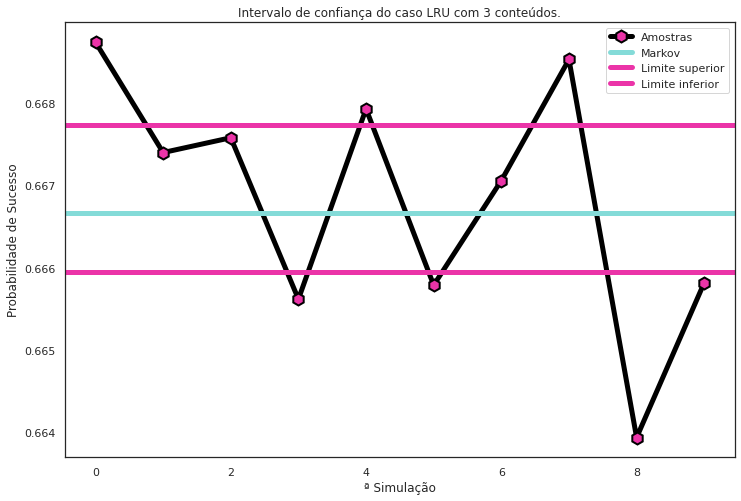

In [672]:
str_tipo = 'LRU'
tipo = lru1_3
lim, sucessos = intervaloConfiancaLRU1_3

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

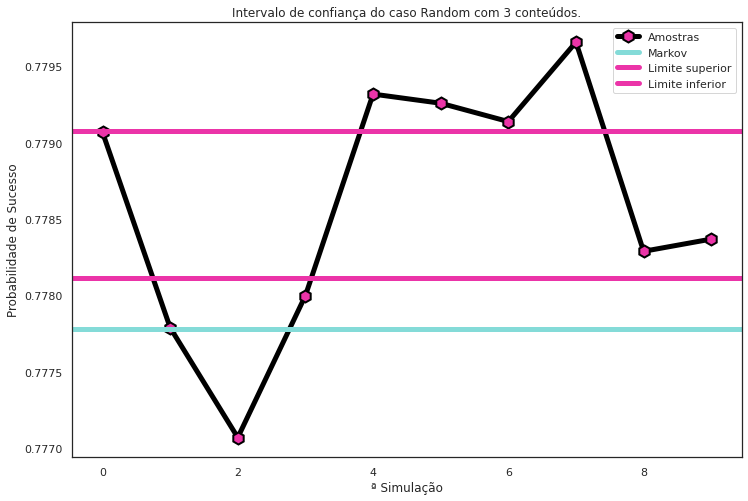

In [673]:
str_tipo = 'Random'
tipo = random1_3
lim, sucessos = intervaloConfiancaRandom1_3

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

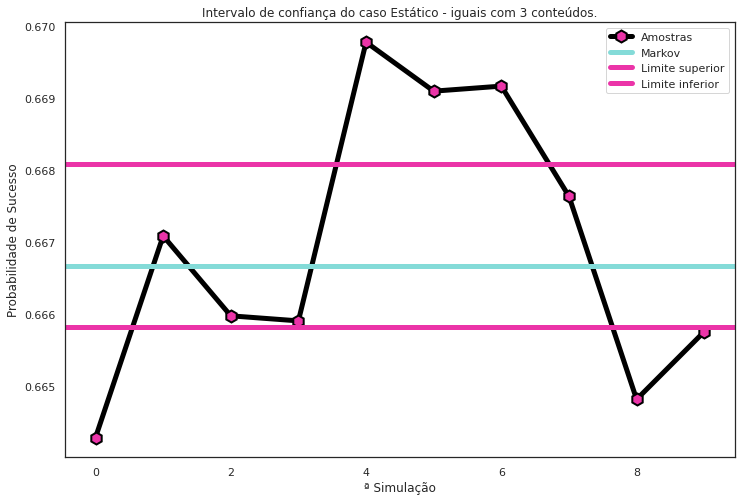

In [674]:
str_tipo = 'Estático - iguais'
tipo = estatico1_3
lim, sucessos = intervaloConfiancaEstaticaIgual1_3

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

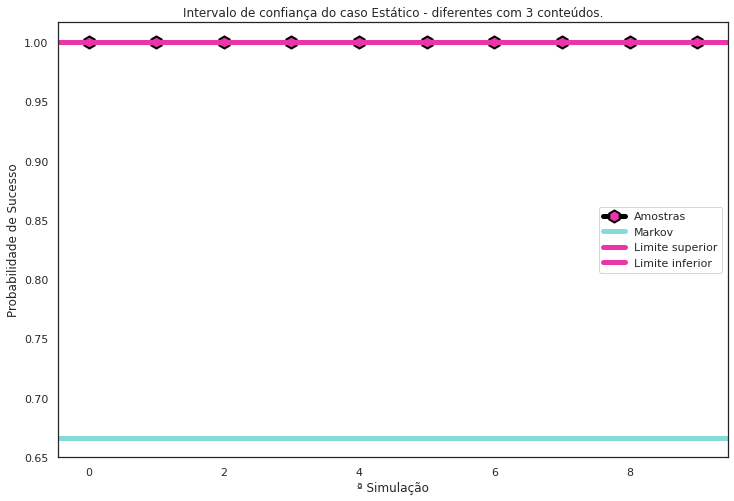

In [675]:
str_tipo = 'Estático - diferentes'
tipo = estatico1_3
lim, sucessos = intervaloConfiancaEstaticaDif1_3

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

 ## Cenário 1: 4 Conteúdos

In [676]:
var1, var2, fifo_sim1_4 = simulacaoCenario1(10,"FIFO", 4 , 2, [1/4,1/4,1/4,1/4])
var1, var2, lru_sim1_4 = simulacaoCenario1(10,"LRU", 4 , 2, [1/4,1/4,1/4,1/4])
var1, var2, random_sim1_4 = simulacaoCenario1(10,"Random", 4 , 2, [1/4,1/4,1/4,1/4])
var1, var2, estaticaIgual_sim1_4 = simulacaoCenario1(10,"Estatica", 4 , 2, [1/4,1/4,1/4,1/4], cachesDiferentes = False)
var1, var2, estaticaDif_sim1_4 = simulacaoCenario1(10,"Estatica", 4 , 2, [1/4,1/4,1/4,1/4], cachesDiferentes = True)

In [677]:
num_elem = 4
cenario = 1

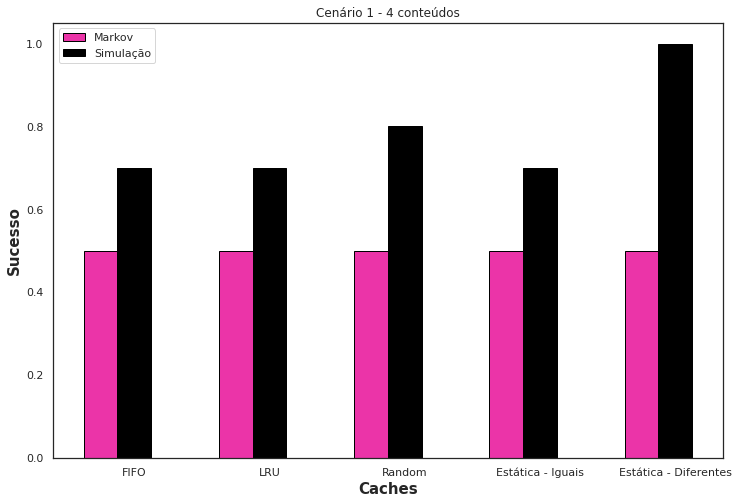

In [678]:
markov = [fifo1_4, lru1_4, random1_4, estatico1_4, estatico1_4]
simulacao = [fifo_sim1_4, lru_sim1_4, random_sim1_4, estaticaIgual_sim1_4, estaticaDif_sim1_4]

plotar_barras(markov, simulacao, '1 - 4', cenario)

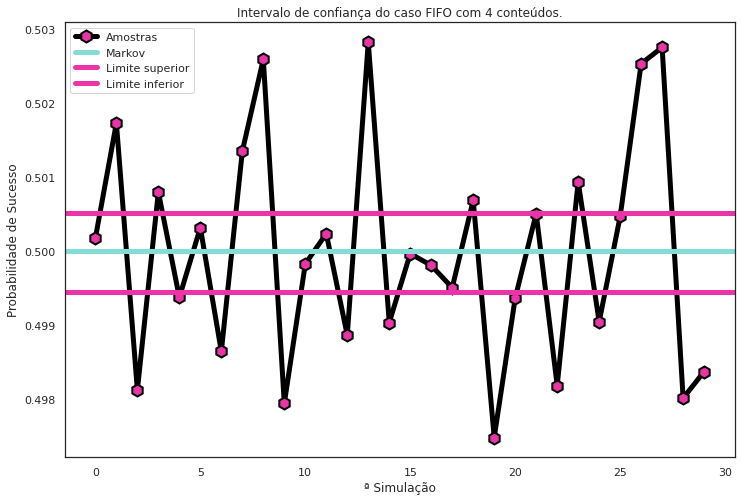

In [679]:
str_tipo = 'FIFO'
tipo = fifo1_4
lim, sucessos = intervaloConfiancaFIFO1_4

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

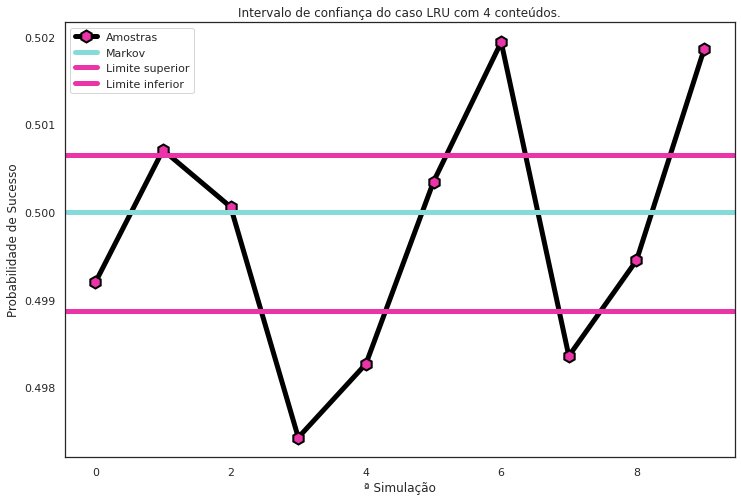

In [680]:
str_tipo = 'LRU'
tipo = lru1_4
lim, sucessos = intervaloConfiancaLRU1_4

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

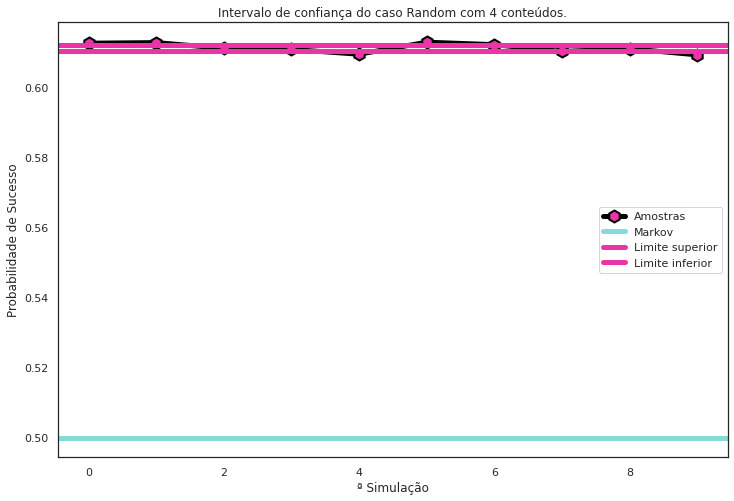

In [681]:
str_tipo = 'Random'
tipo = random1_4
lim, sucessos = intervaloConfiancaRandom1_4

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

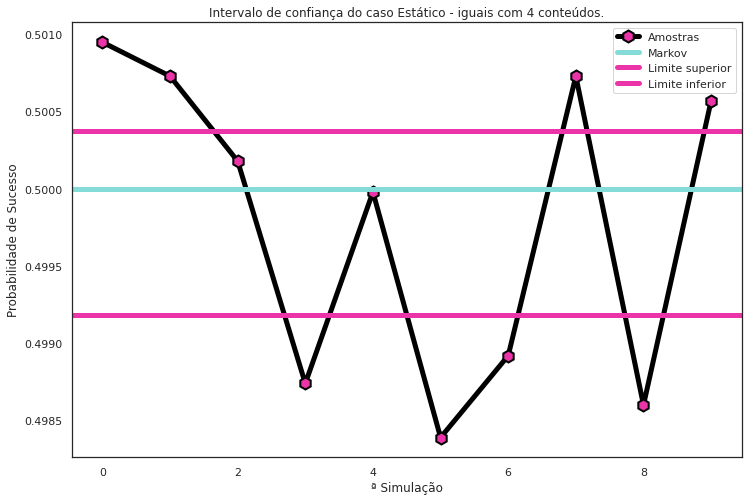

In [682]:
str_tipo = 'Estático - iguais'
tipo = estatico1_4
lim, sucessos = intervaloConfiancaEstaticaIgual1_4

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

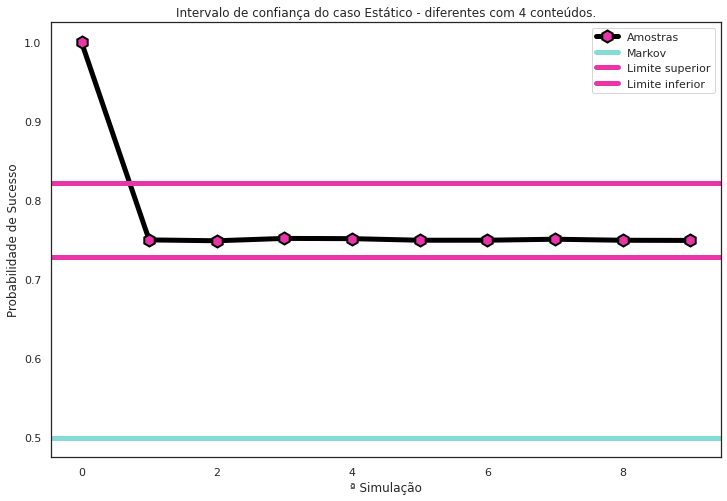

In [683]:
str_tipo = 'Estático - diferentes'
tipo = estatico1_4
lim, sucessos = intervaloConfiancaEstaticaDif1_4

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

 ## Cenário 2: 3 Conteúdos

In [684]:
num_elem = 3
cenario = 2

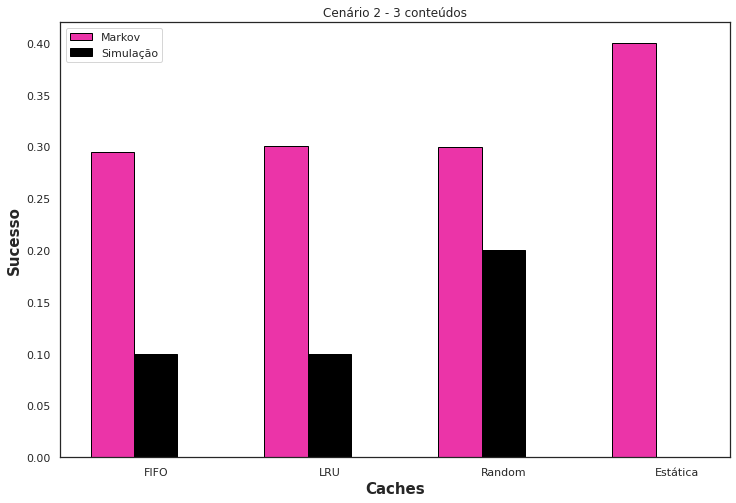

In [685]:
markov = [fifo2_3, lru2_3, random2_3, estatico2_3]
simulacao = [fifo_sim2_3, lru_sim2_3, random_sim2_3, estatica_sim2_3]

plotar_barras(markov, simulacao, '2 - 3', cenario)

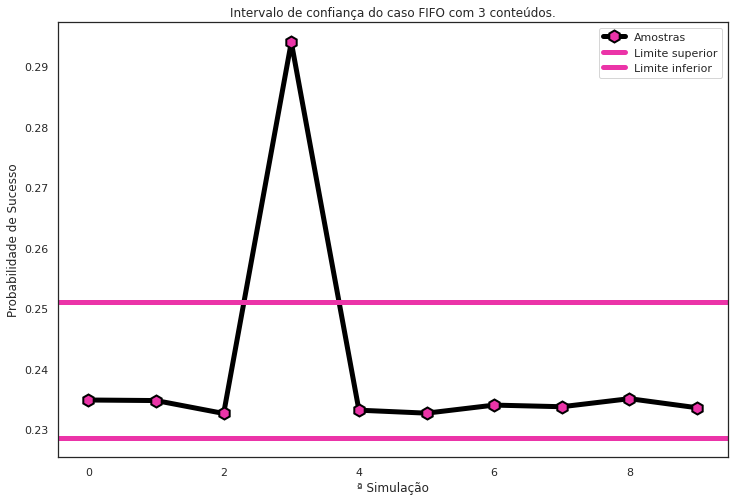

In [686]:
str_tipo = 'FIFO'
tipo = fifo2_3
lim, sucessos = intervaloConfiancaFIFO2_3

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

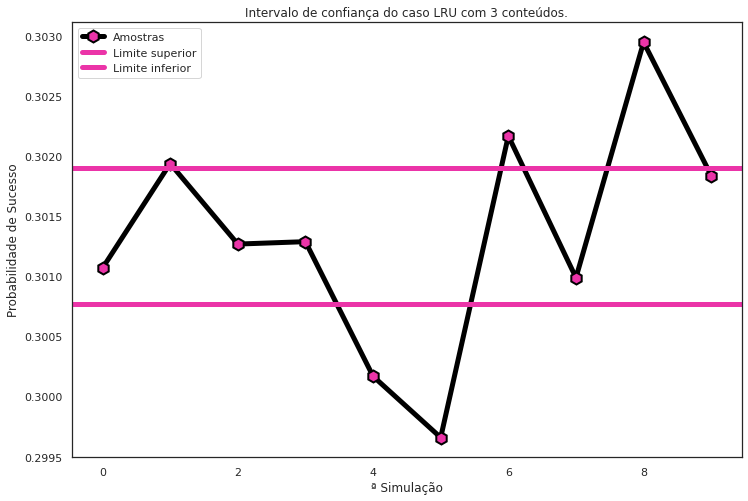

In [687]:
str_tipo = 'LRU'
tipo = lru2_3
lim, sucessos = intervaloConfiancaLRU2_3

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

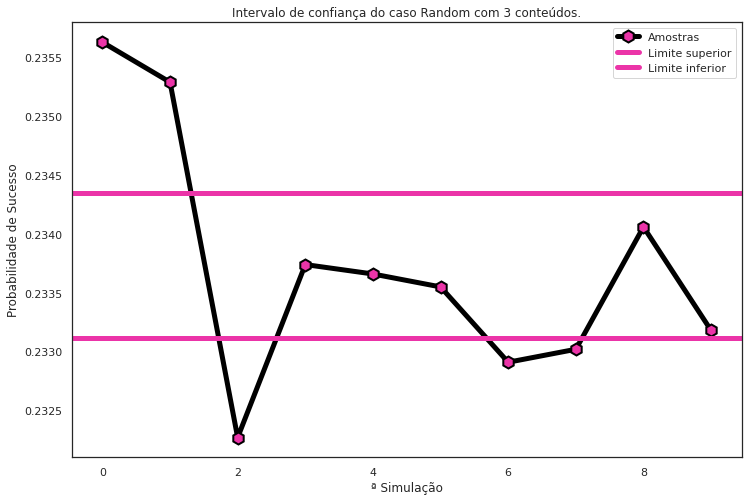

In [688]:
str_tipo = 'Random'
tipo = random2_3
lim, sucessos = intervaloConfiancaRandom2_3

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

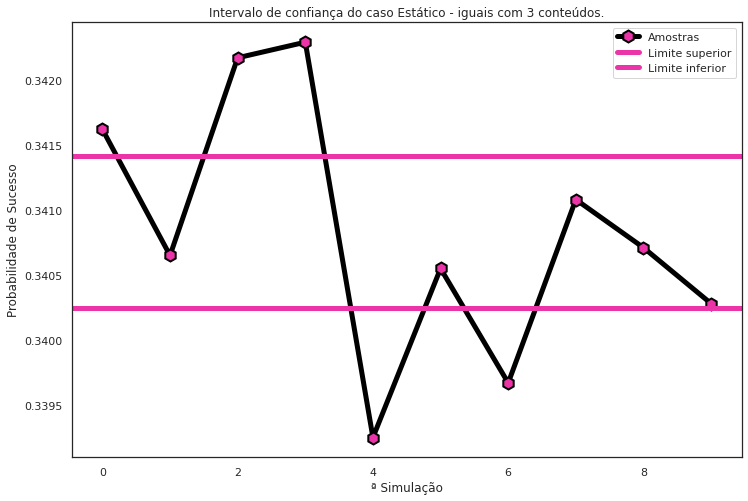

In [689]:
str_tipo = 'Estático - iguais'
tipo = estatico2_3
lim, sucessos = intervaloConfiancaEstaticaIgual2_3

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

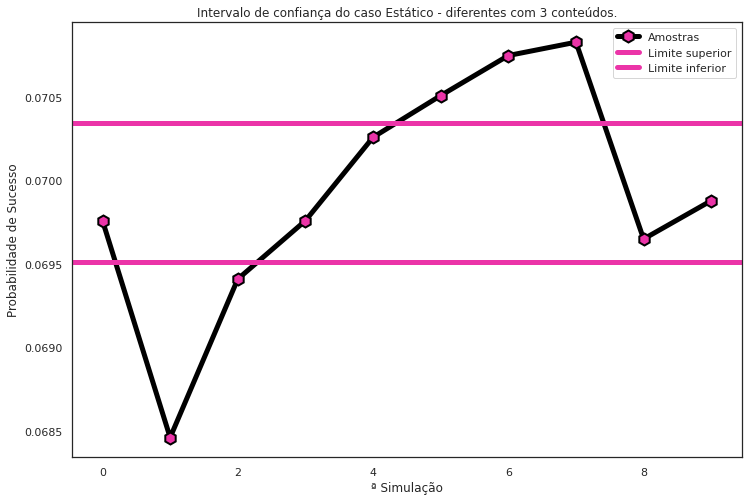

In [690]:
str_tipo = 'Estático - diferentes'
tipo = estatico2_3
lim, sucessos = intervaloConfiancaEstaticaDif2_3

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

 ## Cenário 2: 4 Conteúdos

In [691]:
var1, var2, fifo_sim2_4 = simulacaoCenario2(10,"FIFO", 4 , 2, [1/4,1/4,1/4,1/4])
var1, var2, lru_sim2_4 = simulacaoCenario2(10,"LRU", 4 , 2, [1/4,1/4,1/4,1/4])
var1, var2, random_sim2_4 = simulacaoCenario2(10,"Random", 4 , 2, [1/4,1/4,1/4,1/4])
var1, var2, estatica_sim2_4 = simulacaoCenario2(10,"Estatica", 4 , 2, [1/4,1/4,1/4,1/4],)

In [692]:
num_elem = 4
cenario = 2

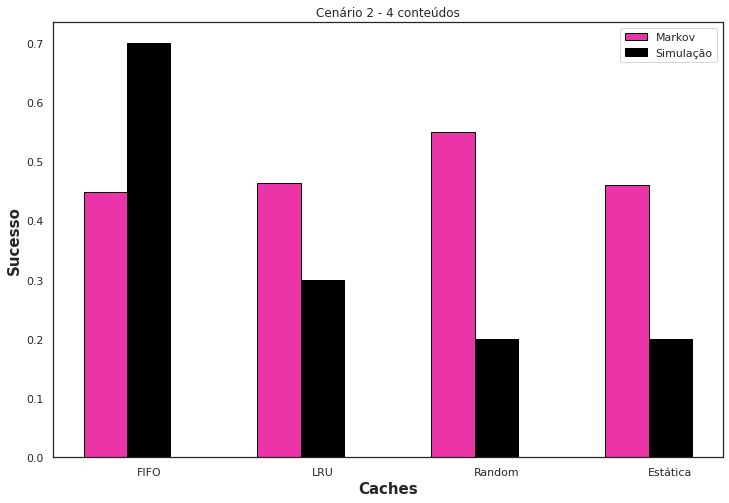

In [693]:
markov = [fifo2_4, lru2_4, random2_4, estatico2_4]
simulacao = [fifo_sim2_4, lru_sim2_4, random_sim2_4, estatica_sim2_4]

plotar_barras(markov, simulacao, '2 - 4', cenario)

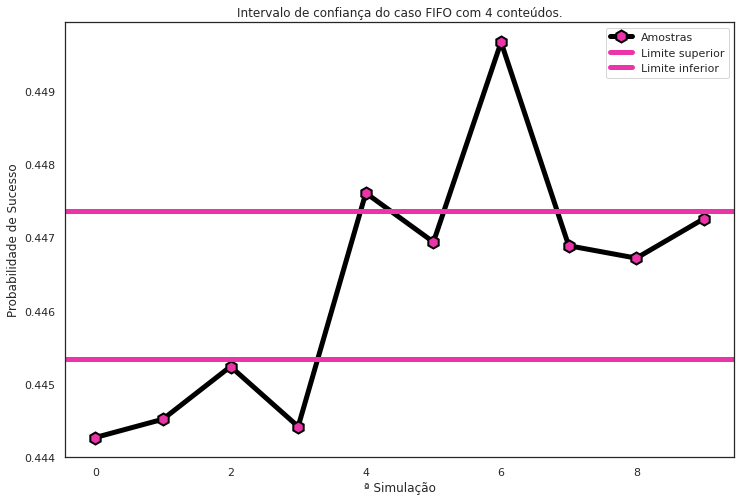

In [694]:
str_tipo = 'FIFO'
tipo = fifo2_4
lim, sucessos = intervaloConfiancaFIFO2_4

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

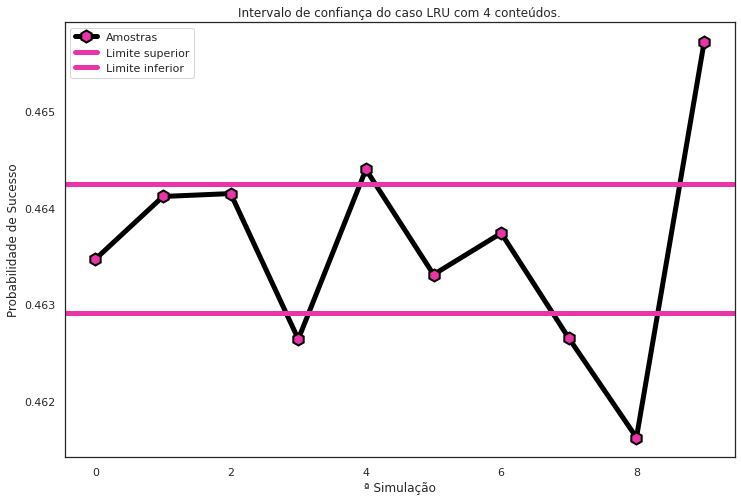

In [695]:
str_tipo = 'LRU'
tipo = lru2_4
lim, sucessos = intervaloConfiancaLRU2_4

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

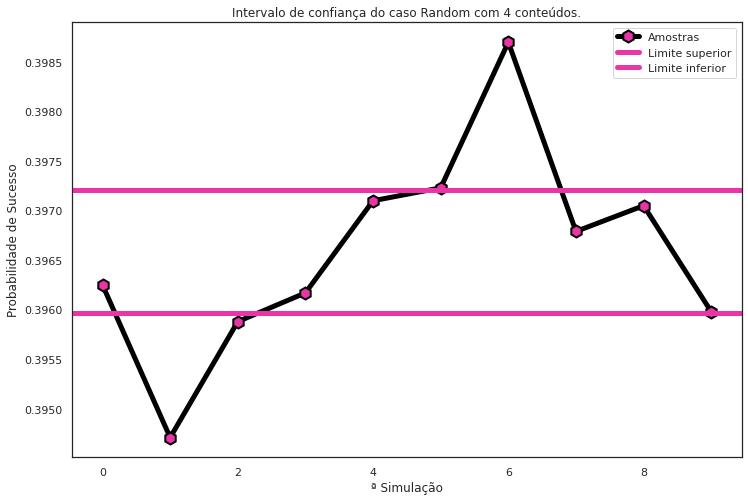

In [696]:
str_tipo = 'Random'
tipo = random2_4
lim, sucessos = intervaloConfiancaRandom2_4

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

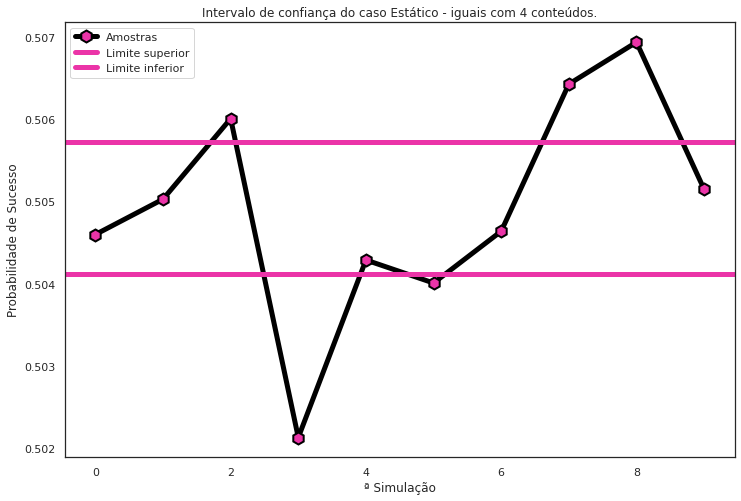

In [697]:
str_tipo = 'Estático - iguais'
tipo = estatico2_4
lim, sucessos = intervaloConfiancaEstaticaIgual2_4

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

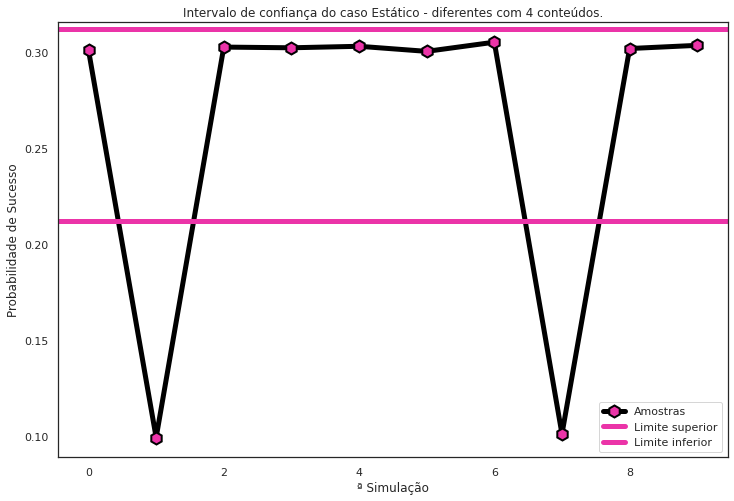

In [698]:
str_tipo = 'Estático - diferentes'
tipo = estatico2_4
lim, sucessos = intervaloConfiancaEstaticaDif2_4

plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

 ## Cenário 3:

In [699]:
cenario = 3

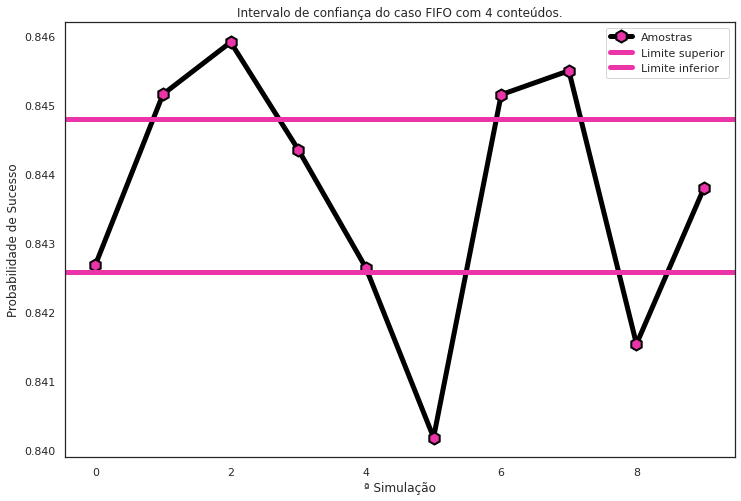

In [700]:
str_tipo = 'FIFO'
tipo = 0
lim, sucessos = intervaloConfiancaFIFOC3
plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

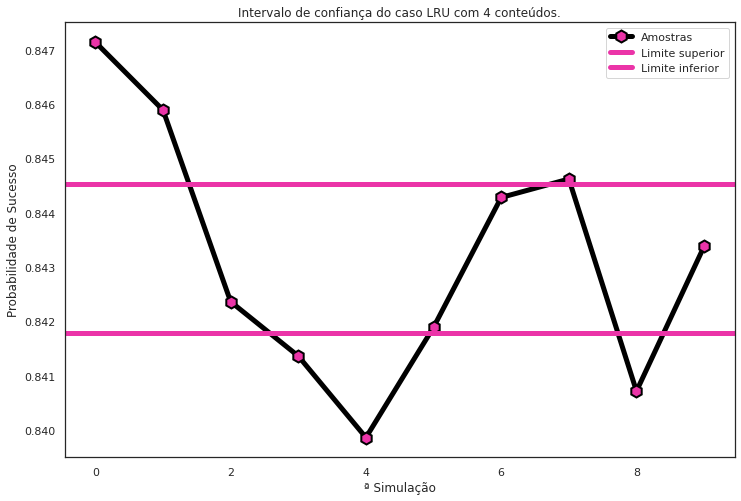

In [701]:
str_tipo = 'LRU'
tipo = 0
lim, sucessos = intervaloConfiancaLRUC3
plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

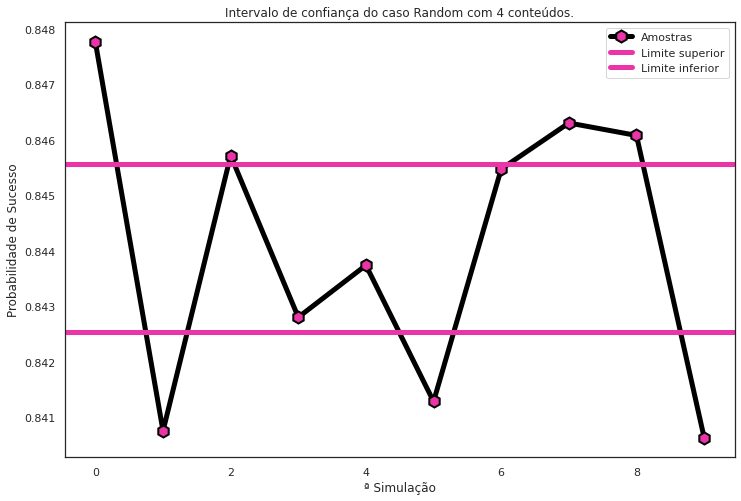

In [702]:
str_tipo = 'Random'
tipo = 0
lim, sucessos = intervaloConfiancaRandomC3
plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

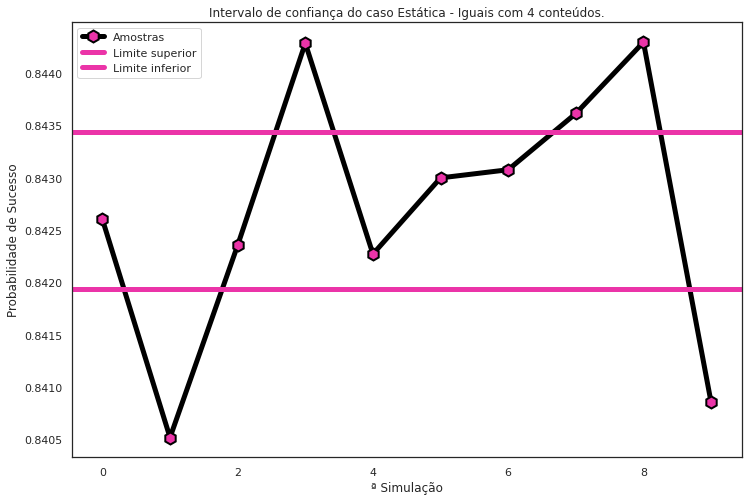

In [703]:
str_tipo = 'Estática - Iguais'
tipo = 0
lim, sucessos = intervaloConfiancaEstaticaIguaisC3
plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

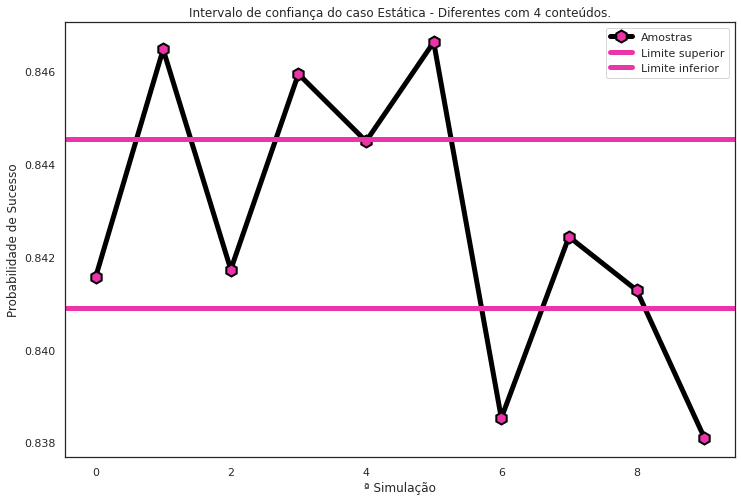

In [704]:
str_tipo = 'Estática - Diferentes'
tipo = 0
lim, sucessos = intervaloConfiancaEstaticaDifC3
plotar_intervalo(tipo, str_tipo, sucessos, lim, num_elem, cenario)

In [705]:
def analiseEstadoInicial(caso, conteudos, numConteudos,tamcache, probabilidades, cenario):
    
  linha = 0
  analise = pd.DataFrame(columns=['Estado_inicial_cache_1', 'Estado_inicial_cache_2', 'Sucessos',
                                      'Estado_final_cache_1','Estado_final_cache_2'])
  
  caches = list(permutations(conteudos, 2)) 
  estadosCache = list(permutations(conteudos, 2))
  estadosCacheS = list(combinations_with_replacement(estadosCache, 2))
  numconteudos = (len(conteudos))

  conteudos = list(range(1, numconteudos+1))
  caches = list(permutations(conteudos, 2)) 
  estadosCaches = list(combinations_with_replacement(caches, tamcache))

  for estados in estadosCaches:  
    cache1_inicial = list(estados[0])
    cache2_inicial = list(estados[1])
    if (cenario == 1):
      cache1, cache2, probSucessos = simulacaoCenario1(100000, caso, numconteudos ,tamcache, probabilidades, False, cache1_inicial = cache1_inicial, cache2_inicial = cache2_inicial)
    
    elif (cenario == 2):
      cache1, cache2, probSucessos = simulacaoCenario2(100000, caso, numconteudos, tamcache, probabilidades, p = 0.9, depurar = False, cache1_inicial = cache1_inicial, cache2_inicial = cache2_inicial)


    analise.loc[linha+1] = [cache1_inicial] + [cache2_inicial] + [str(probSucessos)] + [cache1] + [cache2]
    linha = linha + 1

  analise.to_excel("analise_Estado_Inicial_" + caso + ".xlsx")
  return analise, estadosCacheS